In [ ]:

# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Test_GroundTruth.zip
# !unzip ISIC2018_Task1-2_Test_Input.zip.1
# !unzip ISIC2018_Task1_Test_GroundTruth.zip

# !rm ISIC2018_Task1-2_Test_Input.zip.1
# !rm ISIC2018_Task1_Test_GroundTruth.zip


### imports

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

: 

In [4]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch_geometric==2.0.4
!pip install -q class_resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### data

In [5]:
# /content/drive/MyDrive/Gopal/CVC-ClinicDB
# folder1 = "/content/CVC-ClinicDB/Original"
# folder2 = "/content/CVC-ClinicDB/Ground Truth"

# folder1 = "/content/drive/MyDrive/Gopal/CVC-ClinicDB/Original"
# folder2 = "/content/drive/MyDrive/Gopal/CVC-ClinicDB/Ground Truth"

folder1 = "/content/drive/MyDrive/Saran/ISIC2018_Task1-2_Test_Input"
folder2 = "/content/drive/MyDrive/Saran/ISIC2018_Task1_Test_GroundTruth"

images = sorted(os.listdir(folder1))
masks = sorted(os.listdir(folder2))

images = [folder1 + '/' + x for x in images]
masks = [folder2 + '/' + x for x in masks]

images = images[1:-1]
masks = masks[1:-1]

In [6]:
len(masks), len(images)

(1000, 1000)

In [7]:
from PIL import Image
Image.open(masks[22]).size

(1024, 768)

In [8]:
from sklearn.metrics import jaccard_score

def iou(mask1, mask2):
    # mask1 = mask1.ravel()
    # mask2 = mask2.ravel()
    # iou = jaccard_score(mask1, mask2)
    # return iou

    x = mask1.ravel()
    y = mask2.ravel()
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = np.sum(intersection)/ np.sum(union)
    return similarity

In [9]:
import numpy as np

def cts(image, segmap,wnd = [20,20]):
    """
    Crop the image and segmentation map to the boundary of the segmentation.

    :param image: A numpy array representing the color image.
    :param segmap: A numpy array representing the binary segmentation map.
    :return: Cropped image and segmentation map.
    """
    [ht,wdt] = segmap.shape
    # Find the indices where segmap is 1
    rows, cols = np.where(segmap == 255)
    # Find min and max coordinates
    min_row, max_row = max(min(rows)-wnd[0],0), min(max(rows)+wnd[0],ht)
    min_col, max_col = max(min(cols)-wnd[1],0), min(max(cols)+wnd[1],wdt)

    # Crop the image and segmap
    cropped_image = image[min_row:max_row+1, min_col:max_col+1]
    cropped_segmap = segmap[min_row:max_row+1, min_col:max_col+1]

    return cropped_image, cropped_segmap

# main

In [14]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%aimport segment
%aimport util
%aimport gnn_pool
%aimport sim

In [16]:
epochs = [20, 100, 15]

# Number of clusters
K = 2

res = (224, 224)
cut = 0
mode = 0
bs = True #False
cc = False
stride = 4
facet = 'key'
layer = 11
pretrained_weights = '/content/drive/MyDrive/Saran/dino_deitsmall8_pretrain_full_checkpoint.pth'
in_dir = images
out_dir = './results'
log_bin = False
############# for cut==0, alpha will act like threshold
alpha = 0.6 #3
#######################################################
save = True #False
activ = "SiLU"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# image_encoder = "/content/medsam_vit_b.pth"

In [ ]:
# %%capture cap
acc = segment.GNN_seg(mode, cut, 0.6, epochs, K, pretrained_weights, images, masks, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,device, iou,cts, activ="SiLU" )

0it [00:00, ?it/s]

0.17610078413284133 1 0.17610078413284133


1it [01:30, 90.29s/it]

0.10891786404742974 2 0.04173494396201816


2it [02:10, 60.85s/it]

0.07627664567567362 3 0.010994208932161353


3it [02:31, 42.64s/it]

0.06930710706076157 4 0.04839849121602545


4it [02:56, 35.70s/it]

0.06448773482263612 5 0.04521024587013429


5it [03:16, 30.17s/it]

0.08122093739705627 6 0.1648869502691571


6it [03:45, 29.61s/it]

0.10774319113434704 7 0.26687671355809156


7it [04:07, 27.23s/it]

0.09845752320760015 8 0.03345784772037196


8it [04:52, 32.92s/it]

0.09106221039508221 9 0.03189970789493865


9it [06:00, 43.68s/it]

0.09626492020033299 10 0.14308930844759


10it [06:54, 47.00s/it]

0.09091994421956215 11 0.037470184411853624


11it [07:42, 47.33s/it]

0.12999890171992046 12 0.5598674342238619


12it [07:50, 35.43s/it]

0.14768812361835057 13 0.35995878639951184


13it [07:59, 27.39s/it]

0.15632349629647155 14 0.26858334111204457


14it [08:08, 21.59s/it]

0.1970372673421485 15 0.7670300619816258


15it [08:15, 17.27s/it]

0.22347618366279348 16 0.6200599284724684


16it [08:23, 14.56s/it]

0.2123671317746878 17 0.03462230156499664


17it [08:32, 12.98s/it]

0.24149754508884078 18 0.7367145714294412


18it [08:41, 11.60s/it]

0.2677086965808922 19 0.7395094234378176


19it [08:50, 11.03s/it]

0.29228222205862164 20 0.7591792061354814


20it [08:59, 10.15s/it]

0.32308194147565594 21 0.9390763298163418


21it [09:06,  9.26s/it]

0.34992412828626424 22 0.9136100513090383


22it [09:13,  8.74s/it]

0.37588697298092383 23 0.9470695562634358


23it [09:21,  8.45s/it]

0.3981278438902332 24 0.9096678748043493


24it [09:28,  8.01s/it]

0.39246814654284706 25 0.2566354102055791


25it [09:36,  7.91s/it]

0.3861571261848538 26 0.22838161723502368


26it [09:44,  8.12s/it]

0.3846790635685743 27 0.34624943554530635


27it [09:53,  8.24s/it]

0.39667139481050856 28 0.7204643383427324


28it [10:02,  8.41s/it]

0.4103555198381398 29 0.7935110206118142


29it [10:10,  8.42s/it]

0.40614746099012583 30 0.2841137543977216


30it [10:18,  8.30s/it]

0.41015934009215343 31 0.5305157131529818


31it [10:25,  7.91s/it]

0.42412999246076677 32 0.8572202158877797


32it [10:33,  7.96s/it]

0.4116315176187135 33 0.011680322673010952


33it [10:55, 12.09s/it]

0.40708016799116736 34 0.25688563028214256


34it [11:13, 14.02s/it]

0.39585559036429435 35 0.014219951050610592


35it [11:32, 15.42s/it]

0.39116697503878384 36 0.227065438645917


36it [11:53, 17.08s/it]

0.3856842006096363 37 0.18830432116032475


37it [12:13, 17.84s/it]

0.3953997469744072 38 0.7548749624709309


38it [16:09, 83.26s/it]

0.40860426857739274 39 0.9103760894908429


39it [18:55, 108.34s/it]

0.41580349283320467 40 0.6965732388098683


40it [27:59, 238.88s/it]

0.4261252075311888 41 0.8389937954505571


41it [30:29, 212.26s/it]

0.41874339862881244 42 0.11608923363138222


42it [32:14, 180.13s/it]

0.4199436872481256 43 0.47035580925927817


43it [36:50, 208.84s/it]

0.4253592071079956 44 0.6582265610824046


44it [47:53, 344.96s/it]

0.43193236105747146 45 0.7211511348344121


45it [54:36, 362.53s/it]

0.4402161201478815 46 0.8129852792163311


46it [57:54, 312.99s/it]

0.4491804604253106 47 0.8615401131870511


47it [1:00:51, 272.39s/it]

0.44953721652391226 48 0.4663047531581918


48it [1:04:59, 264.90s/it]

0.4576611006114287 49 0.8476075368122177


49it [1:08:03, 240.78s/it]

0.4656299419189419 50 0.85610316598709


50it [1:13:30, 266.63s/it]

0.4666718374067281 51 0.5187666117960351


51it [1:28:12, 451.17s/it]

0.47549407995495757 52 0.9254284499146626


52it [1:30:54, 364.59s/it]

0.483427664727921 53 0.8959740729220208


53it [1:33:58, 310.30s/it]

0.4897076394810398 54 0.8225463013963377


54it [1:40:56, 342.53s/it]

0.4909925726924401 55 0.5603789661080573


55it [1:56:20, 517.14s/it]

0.4852978219063731 56 0.17208652867268623


56it [2:17:44, 747.13s/it]

0.4918836985167835 57 0.8606927886997656


57it [2:20:45, 577.32s/it]

0.49647502116375186 58 0.7581804120409512


58it [2:26:38, 509.83s/it]

0.500661668930425 59 0.7434872393974657


59it [2:32:50, 468.64s/it]

0.4985945633717977 60 0.3766353354127859


60it [2:42:24, 500.09s/it]

0.5031296878221317 61 0.7752371548421721


61it [2:46:20, 421.07s/it]

0.5001766804471609 62 0.32004323057394374


62it [2:53:10, 417.56s/it]

0.5067206920156025 63 0.9124494092589837


63it [2:55:24, 332.51s/it]

0.5109606035108719 64 0.7780750277128401


64it [2:59:15, 302.13s/it]

0.5083755170378409 65 0.3429299827638528


65it [3:14:42, 489.68s/it]

0.5119486897839209 66 0.7442049182791236


66it [3:20:53, 453.88s/it]

0.517880509449034 67 0.9093806073464904


67it [3:24:06, 375.85s/it]

0.522750746590576 68 0.8490566350738942


68it [3:29:05, 352.82s/it]

0.5187088768157412 69 0.24386173212697276


69it [3:36:40, 383.34s/it]

0.5216838094710458 70 0.7269541626870614


70it [3:42:28, 372.84s/it]

0.5273550088524249 71 0.9243389655489606


71it [3:44:27, 296.62s/it]

0.5256933211864737 72 0.4077134969039372


72it [4:02:57, 540.76s/it]

0.5264995574861396 73 0.5845485710620852


73it [4:09:57, 504.48s/it]

0.5289678195719976 74 0.7091509518396291


74it [4:13:25, 415.38s/it]

0.5337463191133845 75 0.8873552851760209


75it [4:15:34, 329.51s/it]

0.5383903738406399 76 0.8866944783847904


76it [4:18:36, 285.41s/it]

0.5408207805461526 77 0.7255316901651109


77it [4:20:49, 239.40s/it]

0.5393319593300169 78 0.42469272568757066


78it [4:26:52, 276.68s/it]

0.5337915167156005 79 0.10163699279112533


79it [4:41:29, 456.63s/it]

0.5382816137061306 80 0.8929992759580072


80it [4:44:17, 370.23s/it]

0.5334433763068298 81 0.14638438436276419


81it [4:46:21, 296.41s/it]

0.5368762950852596 82 0.8149427161380787


82it [4:48:50, 252.16s/it]

0.540761369345827 83 0.8593374587123462


83it [4:52:35, 243.76s/it]

0.540402853938838 84 0.5106460751587574


84it [4:55:38, 225.79s/it]

0.53580563093814 85 0.1496388988795071


85it [4:58:59, 218.34s/it]

0.5322055171326198 86 0.22619584366339127


86it [5:01:07, 191.15s/it]

0.5324293174621462 87 0.5516761458014262


87it [5:04:25, 193.33s/it]

0.535797552720747 88 0.8288340202190175


88it [5:07:40, 193.72s/it]

0.5388842195649949 89 0.8105109018588083


89it [5:12:02, 214.25s/it]

0.5397530917238068 90 0.6170827138580702


90it [5:24:25, 372.79s/it]

0.5400528774346776 91 0.5670335914130398


91it [5:35:03, 452.28s/it]

0.5415584842103499 92 0.6785687007965298


92it [5:54:44, 670.93s/it]

0.5434280908315997 93 0.7154318999865916


93it [5:58:02, 529.15s/it]

0.5456966540419438 94 0.7566730326039454


94it [6:08:21, 555.91s/it]

0.546614324026387 95 0.6328753025640423


95it [6:20:56, 615.90s/it]

0.5479125787470271 96 0.6712467772078438


96it [6:25:39, 515.93s/it]

0.5490887747811699 97 0.6620035940588745


97it [6:38:47, 597.60s/it]

0.5510488136855655 98 0.7411725874119378


98it [6:43:21, 500.39s/it]

0.5549234359527326 99 0.9346364181351149


99it [6:45:40, 392.04s/it]

0.5565690748009235 100 0.7194873207718261


100it [6:51:54, 386.57s/it]

0.556195569427675 101 0.5188450321028162


101it [6:59:22, 405.12s/it]

0.5578110529429955 102 0.7209748879903639


102it [7:03:15, 353.28s/it]

0.5609693814541314 103 0.8831188895899924


103it [7:06:41, 309.21s/it]

0.5607954485183764 104 0.5428803561356087


104it [7:21:09, 476.84s/it]

0.5593440034057241 105 0.4083937116898866


105it [7:28:20, 463.06s/it]

0.5549393304452243 106 0.09244866959273751


106it [7:33:19, 413.93s/it]

0.5571841109454843 107 0.7951308439730423


107it [7:38:16, 378.72s/it]

0.5581122727349174 108 0.6574255842042721


108it [7:42:58, 349.84s/it]

0.5570148502186124 109 0.4384932184576704


109it [7:51:57, 406.53s/it]

0.5540396867723676 110 0.22974687113168044


110it [7:54:06, 323.38s/it]

0.5570071579781396 111 0.8834289906130598


111it [7:56:53, 276.23s/it]

0.5597008995864591 112 0.858706218109918


112it [7:59:23, 238.63s/it]

0.5558952322954255 113 0.12966049569967014


113it [8:01:57, 213.05s/it]

0.5580767747492856 114 0.8045910720354785


114it [8:15:09, 386.84s/it]

0.560703545282046 115 0.860155386016729


115it [8:18:42, 334.69s/it]

0.5625737631050952 116 0.7776488127557518


116it [8:25:10, 350.72s/it]

0.5605867199070859 117 0.330089708937985


117it [8:35:20, 428.38s/it]

0.5616021395923442 118 0.6804062427675756


118it [8:39:30, 375.04s/it]

0.5611258112393654 119 0.5049190655878684


119it [8:45:43, 374.28s/it]

0.5579020820522516 120 0.17427830878570733


120it [8:47:43, 297.90s/it]

0.5548713164562369 121 0.19117944493447486


121it [8:50:26, 257.60s/it]

0.5575387451284128 122 0.8802976144617025


122it [8:52:48, 222.82s/it]

0.5604764022289647 123 0.9188705684962926


123it [8:55:08, 197.93s/it]

0.5635277964154212 124 0.9388492813495827


124it [8:56:29, 162.86s/it]

0.5598148274911283 125 0.0994066808788192


125it [8:56:48, 119.88s/it]

0.5553927790525501 126 0.0026367242302735247


126it [8:57:13, 91.34s/it] 

0.551233569683257 127 0.027173189152326305


127it [8:57:46, 73.75s/it]

0.5471745455619489 128 0.03167848215583182


128it [8:58:17, 61.01s/it]

0.5434084679537773 129 0.06135053410782101


129it [8:59:58, 72.98s/it]

In [ ]:
print(acc)

In [ ]:
# logfile_name = f'model06_{K}_{activ}_mode{mode}_cut_{cut}_alpha_{alpha}_bs_{bs}'.replace('.','_')+'.txt'
# f = open(os.path.join(out_dir,logfile_name), "w")
# print(cap, file=f)
# f.close()

In [ ]:
acc = segment.GNN_seg(mode, cut, 0.7, epochs, K, pretrained_weights, images, masks, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,device, iou,cts, "SELU" )

0it [00:00, ?it/s]

0.6527565467183052 1 0.6527565467183052


1it [00:03,  3.58s/it]

0.6566593783132659 2 0.6605622099082266


3it [00:06,  1.88s/it]

0.6098897013820328 3 0.5163503475195667
0.6178581831686082 4 0.6417636285283345


4it [00:07,  1.68s/it]

0.5955250404103667 5 0.5061924693774009


5it [00:09,  1.51s/it]

0.622401103154825 6 0.7567814168771159


6it [00:14,  2.67s/it]

0.6375686290277834 7 0.7285737842655339


7it [00:15,  2.43s/it]

0.627989058566902 8 0.5609320653407324


8it [00:17,  2.22s/it]

0.6368212489229652 9 0.7074787717714706


9it [00:19,  2.03s/it]

0.6361747974700178 10 0.6303567343934918


10it [00:23,  2.65s/it]

0.6402602619932227 11 0.6811149072252706


12it [00:26,  1.97s/it]

0.6311178474085012 12 0.5305512869765655


13it [00:26,  1.61s/it]

0.6255730549626725 13 0.5590355456127268


14it [00:27,  1.34s/it]

0.6161622303437303 14 0.49382151029748284
0.6189979009312567 15 0.6586972891566265


16it [00:30,  1.34s/it]

0.6184472001425337 16 0.6101866883116883


17it [00:31,  1.15s/it]

0.6110120239530019 17 0.49204920492049203
0.6113091984229441 18 0.6163611644119604


18it [00:32,  1.23s/it]

0.6053547838715162 19 0.49817532194581376


19it [00:33,  1.23s/it]

0.6032908290727994 20 0.5640756878971803


20it [00:34,  1.18s/it]

0.6066296707292377 21 0.673406503858005


21it [00:36,  1.29s/it]

0.6061026542649718 22 0.5950353085153886


22it [00:37,  1.34s/it]

0.6062804459661761 23 0.6101918633926721


23it [00:39,  1.40s/it]

0.6090936009856235 24 0.6737961664329126


24it [00:40,  1.41s/it]

0.6080548385232067 25 0.5831245394252027


25it [00:41,  1.30s/it]

0.6054947159048392 26 0.5414916504456511


26it [00:43,  1.26s/it]

0.6048607868593859 27 0.5883786316776007


27it [00:44,  1.16s/it]

0.6038539579835925 28 0.5766695783371715


28it [00:45,  1.12s/it]

0.603283558062375 29 0.5873123602682849


30it [00:47,  1.08s/it]

0.6013430769410947 30 0.5450691244239632
0.5980431510031925 31 0.4990453728661276


31it [00:48,  1.23s/it]

0.5989209850130544 32 0.6261338393187709


33it [00:51,  1.15s/it]

0.5991590992090345 33 0.6067787534804027
0.5987082840281875 34 0.5838313830602373


35it [00:53,  1.28s/it]

0.5978064782654393 35 0.5671450823319982
0.6023168115562452 36 0.7601784767344539


36it [00:57,  1.83s/it]

0.6021182160513979 37 0.5949687778768956


37it [00:58,  1.71s/it]

0.6051153710012017 38 0.7160101041439401


38it [01:08,  4.09s/it]

0.6043542848630276 39 0.5754330116124112


39it [01:42, 13.02s/it]

0.6104857223177073 40 0.8496117830502159


40it [02:46, 28.45s/it]

0.6134363657846532 41 0.7314621044624946


41it [03:15, 28.67s/it]

0.6144536644585077 42 0.6561629100865398


42it [03:25, 22.97s/it]

0.6164983671626388 43 0.7023758807361488


43it [03:36, 19.50s/it]

0.616075601951667 44 0.597896697879875


44it [03:53, 18.69s/it]

0.61652198896947 45 0.6361630177527992


45it [04:22, 21.66s/it]

0.619787341321365 46 0.7667281971566436


46it [04:37, 19.79s/it]

0.6229779902229591 47 0.769747839696287


47it [05:18, 26.09s/it]

0.62366884824138 48 0.6561391751071601


48it [05:33, 22.95s/it]

0.6265360782457241 49 0.7641631184542426


49it [05:46, 19.94s/it]

0.6305585367557588 50 0.8276590037474572


50it [06:25, 25.59s/it]

0.6318052141257771 51 0.6941390826266921


51it [06:57, 27.56s/it]

0.6331100235968967 52 0.6996553066240032


52it [07:26, 27.91s/it]

0.6353532411023807 53 0.752000551387548


53it [08:06, 31.47s/it]

0.639731663248557 54 0.8717880369958998


54it [09:11, 41.44s/it]

0.6417134169171768 55 0.7487281150226415


55it [09:26, 33.53s/it]

0.643704048161759 56 0.7531887666137805


56it [09:32, 25.49s/it]

0.6457712887630818 57 0.7615367624371535


57it [10:02, 26.78s/it]

0.6476184146636994 58 0.7529045909989086


58it [10:21, 24.28s/it]

0.6484289544255705 59 0.6954402606140884


59it [10:53, 26.71s/it]

0.6495584291374507 60 0.7161974371383832


60it [11:22, 27.30s/it]

0.6499369616618788 61 0.6726489131275625


61it [11:43, 25.63s/it]

0.6484162283651458 62 0.5556514972644334


62it [12:14, 27.20s/it]

0.6492595941230371 63 0.7015482711123041


63it [12:40, 26.79s/it]

0.6500580872137436 64 0.7003631519282543


64it [13:08, 27.28s/it]

0.6509337042226979 65 0.7069731927957728


65it [13:31, 25.96s/it]

0.6539381325354857 66 0.8492259728666954


66it [14:11, 30.20s/it]

0.6539949302324085 67 0.6577435782293082


67it [14:39, 29.46s/it]

0.6539900407688533 68 0.6536624467106547


68it [15:03, 27.68s/it]

0.6541144004374354 69 0.6625708579010219


69it [15:18, 24.06s/it]

0.6542848888761754 70 0.6660485911492321


70it [15:34, 21.63s/it]

0.6548560376597697 71 0.6948364525113674


71it [16:02, 23.50s/it]

0.656182238801541 72 0.7503425198673


72it [16:09, 18.41s/it]

0.6572988323735639 73 0.737693569559214


73it [17:21, 34.64s/it]

0.6587684162701247 74 0.7660480407190686


74it [17:32, 27.60s/it]

0.6594596294942896 75 0.7106094080824819


75it [17:56, 26.49s/it]

0.6599017897707511 76 0.6930638105053645


76it [18:18, 25.10s/it]

0.6608170801736006 77 0.7303791507901607


77it [19:19, 35.80s/it]

0.662466118957512 78 0.7894421053186849


78it [20:08, 39.65s/it]

0.6595257538093034 79 0.4301772722490387


79it [20:24, 32.65s/it]

0.6600989552687648 80 0.7053818705662115


80it [21:06, 35.39s/it]

0.6612950861966569 81 0.7569855604280256


81it [21:17, 28.15s/it]

0.6621146283722282 82 0.728497544593503


82it [21:37, 25.88s/it]

0.6630056178618944 83 0.736066756014523


83it [21:57, 24.06s/it]

0.6633409096827899 84 0.6911701308171098


84it [22:37, 28.87s/it]

0.6612850282167909 85 0.488590985072876


85it [22:51, 24.37s/it]

0.6619915037257786 86 0.7220419219897415


86it [23:08, 22.20s/it]

0.6623926148679867 87 0.6968881730978751


87it [23:35, 23.49s/it]

0.6627054505456208 88 0.6899221544997869


88it [24:10, 26.88s/it]

0.6633567726278677 89 0.7206731158655983


89it [25:01, 34.09s/it]

0.664858854294964 90 0.7985441226665266


90it [25:58, 40.99s/it]

0.6669190866167648 91 0.8523399955788389


91it [27:03, 48.36s/it]

0.6702001478128239 92 0.9687767166542036


92it [28:17, 56.07s/it]

0.6696793244560978 93 0.6217635756372857


93it [29:00, 52.12s/it]

0.6696264299862345 94 0.6647072442889483


94it [29:09, 39.26s/it]

0.669332453127824 95 0.6416986284372407


95it [29:56, 41.47s/it]

0.6694949708482795 96 0.6849341542915474


96it [30:09, 32.87s/it]

0.6701417934031344 97 0.7322367586692012


97it [30:35, 30.96s/it]

0.6707961012018059 98 0.7342639576729333


98it [31:19, 34.78s/it]

0.6723987711159383 99 0.8294604227009146


99it [32:03, 37.44s/it]

0.6724240898011123 100 0.6749306396333514


100it [32:19, 31.01s/it]

0.6744179147131405 101 0.8738004059159588


101it [33:19, 39.89s/it]

0.67492574083526 102 0.7262161791693309


102it [34:02, 40.59s/it]

0.6754083023563864 103 0.7246295775112762


103it [34:26, 35.62s/it]

0.6758297761198219 104 0.7192415737536845


104it [34:35, 27.61s/it]

0.6766892101730924 105 0.7660703517132247


105it [34:59, 26.73s/it]

0.6763092163443037 106 0.6364098643214927


106it [35:10, 21.87s/it]

0.6748832747138374 107 0.5237334618844018


107it [35:25, 19.77s/it]

0.6753189460637294 108 0.7219357805021802


108it [35:37, 17.49s/it]

0.6763764677763446 109 0.7905888127387942


109it [35:56, 17.91s/it]

0.677158806032781 110 0.762433675984337


110it [36:09, 16.46s/it]

0.6779485510860384 111 0.764820506944345


111it [36:46, 22.67s/it]

0.6779559217507837 112 0.6787740655375042


112it [36:57, 19.15s/it]

0.6786610719334736 113 0.7576378923947568


113it [37:08, 16.73s/it]

0.6779533186631235 114 0.5979771991135607


114it [37:39, 21.07s/it]

0.6788045203359794 115 0.7758415110415482


115it [38:25, 28.41s/it]

0.6783610377953778 116 0.6273605456262068


116it [38:42, 25.08s/it]

0.678333781411261 117 0.6751720408537064


117it [39:07, 25.01s/it]

0.6789005334852337 118 0.7452105261400369


118it [39:29, 24.11s/it]

0.6812789599310204 119 0.9619332805338461


119it [40:25, 33.73s/it]

0.6821491238171564 120 0.7856986262673405


120it [40:39, 27.68s/it]

0.6822573014755173 121 0.6952386204788291


121it [40:51, 23.18s/it]

0.6826233649094369 122 0.7269170404136951


122it [41:08, 21.31s/it]

0.6822035656855865 123 0.6309880603758456


123it [41:33, 22.44s/it]

0.6826923709402183 124 0.7428154172599294


124it [41:58, 23.02s/it]

0.6820875570681997 125 0.6070906369378898


126it [42:01, 12.01s/it]

0.6802072162594929 126 0.4451646151711562
0.6800117570487753 127 0.6553838964983499


127it [42:02,  8.80s/it]

0.6793733326348155 128 0.5982934320619264


128it [42:03,  6.60s/it]

0.678320789823677 129 0.543595309997958


129it [42:06,  5.27s/it]

0.6782568178677425 130 0.6700044355521881


131it [42:08,  3.28s/it]

0.6776951571302127 131 0.6046792612513293
0.6771280052028458 132 0.6028311027177929


133it [42:11,  2.17s/it]

0.675461640240169 133 0.45550146516684


134it [42:11,  1.75s/it]

0.6740531831865986 134 0.4867283950617284


135it [42:12,  1.44s/it]

0.6728767232551199 135 0.5152310924369747


136it [42:13,  1.24s/it]

0.6716984660610085 136 0.5126337448559671


137it [42:14,  1.12s/it]

0.6700510357329484 137 0.4460005111167902


138it [42:15,  1.02s/it]

0.6692136902167485 138 0.5544973544973545


139it [42:16,  1.01it/s]

0.668375047266167 139 0.5526423200859291


140it [42:16,  1.03it/s]

0.6675611184517555 140 0.5544250132485427
0.6667163133639102 141 0.5484436010655768


142it [42:18,  1.08it/s]

0.6662264593912745 142 0.5971570492496301


143it [42:19,  1.10it/s]

0.665685750949551 143 0.5889051522248243


144it [42:20,  1.11it/s]

0.6647343911340227 144 0.5286899375134669


145it [42:21,  1.16it/s]

0.6639541823415311 145 0.5516041162227603


146it [42:22,  1.14it/s]

0.6630318954182685 146 0.5293002915451895
0.6622841953297364 147 0.553119982404047


148it [42:23,  1.15it/s]

0.6614344583747841 148 0.5365231259968102
0.6609605313327038 149 0.5908193291048192


150it [42:25,  1.12it/s]

0.6599700762039442 150 0.5123922620187703
0.6600611287341462 151 0.6737190082644628


152it [42:27,  1.11it/s]

0.6590366830732733 152 0.504345388281469
0.6583480660610792 153 0.5536782802075612


153it [42:28,  1.06it/s]

0.6583800101592572 154 0.6632674571805006


155it [42:30,  1.07it/s]

0.6572168237995324 155 0.4780861244019139


156it [42:31,  1.10it/s]

0.656562966011223 156 0.5552150088232563


157it [42:32,  1.11it/s]

0.6562899319134807 157 0.6136966126656849


158it [42:33,  1.18it/s]

0.65498877757966 158 0.4507075471698113


159it [42:33,  1.19it/s]

0.6541536941847328 159 0.522210517786241


160it [42:34,  1.22it/s]

0.653670641167912 160 0.5768652114934024


161it [42:35,  1.21it/s]

0.6527486032957563 161 0.5052225437508613


162it [42:36,  1.23it/s]

0.6520354851585962 162 0.5372234650758141


163it [42:37,  1.13it/s]

0.6502509488653788 163 0.36115606936416184


164it [42:38,  1.16it/s]

0.6499420447587949 164 0.5995906753856137


165it [42:39,  1.14it/s]

0.6493327703342318 165 0.5494117647058824


166it [42:39,  1.16it/s]

0.6482662070929609 166 0.47228327228327227
0.6478764573143286 167 0.5831779940613658


167it [42:40,  1.08it/s]

0.6479618569679164 168 0.6622235991170662


169it [42:42,  1.07it/s]

0.6473918496803268 169 0.5516306253652835
0.6477376740671413 170 0.7061819954387981


170it [42:44,  1.01s/it]

0.6472794889605109 171 0.5693880208333333


172it [42:46,  1.02it/s]

0.6469972058296413 172 0.5987267904509284
0.6468515970735488 173 0.621806891025641


173it [42:47,  1.03s/it]

0.6459412572197379 174 0.48845246251046665


175it [42:49,  1.04it/s]

0.6458250945842631 175 0.6256127960116328


176it [42:50,  1.05it/s]

0.6445705732668695 176 0.4250293427230047
0.645254477779438 177 0.7656216719914803


177it [42:51,  1.03s/it]

0.645075526486444 178 0.6134011476264998


179it [42:52,  1.07it/s]

0.6443309621263708 179 0.511798506033327


180it [42:53,  1.11it/s]

0.6438613140583398 180 0.559794309880815


181it [42:54,  1.13it/s]

0.6435027535978954 181 0.5789618707179028
0.6436336472420026 182 0.6673253968253968


182it [42:55,  1.06it/s]

0.643451105424416 183 0.6102284946236559


183it [42:56,  1.04it/s]

0.6433474309384137 184 0.624375


184it [42:57,  1.02s/it]

0.6435383771637891 185 0.6786724826328787


185it [42:58,  1.02s/it]

0.6433486241606997 186 0.6082443185891462


186it [42:59,  1.02s/it]

0.642904100848203 187 0.5602227647238328


188it [43:01,  1.02it/s]

0.6423762191426802 188 0.5436623402098931
0.6419038168694419 189 0.5530921895006402


190it [43:03,  1.11it/s]

0.6414859020438132 190 0.5625


191it [43:04,  1.14it/s]

0.6412715501697404 191 0.600544694095905
0.6410600284867408 192 0.6006593870338134


193it [43:06,  1.14it/s]

0.6404781443944525 193 0.5287563986750978
0.6401667057354697 194 0.5800590445517981


194it [43:07,  1.11it/s]

0.6400287101971216 195 0.6132575757575758


196it [43:08,  1.09it/s]

0.6396613309933581 196 0.5680223862594683


197it [43:09,  1.14it/s]

0.6391640080569554 197 0.5416887125220459
0.6397827811458828 198 0.7616810796645702


199it [43:11,  1.03it/s]

0.6397785519388143 199 0.6389411689392485


200it [43:12,  1.08it/s]

0.6393832372435678 200 0.560715612889526


201it [43:13,  1.10it/s]

0.6384680915219235 201 0.45543894719307015


202it [43:14,  1.13it/s]

0.637838833187669 202 0.5113579080025205
0.6378308232441107 203 0.6362128146453089


204it [43:16,  1.02it/s]

0.6376759918819477 204 0.6062452253628724


205it [43:17,  1.01s/it]

0.6368490415780647 205 0.46815117958594127
0.6374324187528475 206 0.7570247395833334


207it [43:19,  1.04s/it]

0.6374445472610126 207 0.6399430199430199


208it [43:20,  1.02s/it]

0.6373385857796771 208 0.6154045591432161
0.637555392073821 209 0.6826511012557525


209it [43:21,  1.05s/it]

0.6376230382921296 210 0.6517610979186503


211it [43:24,  1.03s/it]

0.6371496493046128 211 0.5377379619260918
0.6374169485550414 212 0.6938170903954802


212it [43:25,  1.10s/it]

0.6368155736778957 213 0.5093240997229916


213it [43:26,  1.07s/it]

0.6368802487367705 214 0.6506560362771335


215it [43:28,  1.07s/it]

0.6361919532992152 215 0.4888967296623812


216it [43:29,  1.00s/it]

0.6359011735001245 216 0.5733835166956186
0.6360708445541754 217 0.6727197922291651


217it [43:30,  1.01s/it]

0.6361515516824963 218 0.653664998528113


219it [43:32,  1.01it/s]

0.6358605025052274 219 0.5724117818606007


220it [43:33,  1.06it/s]

0.6357610307836551 220 0.6139767237593324


221it [43:34,  1.08it/s]

0.635387871350437 221 0.5532927960424611
0.6353095888258096 222 0.6180091508831667


223it [43:36,  1.04it/s]

0.6351825427762912 223 0.6069783197831978


224it [43:37,  1.03it/s]

0.6349827302398746 224 0.5904245346189902


225it [43:37,  1.13it/s]

0.6340052028276973 225 0.4150390625


226it [43:38,  1.06it/s]

0.6337623191690097 226 0.5791134959642873
0.6339159065472149 227 0.6686266540215869


227it [43:39,  1.00it/s]

0.6340897353481728 228 0.6735488731656184


228it [43:41,  1.10s/it]

0.6338361329117339 229 0.5760147774036662


229it [43:42,  1.10s/it]

0.6333871600956138 230 0.5305723852040817


231it [43:44,  1.11s/it]

0.6330213512758287 231 0.5488853227252523


232it [43:45,  1.03s/it]

0.6326632228025546 232 0.5499355454762473


233it [43:46,  1.03it/s]

0.6323310753658191 233 0.555272870043188
0.6321974558676573 234 0.6010641127959564


235it [43:48,  1.03s/it]

0.6320254521486461 235 0.5917765819000387
0.6317994414563899 236 0.5786869287761613


237it [43:50,  1.01s/it]

0.6311906827561081 237 0.48752362948960304
0.6312299770211208 238 0.6405427178291286


239it [43:52,  1.01s/it]

0.6309132432952552 239 0.5555306165392438


240it [43:53,  1.03it/s]

0.630391356353852 240 0.5056603773584906


241it [43:54,  1.06it/s]

0.6299004943425837 241 0.5120936116382037


242it [43:55,  1.13it/s]

0.629420949872576 242 0.5138507326007326


243it [43:56,  1.11it/s]

0.6288873805042963 243 0.49976359338061466


244it [43:56,  1.14it/s]

0.6286478886449139 244 0.5704513668150032


245it [43:57,  1.17it/s]

0.6282372979855748 245 0.5280531771068049
0.6278711755772578 246 0.5381711855396066


247it [43:59,  1.09it/s]

0.6273708867322304 247 0.504299830855515


248it [44:00,  1.11it/s]

0.6270781791718776 248 0.5547794117647059
0.6271226309288848 249 0.6381466666666666


249it [44:01,  1.05it/s]

0.6272612380561108 250 0.6617744127353912


250it [44:02,  1.01s/it]

0.627084430458289 251 0.5828825310028317


252it [44:04,  1.01s/it]

0.6267347331740122 252 0.5389607148205461
0.6268149219350059 253 0.6470224897054165


254it [44:06,  1.04it/s]

0.626230402098525 254 0.4783468834688347


255it [44:07,  1.03it/s]

0.6258706248766565 255 0.5344872105220689


256it [44:08,  1.04it/s]

0.6253386073964993 256 0.489674149956408
0.6252268115683276 257 0.5966070795563884


257it [44:09,  1.02it/s]

0.6247373890339984 258 0.49895579771139975


258it [44:10,  1.02s/it]

0.6244590355661768 259 0.5526438408682061


260it [44:12,  1.06it/s]

0.6241268313971033 260 0.5380859516070784


261it [44:13,  1.09it/s]

0.6235380040371256 261 0.47044289044289045
0.6236844609767633 262 0.6619097222222222


263it [44:15,  1.04it/s]

0.6234681370092584 263 0.5667912575229649


264it [44:16,  1.04it/s]

0.6234233375770639 264 0.6116410869099042


265it [44:17,  1.07it/s]

0.6231055038428134 265 0.5391973980006697
0.6228019229597722 266 0.5423529889538662


267it [44:19,  1.03it/s]

0.6225780801528604 267 0.5630358935143144


268it [44:20,  1.11it/s]

0.6220659656150348 268 0.48533138401559456


269it [44:21,  1.08it/s]

0.6216750770375981 269 0.516916938284579
0.6214588057332782 270 0.5632818248712288


271it [44:23,  1.05it/s]

0.6214752487995412 271 0.625914876690533


272it [44:24,  1.02it/s]

0.6213432494604672 272 0.5855714285714285


273it [44:25,  1.05it/s]

0.6210718819733851 273 0.5472599254870423
0.6207854474021054 274 0.542588809442742


274it [44:26,  1.03it/s]

0.6207665340285083 275 0.6155842696629213


276it [44:27,  1.04it/s]

0.6204941635664535 276 0.5455922865013774


277it [44:28,  1.06it/s]

0.620304951941089 277 0.5680825433404912
0.6203764722884978 278 0.6401876085207301


279it [44:30,  1.07it/s]

0.6202049580405634 279 0.5725239971147977


280it [44:31,  1.09it/s]

0.6198822234519739 280 0.5298392732354996


281it [44:32,  1.07it/s]

0.6192510423194161 281 0.442520325203252
0.6196003126369629 282 0.7177452718676123


283it [44:34,  1.02it/s]

0.619498220581042 283 0.5907082608113536


284it [44:35,  1.01it/s]

0.6190590132203093 284 0.49476333013297186
0.620307163703893 285 0.9747819010416666


286it [44:37,  1.04s/it]

0.6200674817345323 286 0.5517581204667298


287it [44:38,  1.01s/it]

0.6199916384827069 287 0.5983004684606166


288it [44:39,  1.04it/s]

0.6198930963572143 288 0.5916115063408599


289it [44:40,  1.04it/s]

0.6196004956064398 289 0.53533147938339


290it [44:41,  1.06it/s]

0.6195268878972447 290 0.5982542599398597
0.6195024502968776 291 0.6124155461903806


292it [44:43,  1.07it/s]

0.6193890718004481 292 0.5863959293394777


293it [44:44,  1.09it/s]

0.6192329047277998 293 0.5736321195144725


294it [44:45,  1.18it/s]

0.6187054199530535 294 0.4641523809523809
0.618897314511067 295 0.6753143145670285


295it [44:46,  1.09it/s]

0.6190683311146332 296 0.6695182291666667


296it [44:47,  1.07s/it]

0.6193517440966962 297 0.7032419867873746


297it [44:48,  1.09s/it]

0.6196935825999139 298 0.7212196180555556


299it [44:50,  1.07s/it]

0.619347738734779 299 0.5162862669245648
0.6191617697118823 300 0.5635570318657809


300it [44:51,  1.08s/it]

0.6191535230773094 301 0.6166795327054706


302it [44:53,  1.01s/it]

0.6189057903363054 302 0.5443382352941176


303it [44:54,  1.02it/s]

0.6186413138486472 303 0.5387694145758661
0.6185159033052732 304 0.5805165086629618


304it [44:55,  1.00it/s]

0.6185779241118871 305 0.6374322493224932


305it [44:57,  1.08s/it]

0.6185341322899731 306 0.605177626606198


306it [44:58,  1.09s/it]

0.6188337306294547 307 0.7105108225108225


307it [44:59,  1.14s/it]

0.6189940037437354 308 0.6681978498279012


308it [45:00,  1.13s/it]

0.6190651432753524 309 0.6409761190134412


310it [45:02,  1.12s/it]

0.6187970738237719 310 0.5359636132853819
0.618753267546629 311 0.6051733216322949


312it [45:04,  1.09s/it]

0.618430113146527 312 0.517929094714809
0.6186755313751998 313 0.6952460187211281


314it [45:06,  1.03s/it]

0.6183776836889621 314 0.5251513578965576


315it [45:07,  1.04it/s]

0.6180161348388967 315 0.5044897959183674
0.6186570033962366 316 0.8205305989583334


316it [45:09,  1.07s/it]

0.6193785153794767 317 0.8473763020833334


317it [45:10,  1.14s/it]

0.6195458320835435 318 0.6725852272727273


319it [45:12,  1.09s/it]

0.619133956185944 319 0.48815742074927954
0.6191095046649093 320 0.6113094694548443


321it [45:14,  1.05s/it]

0.6189347323403583 321 0.563007588484041


322it [45:15,  1.02s/it]

0.6185543870534598 322 0.49646354995899067


323it [45:16,  1.01it/s]

0.618540448119581 323 0.614052111410602


324it [45:17,  1.06it/s]

0.6182547189196064 324 0.5259641873278237


325it [45:18,  1.05it/s]

0.6181887313325746 325 0.5968087531342603


326it [45:19,  1.08it/s]

0.6180119798848617 326 0.5605677593781683


327it [45:19,  1.11it/s]

0.6178890797622011 327 0.5778236397748593


328it [45:20,  1.13it/s]

0.6177453380272315 328 0.5707417906921805


329it [45:21,  1.06it/s]

0.6174780508385949 329 0.5298078529657477


330it [45:22,  1.01it/s]

0.6172841287947668 330 0.5534837763753426
0.6173647232564639 331 0.6439608956165248


331it [45:24,  1.06s/it]

0.6174336738003571 332 0.6402563038289925


332it [45:25,  1.10s/it]

0.6171321886418437 333 0.5170391160154061


334it [45:27,  1.03s/it]

0.6169399420012981 334 0.5529218106995885
0.6168599186209403 335 0.5901321095814213


336it [45:29,  1.02it/s]

0.6164914315778801 336 0.49304827215274977


337it [45:30,  1.08it/s]

0.6161199067526671 337 0.49128756548111385
0.6160344654959248 338 0.5872407619737292


339it [45:32,  1.07it/s]

0.6159190949000779 339 0.5769238335038162
0.6162154919119817 340 0.7166940789473685


340it [45:33,  1.05s/it]

0.6165634517353091 341 0.7348697916666667


342it [45:35,  1.05s/it]

0.6162413954284582 342 0.5064201947922878


343it [45:36,  1.01it/s]

0.615877432515845 343 0.4914021164021164
0.6163465842381828 344 0.777265625


345it [45:38,  1.04s/it]

0.6158898081603676 345 0.4587588373919874


346it [45:39,  1.01s/it]

0.6157818372674031 346 0.5785318791946309


347it [45:40,  1.02it/s]

0.6155275506014221 347 0.5275443641719857


348it [45:41,  1.07it/s]

0.615147525135684 348 0.48327868852459016


349it [45:42,  1.11it/s]

0.6148998386450943 349 0.5287049399198932
0.6149751199413933 350 0.6412482923497268


350it [45:43,  1.01it/s]

0.6150246225725525 351 0.6323505434782609


351it [45:44,  1.01s/it]

0.6149825525192539 352 0.6002159638114695


353it [45:46,  1.05it/s]

0.6146902640472129 353 0.5118047218887555


354it [45:47,  1.09it/s]

0.6144750365930903 354 0.5384997452878247
0.6146320247246398 355 0.6702058232931727


356it [45:49,  1.03it/s]

0.6144283406686225 356 0.5421205007824726


357it [45:50,  1.04it/s]

0.6142097789153783 357 0.5364017947604574


358it [45:50,  1.06it/s]

0.6140084306859512 358 0.5421271127804685


359it [45:51,  1.12it/s]

0.6136739730637895 359 0.4939381443298969


360it [45:52,  1.16it/s]

0.6133488468008454 360 0.49662851840395916


361it [45:53,  1.20it/s]

0.6129962574003627 361 0.4860640732265446
0.6130774136581896 362 0.6423748227337188


363it [45:55,  1.08it/s]

0.6130109106271461 363 0.5889368133893681
0.612945390434546 364 0.5891615605207238


365it [45:57,  1.01it/s]

0.6123448884970154 365 0.3937621832358674
0.6120604625445976 366 0.5082449899120962


367it [45:59,  1.01s/it]

0.6116430901920341 367 0.45888480915378704
0.6115316727723068 368 0.5706414797323889


368it [46:00,  1.05s/it]

0.6113926381801796 369 0.5602279082774049


369it [46:01,  1.07s/it]

0.6115982474176752 370 0.6874680560535209


371it [46:04,  1.10s/it]

0.6114713184571473 371 0.5645076030618199


372it [46:05,  1.05s/it]

0.6112203498051904 372 0.5181109799291618


373it [46:06,  1.01s/it]

0.61084908627335 373 0.4727390524287328


374it [46:07,  1.01s/it]

0.610736887716531 374 0.5688868260230525
0.6106709756189312 375 0.5860198511166254


375it [46:08,  1.03s/it]

0.6108025507613454 376 0.6601432291666667


376it [46:09,  1.12s/it]

0.6106951673221408 377 0.5703189941812137


378it [46:11,  1.03s/it]

0.6104436728374284 378 0.5156302521008403
0.6104363508795292 379 0.6076686507936508


379it [46:12,  1.06s/it]

0.6105672964092512 380 0.6601956521739131


381it [46:14,  1.07s/it]

0.610538169431372 381 0.5994699178372648


382it [46:15,  1.02s/it]

0.6104130319529942 382 0.5627356526910496
0.6104063943166831 383 0.6078708172458173


384it [46:17,  1.02s/it]

0.6099521597667544 384 0.43598032714412027


385it [46:18,  1.03s/it]

0.609707813553532 385 0.5158788676761027
0.6095331302409637 386 0.5422800549021719


387it [46:20,  1.06s/it]

0.609630050797768 387 0.6470413857242502
0.6100777228908579 388 0.7833268229166667


389it [46:23,  1.02s/it]

0.6098832398338998 389 0.5344238137341586


390it [46:24,  1.01s/it]

0.6097920040215961 390 0.5743012730354502
0.6096963971658169 391 0.5724097234119506


392it [46:26,  1.03s/it]

0.6094987210330057 392 0.5322073531038187


393it [46:27,  1.02it/s]

0.6091643194321584 393 0.4780788919000301
0.6091169228094575 394 0.5904900500879924


395it [46:28,  1.06it/s]

0.6088810115464975 395 0.5159319739402657


396it [46:29,  1.04it/s]

0.6089217160627942 396 0.625
0.6092107100871953 397 0.72365234375


397it [46:31,  1.05s/it]

0.6091609874463487 398 0.5894210990302674


398it [46:32,  1.05s/it]

0.6092110556767641 399 0.6291382113821138


399it [46:33,  1.08s/it]

0.6092576561003257 400 0.6278512251013573


401it [46:35,  1.03s/it]

0.6092415468500019 401 0.6027978467204986


402it [46:36,  1.02s/it]

0.6090540604512156 402 0.5338720145379023


403it [46:37,  1.00s/it]

0.608836011594892 403 0.5211803713527852


404it [46:38,  1.05it/s]

0.608744412831126 404 0.5718301110334654


405it [46:39,  1.06it/s]

0.6086509835963712 405 0.570905572755418
0.6087374817421172 406 0.6437692307692308


407it [46:41,  1.04s/it]

0.6087065374212886 407 0.5961431431648488


408it [46:42,  1.03s/it]

0.6086933498869026 408 0.6033260233918128
0.6087795473854704 409 0.6439481268011528


410it [46:44,  1.02it/s]

0.6085496730587896 410 0.5145310734463276


411it [46:45,  1.02it/s]

0.6081281825177577 411 0.4353170606947042


412it [46:46,  1.04s/it]

0.607655227402165 412 0.41327067489357633


413it [46:47,  1.03s/it]

0.6075177433709924 413 0.5508743225278658


414it [46:48,  1.01s/it]

0.6074901816690047 414 0.5961071987480439
0.6079520291855652 415 0.7991569010416667


416it [46:50,  1.08s/it]

0.6080277191510948 416 0.6394390548458362


417it [46:51,  1.04s/it]

0.6079881806450306 417 0.5915401621223286
0.6079953161020245 418 0.6109708016684761


419it [46:53,  1.06it/s]

0.607710196703175 419 0.48853028798411124
0.6076902923241381 420 0.5993503575076609


421it [46:55,  1.06it/s]

0.6075322713498031 421 0.5411634621291234
0.6075215714049217 422 0.603016894609815


423it [46:57,  1.03it/s]

0.6072187822540853 423 0.4794417606011809


424it [46:58,  1.05it/s]

0.6070663980312636 424 0.5426078717776638


425it [46:59,  1.08it/s]

0.6068013543358882 425 0.4944228274967575


426it [47:00,  1.06it/s]

0.6066092718919449 426 0.5249742332160501


427it [47:00,  1.13it/s]

0.6064001901961981 427 0.5173313878080416


428it [47:01,  1.16it/s]

0.6063189532313256 428 0.5716307692307693


429it [47:02,  1.14it/s]

0.6062255490237928 429 0.5662485481997677


430it [47:03,  1.13it/s]

0.6060779780605822 430 0.5427700348432056


431it [47:04,  1.12it/s]

0.6060352258055723 431 0.5876517561513991
0.606294886461079 432 0.7182086289844247


432it [47:10,  2.42s/it]

0.6062479425108555 433 0.5859681560143192


433it [47:11,  2.14s/it]

0.6063151156719476 434 0.6354010944248099


434it [47:14,  2.32s/it]

0.6064435537661588 435 0.6621856866537718


435it [47:16,  2.15s/it]

0.6069637900559868 436 0.8332665761311849


436it [47:21,  3.09s/it]

0.6071329214826909 437 0.6808742235257287


437it [47:24,  2.89s/it]

0.6074399569547877 438 0.7416144582610142


438it [47:27,  2.92s/it]

0.6073548646855897 439 0.570084450776875


439it [47:30,  2.98s/it]

0.607350048644485 440 0.6052358065995279


440it [47:32,  2.76s/it]

0.6074539583854824 441 0.6531742444243545


441it [47:37,  3.45s/it]

0.6075929383304178 442 0.6688830940468964


442it [47:39,  2.95s/it]

0.6077562781233472 443 0.67995246659815


443it [47:41,  2.84s/it]

0.6076732549208779 444 0.5708939762269334


444it [47:44,  2.74s/it]

0.6074555025441558 445 0.5107734472795958


445it [47:54,  4.90s/it]

0.6075998622289344 446 0.6718399219553745


446it [47:58,  4.59s/it]

0.6078854642554488 447 0.7352639680808472


447it [48:00,  4.01s/it]

0.6077581689994955 448 0.5508571895884061


448it [48:08,  5.25s/it]

0.6079769478163006 449 0.7059898577449948


449it [48:10,  4.13s/it]

0.6080842342588152 450 0.6562558469478158


450it [48:12,  3.42s/it]

0.6088853187721885 451 0.9693733497902199


451it [48:24,  5.96s/it]

0.6091149797724613 452 0.7126920908954495


452it [48:31,  6.26s/it]

0.6094114861225025 453 0.743432356341155


453it [48:39,  6.90s/it]

0.6095446823341365 454 0.6698825662042875


454it [48:42,  5.68s/it]

0.6095945393912349 455 0.6322296433139122


455it [48:43,  4.31s/it]

0.6098423423574402 456 0.7225926919808578


456it [48:47,  4.30s/it]

0.6099094025915055 457 0.6404888693252884


457it [48:51,  4.21s/it]

0.6100056178715624 458 0.6539760008575626


458it [48:53,  3.51s/it]

0.6100535403351424 459 0.6320020286547483


459it [48:55,  3.09s/it]

0.6104055632916785 460 0.7719841003417969


460it [49:00,  3.71s/it]

0.6104600991550033 461 0.6355465962844534


461it [49:03,  3.35s/it]

0.6104712861180543 462 0.6156284760845384


462it [49:04,  2.73s/it]

0.6104943022375227 463 0.6211277494318913


463it [49:06,  2.31s/it]

0.6105209683750347 464 0.6228673900431053


464it [49:09,  2.75s/it]

0.6106238977273497 465 0.6583831172015577


465it [49:14,  3.22s/it]

0.6107622549266345 466 0.6750983525940497


466it [49:16,  2.86s/it]

0.6107200223557662 467 0.5910396443311292


467it [49:24,  4.54s/it]

0.6105837974873691 468 0.5469667839459432


468it [49:32,  5.55s/it]

0.6106209596815613 469 0.6280128665635131


469it [49:42,  6.90s/it]

0.6108075959755983 470 0.6983400178789527


470it [49:45,  5.86s/it]

0.6106970596267168 471 0.5587449756524415


471it [49:51,  5.85s/it]

0.6106824923145864 472 0.603821288301143


472it [49:53,  4.55s/it]

0.6107331443940658 473 0.6346409259083579


473it [49:54,  3.54s/it]

0.6108249703318335 474 0.6542586388959691


474it [50:03,  5.15s/it]

0.6105407955234653 475 0.4758419363569578


475it [50:06,  4.50s/it]

0.6104991245614565 476 0.5907054176072235


476it [50:08,  3.85s/it]

0.6104853300409799 477 0.6039191382941383


477it [50:10,  3.35s/it]

0.6105523670266092 478 0.6425290091717621


478it [50:21,  5.39s/it]

0.6106334998806388 479 0.6494150041068006


479it [50:30,  6.55s/it]

0.6109469754625754 480 0.7611017792102043


480it [50:33,  5.52s/it]

0.6104695976042749 481 0.3813282256200258


481it [50:39,  5.70s/it]

0.6106342372914155 482 0.6898259268060837


482it [50:40,  4.39s/it]

0.6107915117531041 483 0.6865978022869191


483it [50:41,  3.39s/it]

0.6108412121315007 484 0.6348464948971055


484it [50:46,  3.63s/it]

0.6109606950382975 485 0.6687904219279335


485it [50:50,  3.87s/it]

0.610673851279501 486 0.4715546282631927


486it [50:54,  3.79s/it]

0.6109046433756619 487 0.7230696021098498


487it [51:03,  5.56s/it]

0.6110167078314802 488 0.6655920978150119


488it [51:06,  4.75s/it]

0.6115780488337749 489 0.885512457953559


489it [51:19,  7.10s/it]

0.6119966791360391 490 0.8167068969432559


490it [51:24,  6.54s/it]

0.6124099754279522 491 0.8149251584653501


491it [51:36,  8.26s/it]

0.6130912732906976 492 0.9476085238986545


492it [51:48,  9.22s/it]

0.6130878023404607 493 0.611380094823909


493it [51:51,  7.32s/it]

0.6130260875679411 494 0.5826007047157612


494it [51:58,  7.22s/it]

0.6132199040221528 495 0.7089652324027323


495it [52:01,  6.18s/it]

0.6134081286716577 496 0.7065793301766266


496it [52:05,  5.55s/it]

0.6136625732143359 497 0.7398670663827362


497it [52:10,  5.37s/it]

0.6138195179251805 498 0.6918210392149584


498it [52:14,  4.76s/it]

0.6139233458288478 499 0.6656296418550915


499it [52:17,  4.40s/it]

0.614083214744244 500 0.6938578035269604


500it [52:23,  4.87s/it]

0.614256949637921 501 0.7011243964763907


501it [52:30,  5.52s/it]

0.6141561928396699 502 0.563677036915907


502it [52:36,  5.44s/it]

0.6142221676227839 503 0.6473415087460316


503it [52:37,  4.26s/it]

0.6144290484712728 504 0.7184901152611614


504it [52:40,  3.91s/it]

0.6145920762887013 505 0.6967580962726594


505it [52:43,  3.53s/it]

0.6143334144185112 506 0.48370916997246677


506it [52:54,  5.77s/it]

0.6144800520265344 507 0.6886786816863197


507it [52:56,  4.76s/it]

0.6145067152509793 508 0.6280249700445053


508it [52:57,  3.70s/it]

0.6144717109967931 509 0.5966895498701549


509it [52:59,  2.94s/it]

0.6143933156162766 510 0.5744900669334498


510it [53:04,  3.57s/it]

0.6142339604141258 511 0.5329628073171997


511it [53:06,  3.28s/it]

0.6146462752101106 512 0.825339135958349


512it [53:16,  5.11s/it]

0.6146563142759622 513 0.6197963159920127


513it [53:23,  5.81s/it]

0.6145284951907439 514 0.5489573044737591


514it [53:29,  5.91s/it]

0.614717191506994 515 0.7117070980595738


515it [53:34,  5.51s/it]

0.6149945255721293 516 0.7578215691168276


516it [53:39,  5.35s/it]

0.6150269904130993 517 0.6317788483535925


517it [53:43,  4.88s/it]

0.6150845830436723 518 0.6448599730499617


518it [53:50,  5.61s/it]

0.6152828603093821 519 0.7179904839470187


519it [53:53,  4.87s/it]

0.6154229903506132 520 0.6881504817496138


520it [53:56,  4.19s/it]

0.6155292788785703 521 0.6707993134162182


521it [53:57,  3.31s/it]

0.6155683493080408 522 0.635924043062201


522it [53:59,  2.82s/it]

0.6155559412300555 523 0.6090789245217496


523it [54:03,  3.18s/it]

0.6155058380954036 524 0.5893018986724369


524it [54:06,  3.41s/it]

0.6156065560626813 525 0.6683827709162318


525it [54:12,  4.10s/it]

0.6157314631942746 526 0.6813077072807441


526it [54:15,  3.76s/it]

0.6158162711828767 527 0.6604252731876332


527it [54:18,  3.55s/it]

0.6160297627985829 528 0.7285398442756897


528it [54:20,  3.09s/it]

0.616141532064337 529 0.6751557043824894


529it [54:22,  2.76s/it]

0.6160791491642387 530 0.5830785950122143


530it [54:28,  3.75s/it]

0.6160351363705399 531 0.5927083557102246


531it [54:30,  3.25s/it]

0.6160589232912467 532 0.6286897781865435


532it [54:31,  2.60s/it]

0.6162430864399735 533 0.7142178815626374


533it [54:33,  2.24s/it]

0.6162697935502913 534 0.6305046833496435


534it [54:35,  2.08s/it]

0.6163218676154346 535 0.644129418402002


535it [54:37,  2.31s/it]

0.6167367074683564 536 0.838676028781467


536it [54:51,  5.61s/it]

0.6166505700159394 537 0.5704808955203979


537it [54:52,  4.45s/it]

0.6165460621601603 538 0.5604253436068305


538it [54:56,  4.09s/it]

0.6163575198717509 539 0.514921768707483


539it [54:59,  3.75s/it]

0.6161950127755624 540 0.5286036879299855


540it [55:02,  3.61s/it]

0.6163010636879205 541 0.6735685563612392


541it [55:08,  4.20s/it]

0.6161728389784924 542 0.546803271177899


542it [55:11,  3.97s/it]

0.6160027824400242 543 0.5238321385902031


543it [55:12,  3.21s/it]

0.61604381614322 544 0.6383251169786096


544it [55:16,  3.37s/it]

0.6159798449586736 545 0.5811795205654631


545it [55:18,  2.98s/it]

0.6166829945948398 546 0.9998995463053385


546it [55:33,  6.44s/it]

0.6163963147433495 547 0.45986911582968204


547it [55:36,  5.51s/it]

0.6162732421013002 548 0.5489525069003001


548it [55:44,  6.10s/it]

0.6163094885986676 549 0.6361725691560322


549it [55:45,  4.85s/it]

0.616369642790358 550 0.64939429402834


550it [55:47,  3.90s/it]

0.6164881228168708 551 0.6816521373989323


551it [55:57,  5.82s/it]

0.6165169266463075 552 0.6323878366659402


552it [56:07,  7.02s/it]

0.6167213989273507 553 0.729590098063151


553it [56:17,  7.94s/it]

0.6172414316695938 554 0.9048195381300356


554it [56:28,  8.62s/it]

0.6174347489118992 555 0.7245325011490916


555it [56:32,  7.37s/it]

0.6175589270790972 556 0.6864778098739496


556it [56:36,  6.22s/it]

0.6177648944542774 557 0.7322827550545


557it [56:39,  5.42s/it]

0.6176526243926623 558 0.5551182000730194


558it [56:41,  4.24s/it]

0.6177595400020857 559 0.6774184500603034


559it [56:42,  3.46s/it]

0.6177551257910308 560 0.6152875818113285


560it [56:44,  2.84s/it]

0.6178475142921664 561 0.6695850749281592


561it [56:46,  2.80s/it]

0.6180214797838566 562 0.7156161206220529


562it [56:49,  2.89s/it]

0.6179573649469466 563 0.5819248266036002


563it [56:51,  2.45s/it]

0.6177045795750573 564 0.4753864152013613


564it [56:53,  2.40s/it]

0.6175714641858902 565 0.542494384695584


565it [56:54,  2.00s/it]

0.6176322737272926 566 0.6519896646196794


566it [56:56,  1.90s/it]

0.6177365315091603 567 0.676746436046282


567it [57:00,  2.66s/it]

0.6176905149284089 568 0.5915991136423816


568it [57:05,  3.18s/it]

0.6175607691623939 569 0.5438651740658417


569it [57:09,  3.39s/it]

0.6174625511082968 570 0.5615764783271016


570it [57:11,  3.10s/it]

0.6173150570253022 571 0.5332434297183717


571it [57:14,  2.94s/it]

0.6172447727634838 572 0.5771124592651559


572it [57:16,  2.87s/it]

0.6173157534104436 573 0.6579166834715211


573it [57:23,  4.11s/it]

0.6173607287217128 574 0.6431315820788956


574it [57:28,  4.26s/it]

0.6173592976793498 575 0.6165378793630307


575it [57:33,  4.47s/it]

0.6173918195295589 576 0.6360918833997014


576it [57:38,  4.67s/it]

0.6174244077231502 577 0.6361952072317926


577it [57:40,  3.94s/it]

0.6173962878522635 578 0.6011711223506744


578it [57:50,  5.66s/it]

0.6173398533276369 579 0.5847206980933882


579it [57:55,  5.40s/it]

0.6173178816140493 580 0.6045962594469133


580it [57:59,  5.03s/it]

0.6172578428483477 581 0.5824353587414105


581it [58:06,  5.71s/it]

0.6173387200315674 582 0.6643283634821934


582it [58:08,  4.53s/it]

0.6174566338419106 583 0.6860824714616771


583it [58:11,  4.05s/it]

0.6175722185946239 584 0.6849581294264263


584it [58:15,  4.22s/it]

0.6181189696513484 585 0.9374215867784288


585it [58:29,  6.90s/it]

0.6181920084155336 586 0.660919685463865


586it [58:34,  6.58s/it]

0.6182156720357036 587 0.6320825534553285


587it [58:39,  6.08s/it]

0.6183559208646096 588 0.7006819834324444


588it [58:44,  5.65s/it]

0.6184188384359361 589 0.6554143703759625


589it [58:48,  5.21s/it]

0.6187962172322776 590 0.8410723282773669


590it [58:57,  6.22s/it]

0.61892753568139 591 0.696405420657678


591it [58:59,  4.90s/it]

0.618964520230997 592 0.6408223890487215


592it [59:01,  4.07s/it]

0.6189392461020522 593 0.6039769617667579


593it [59:08,  4.89s/it]

0.6189473004244924 594 0.623723513631563


594it [59:17,  6.34s/it]

0.6190533567230381 595 0.6820507980591034


595it [59:23,  6.21s/it]

0.6192307315424251 596 0.724768749077763


596it [59:35,  8.01s/it]

0.6196770461032125 597 0.8856805243324546


597it [59:45,  8.52s/it]

0.619778209069923 598 0.6801725001960972


598it [59:49,  7.01s/it]

0.6199484203991269 599 0.7217347952631228


599it [59:51,  5.59s/it]

0.6199636554310554 600 0.6290894395562006


600it [59:52,  4.39s/it]

0.6201106681722774 601 0.7083183129055516


601it [59:56,  4.00s/it]

0.6199809255256756 602 0.5420055949179495


602it [59:57,  3.32s/it]

0.6199646518651897 603 0.6101679082526547


603it [1:00:07,  5.27s/it]

0.6200603342283025 604 0.6777567991853706


604it [1:00:10,  4.53s/it]

0.6200875358197829 605 0.6365172970739587


605it [1:00:14,  4.35s/it]

0.6200252669226217 606 0.5823525841400868


606it [1:00:21,  5.08s/it]

0.6201016706299336 607 0.6664023172608895


607it [1:00:24,  4.48s/it]

0.6200994333392075 608 0.618741397868436


608it [1:00:27,  4.20s/it]

0.6201912275445935 609 0.6760021044192804


609it [1:00:30,  3.91s/it]

0.620287344603364 610 0.6788226333945612


610it [1:00:32,  3.17s/it]

0.6203108316378795 611 0.6346379226923283


611it [1:00:33,  2.52s/it]

0.6203747292523434 612 0.6594161716897656


612it [1:00:35,  2.40s/it]

0.6204333533397768 613 0.6563112948489694


613it [1:00:37,  2.37s/it]

0.620482407452883 614 0.6505525787869567


614it [1:00:43,  3.29s/it]

0.6205313482681222 615 0.6505810088250442


615it [1:00:47,  3.46s/it]

0.6206693076206414 616 0.7055143094200002


617it [1:00:54,  3.22s/it]

0.6205670954516961 617 0.557604399381337
0.6205548237844231 618 0.6129832050769828


618it [1:00:58,  3.58s/it]

0.6205890562641375 619 0.6417447287276217


619it [1:01:01,  3.52s/it]

0.6206165527213047 620 0.6376368597077979


620it [1:01:08,  4.33s/it]

0.62046638031749 621 0.5273594899524268


621it [1:01:15,  5.17s/it]

0.6204528219160096 622 0.6120330545966933


622it [1:01:18,  4.72s/it]

0.6203490953358187 623 0.5558311624570544


623it [1:01:22,  4.50s/it]

0.6202903233373567 624 0.5836753682954663


624it [1:01:32,  6.08s/it]

0.6203536165941577 625 0.6598486088379706


625it [1:01:36,  5.37s/it]

0.6205345728578574 626 0.7336322376701961


626it [1:01:39,  4.66s/it]

0.6205278177841627 627 0.6162991416512543


627it [1:01:40,  3.72s/it]

0.6206993265572543 628 0.7282353272857219


628it [1:01:46,  4.34s/it]

0.6209257663165086 629 0.763129935128236


629it [1:01:53,  5.02s/it]

0.6210645964534391 630 0.7083887525826447


630it [1:01:57,  4.94s/it]

0.6212449622316707 631 0.7348754025175644


631it [1:02:00,  4.23s/it]

0.6212280011324466 632 0.6105255475220469


632it [1:02:03,  3.96s/it]

0.6214035230093801 633 0.7323333492313318


633it [1:02:05,  3.30s/it]

0.6215416231927977 634 0.7089590392961179


635it [1:02:08,  2.40s/it]

0.6215262978347176 635 0.6118100208119778


636it [1:02:10,  2.04s/it]

0.6215376217501127 636 0.6287283080260304
0.6216375856632081 637 0.6852146343918273


637it [1:02:13,  2.54s/it]

0.6216736885781113 638 0.644671245371461


638it [1:02:21,  4.13s/it]

0.6215557229540329 639 0.5462936547920372


639it [1:02:23,  3.37s/it]

0.6215245346402831 640 0.6015952021541349


640it [1:02:30,  4.50s/it]

0.6216118506049464 641 0.6774940679894947


641it [1:02:36,  4.84s/it]

0.6222012402457487 642 1.0


642it [1:02:48,  7.21s/it]

0.6223900655664034 643 0.7436159214267253


643it [1:02:52,  6.09s/it]

0.6223891502653567 644 0.6218006116922512


644it [1:03:00,  6.61s/it]

0.6223936443408327 645 0.6252878289473685


646it [1:03:02,  3.72s/it]

0.6222194312821884 646 0.5098520084566596
0.6222770484948236 647 0.6594977678571429


647it [1:03:03,  2.92s/it]

0.6223895802140073 648 0.6951976025258284


648it [1:03:06,  2.96s/it]

0.6225653887223597 649 0.7364893021347684


649it [1:03:15,  4.77s/it]

0.6227730845793238 650 0.7575676957490184


650it [1:03:20,  5.08s/it]

0.6227581221407735 651 0.61303253708317


651it [1:03:25,  5.03s/it]

0.6229555193599672 652 0.751461109055021


652it [1:03:34,  6.19s/it]

0.6229839008793105 653 0.641488651491139


653it [1:03:47,  8.13s/it]

0.6231046528317185 654 0.7019556777541387


654it [1:03:59,  9.37s/it]

0.623116922327964 655 0.6311411728725216


655it [1:04:04,  7.97s/it]

0.6231754110511378 656 0.6614855247300512


657it [1:04:09,  4.98s/it]

0.6230706061394479 657 0.5543185840707965
0.6229909498828513 658 0.5706567892989394


658it [1:04:18,  6.29s/it]

0.6229565298751715 659 0.6003081648218004


659it [1:04:19,  4.78s/it]

0.6229568243565332 660 0.6231508875739645


661it [1:04:21,  2.82s/it]

0.6227446827463484 661 0.48273122002440616


662it [1:04:22,  2.19s/it]

0.6225813578529173 662 0.5146236032950005
0.6225182055643094 663 0.5807113905057941


663it [1:04:28,  3.35s/it]

0.6226996909381249 664 0.7430244937778747


664it [1:04:33,  3.89s/it]

0.6229558781937694 665 0.7930642159417116


665it [1:04:48,  7.07s/it]

0.6234230447518128 666 0.9340888058506913


666it [1:05:01,  9.11s/it]

0.6227876134214537 667 0.19959034740229575


667it [1:05:12,  9.46s/it]

0.6232584004174384 668 0.9372733267392022


668it [1:05:29, 11.87s/it]

0.623283330130899 669 0.6399363787225342


669it [1:05:37, 10.53s/it]

0.6232429270690617 670 0.5962132786999097


670it [1:05:39,  8.02s/it]

0.6237357804124785 671 0.9539475205017345


671it [1:05:58, 11.46s/it]

0.623664879407966 672 0.5760903053800702


672it [1:06:06, 10.33s/it]

0.6239760889188799 673 0.8331088802530626


673it [1:06:20, 11.55s/it]

0.6245339766614794 674 0.9999924274308744


674it [1:06:35, 12.38s/it]

0.6246217563243242 675 0.6837852490817248


675it [1:06:41, 10.52s/it]

0.6251018968175812 676 0.9491967297660953


676it [1:06:56, 11.79s/it]

0.6253131665218329 677 0.7681314865960075


677it [1:07:09, 12.25s/it]

0.6255708433811421 678 0.8000180771334703


678it [1:07:24, 13.15s/it]

0.6259371871604049 679 0.8743182695005611


679it [1:07:40, 14.09s/it]

0.6264102128286069 680 0.9475946415377221


680it [1:07:55, 14.24s/it]

0.6264738373921493 681 0.6697385406011008


681it [1:08:04, 12.74s/it]

0.6268069204275574 682 0.853636467540384


682it [1:08:17, 12.67s/it]

0.6268103766203665 683 0.6291675001161778


683it [1:08:25, 11.41s/it]

0.6270485070738054 684 0.7896916067725613


684it [1:08:37, 11.56s/it]

0.6274223551416296 685 0.8831344335333697


685it [1:08:50, 11.98s/it]

0.6274726320599476 686 0.6619123211077687


686it [1:09:00, 11.45s/it]

0.6275183049724352 687 0.6588499229389455


687it [1:09:10, 10.83s/it]

0.6275975427952869 688 0.682033927094411


688it [1:09:14,  8.99s/it]

0.6276074634595642 689 0.6344328804822645


689it [1:09:17,  7.04s/it]

0.6274374184533297 690 0.5102764091577864


690it [1:09:21,  6.00s/it]

0.6274315835387134 691 0.623405492453539


691it [1:09:25,  5.67s/it]

0.6277509313693932 692 0.848420282369146


692it [1:09:40,  8.47s/it]

0.6279361309456856 693 0.7560942377400226


693it [1:09:42,  6.53s/it]

0.6277847263651902 694 0.5228613520819221


694it [1:09:47,  5.93s/it]

0.6276549673468392 695 0.5376022086111698


695it [1:09:49,  4.87s/it]

0.6277322993333451 696 0.681478029954936


696it [1:09:52,  4.15s/it]

0.6278336880179282 697 0.6984002124877411


697it [1:09:54,  3.53s/it]

0.6279002177443435 698 0.6742714370558479


698it [1:10:02,  4.80s/it]

0.6279484961401808 699 0.6616468164346193


699it [1:10:09,  5.47s/it]

0.6282514601743563 700 0.8400233200630853


700it [1:10:22,  7.67s/it]

0.6286298686560547 701 0.8935158058449074


701it [1:10:36,  9.82s/it]

0.6286081555261451 702 0.6133872514595365


702it [1:10:40,  7.86s/it]

0.6289830716950078 703 0.8921742222366069


703it [1:10:53,  9.47s/it]

0.6289434160971786 704 0.6010655308232541


704it [1:11:10, 11.89s/it]

0.6289262145985605 705 0.6168163595713515


705it [1:11:17, 10.19s/it]

0.6288528357589962 706 0.5771207538661913


706it [1:11:24,  9.22s/it]

0.6288806665326936 707 0.6485291927629934


707it [1:11:27,  7.33s/it]

0.6288337344981273 708 0.5956527860597628


708it [1:11:29,  5.92s/it]

0.6289552510105051 709 0.7149889417740254


709it [1:11:31,  4.84s/it]

0.6289927421100683 710 0.6555739317003397


710it [1:11:34,  4.12s/it]

0.6289308120245523 711 0.5849604513081245


711it [1:11:40,  4.56s/it]

0.6288105194404047 712 0.5432824921114502


712it [1:11:43,  4.10s/it]

0.6288879038959484 713 0.6839856362430812


713it [1:11:45,  3.68s/it]

0.6288208179874675 714 0.5809885652405338


714it [1:11:46,  2.88s/it]

0.6288633942647104 715 0.6592628562161653


715it [1:11:53,  4.19s/it]

0.6289500371571624 716 0.6908997052603534


716it [1:11:55,  3.29s/it]

0.6290744638090127 717 0.7181639465338219


717it [1:12:04,  5.14s/it]

0.6291098452289594 718 0.6544783233307824


718it [1:12:11,  5.66s/it]

0.6290881023603845 719 0.6134767227235439


719it [1:12:13,  4.50s/it]

0.629171542915115 720 0.6891653017663996


720it [1:12:14,  3.62s/it]

0.6294980910118081 721 0.8646127206307871


721it [1:12:28,  6.59s/it]

0.6295062860466981 722 0.6354149062024674


722it [1:12:29,  4.92s/it]

0.6296289856403223 723 0.7182180922370368


723it [1:12:37,  5.98s/it]

0.6296947657604396 724 0.6772537926051834


724it [1:12:41,  5.17s/it]

0.6297532832397069 725 0.6721199382292382


725it [1:12:43,  4.43s/it]

0.6297604441015926 726 0.6349520689687173


726it [1:12:45,  3.57s/it]

0.6298321562349848 727 0.6818951650777251


727it [1:12:47,  3.08s/it]

0.6299401234085062 728 0.7084322585586276


728it [1:12:49,  2.95s/it]

0.6298602439419605 729 0.5717079922965816


729it [1:12:51,  2.39s/it]

0.6299204297447958 730 0.6737958800117925


730it [1:12:53,  2.33s/it]

0.6299812712329617 731 0.6743955575940244


731it [1:12:56,  2.65s/it]

0.629888094499063 732 0.5617759020191989


732it [1:13:00,  2.89s/it]

0.6299608353211976 733 0.6832071171237409


733it [1:13:02,  2.67s/it]

0.6299698789748183 734 0.6365988770786902


734it [1:13:05,  2.85s/it]

0.6299633989158122 735 0.6252070356054218


735it [1:13:12,  4.02s/it]

0.6298730358081704 736 0.5634561516914458


736it [1:13:13,  3.16s/it]

0.6299098856519425 737 0.6570313706681408


737it [1:13:16,  2.99s/it]

0.6297614184545784 738 0.5203410939972806


738it [1:13:21,  3.69s/it]

0.6296571323135989 739 0.5526939602707045


740it [1:13:27,  3.27s/it]

0.6294798362572868 740 0.49845805064261783
0.6295207427997956 741 0.6597915842563291


741it [1:13:29,  2.89s/it]

0.6294270853603882 742 0.5600269227595313


742it [1:13:31,  2.45s/it]

0.6295359574022368 743 0.7103190124538457


743it [1:13:33,  2.50s/it]

0.6294933298594905 744 0.5978210655990145


744it [1:13:37,  2.92s/it]

0.629406180819446 745 0.5645672950264077


745it [1:13:46,  4.68s/it]

0.6299028173105378 746 0.9998970031738281


746it [1:13:58,  6.90s/it]

0.629941728670443 747 0.6589696031597769


747it [1:14:00,  5.33s/it]

0.6299163764638029 748 0.6109782781036943


748it [1:14:04,  4.98s/it]

0.6302256474050664 749 0.8615603114701036


749it [1:14:16,  7.15s/it]

0.6303243104509144 750 0.7042229317910933


750it [1:14:21,  6.39s/it]

0.6303856444087473 751 0.6763861127834637


751it [1:14:26,  5.95s/it]

0.6305355712188523 752 0.7431306056076277


752it [1:14:28,  4.79s/it]

0.6306245678764965 753 0.6975500544249101


753it [1:14:30,  4.10s/it]

0.6307682852074276 754 0.7389874353985683


754it [1:14:40,  5.81s/it]

0.6307527488132763 755 0.6190383076232209


755it [1:14:44,  5.35s/it]

0.6308848302019108 756 0.7306062786209416


756it [1:14:50,  5.53s/it]

0.630890286753426 757 0.635015439698899


757it [1:15:02,  7.40s/it]

0.6312235730319234 758 0.8835212858544895


758it [1:15:08,  7.00s/it]

0.6313116787681774 759 0.6980958268486445


759it [1:15:14,  6.73s/it]

0.6314042673666459 760 0.7016790136042863


761it [1:15:21,  4.73s/it]

0.6312498741355559 761 0.51391101850717
0.6307883243435023 762 0.27954893259069125


762it [1:15:23,  4.11s/it]

0.6306502501599228 763 0.5254377222724077


763it [1:15:27,  3.98s/it]

0.630745682600174 764 0.7035606345118658


764it [1:15:33,  4.66s/it]

0.6308354284768622 765 0.6994012782667159


765it [1:15:43,  6.24s/it]

0.6312602829592034 766 0.9562739619502315


766it [1:15:59,  9.05s/it]

0.6312341583452542 767 0.6112227040601563


767it [1:16:04,  7.95s/it]

0.631248975373924 768 0.6426136363636363


768it [1:16:05,  5.90s/it]

0.6312759008350365 769 0.651954654969443


769it [1:16:08,  4.93s/it]

0.6312643265456641 770 0.622363698018328


770it [1:16:11,  4.22s/it]

0.6314231659643992 771 0.7537295183903582


771it [1:16:23,  6.57s/it]

0.6314826530531711 772 0.6773471984963133


772it [1:16:27,  6.04s/it]

0.6313954965236556 773 0.5641106557377049


773it [1:16:30,  4.95s/it]

0.6314338220142316 774 0.6610594262295082


774it [1:16:33,  4.27s/it]

0.6317088396834609 775 0.8445725156669651


775it [1:16:45,  6.66s/it]

0.6317390053494552 776 0.6551173964950551


776it [1:16:50,  6.19s/it]

0.6317792266868306 777 0.6629909844901933


777it [1:16:54,  5.46s/it]

0.6318337442563653 778 0.6741938957848049


778it [1:16:55,  4.35s/it]

0.6319507733370053 779 0.7229993980749051


779it [1:17:04,  5.75s/it]

0.6321361035492659 780 0.776508338900213


780it [1:17:17,  7.84s/it]

0.6323288998118541 781 0.7827099846307262


781it [1:17:29,  9.05s/it]

0.6324850522491114 782 0.7544401057470567


782it [1:17:34,  7.74s/it]

0.6324961285421904 783 0.6411577897298865


783it [1:17:43,  8.10s/it]

0.6325600007538025 784 0.6825719424460431


784it [1:17:48,  7.21s/it]

0.6327560499593696 785 0.7864586271240362


785it [1:17:55,  7.17s/it]

0.6327395697241441 786 0.6198025850721529


786it [1:17:59,  6.14s/it]

0.6328160319504316 787 0.6929153418124007


787it [1:18:00,  4.71s/it]

0.6331255448683125 788 0.8767122112405381


788it [1:18:12,  6.89s/it]

0.6331492033260191 789 0.6517920679988499


789it [1:18:16,  6.18s/it]

0.6332457655536082 790 0.7094333631214444


790it [1:18:22,  6.06s/it]

0.6333538299534125 791 0.7187247057988142


791it [1:18:33,  7.36s/it]

0.6332996354602142 792 0.5904317913403614


792it [1:18:37,  6.45s/it]

0.6333602991825582 793 0.6814059672790052


793it [1:18:45,  6.82s/it]

0.633555819421863 794 0.7886033691906491


794it [1:18:55,  7.96s/it]

0.6336275995368074 795 0.6906210108025751


795it [1:18:58,  6.47s/it]

0.6335115753630606 796 0.5412723572343159


796it [1:19:04,  6.18s/it]

0.6335801764292815 797 0.6881866251411752


797it [1:19:06,  5.12s/it]

0.6336208287696724 798 0.6660207440612389


798it [1:19:10,  4.57s/it]

0.6335692813493722 799 0.5924344399497838


799it [1:19:12,  3.77s/it]

0.6336495026392338 800 0.6977463132386481


800it [1:19:17,  4.34s/it]

0.6337504553720931 801 0.714512641659487


801it [1:19:21,  4.21s/it]

0.6337713216611561 802 0.6504852192006888


802it [1:19:23,  3.43s/it]

0.633845992141556 803 0.6937317174222538


803it [1:19:34,  5.64s/it]

0.6338405442957389 804 0.6294659241045214


804it [1:19:36,  4.64s/it]

0.6337844259384551 805 0.5886652666823309


805it [1:19:46,  6.35s/it]

0.6340519030506986 806 0.8493709784067582


806it [1:20:00,  8.49s/it]

0.634034462136877 807 0.6199770855965759


807it [1:20:03,  6.88s/it]

0.6340746961730954 808 0.6665435634013663


808it [1:20:09,  6.60s/it]

0.634156916305354 809 0.7005907831703323


809it [1:20:18,  7.32s/it]

0.6339907983616142 810 0.49960138187616265


810it [1:20:19,  5.56s/it]

0.6340273592883306 811 0.6636417099286178


811it [1:20:21,  4.43s/it]

0.6341024829961861 812 0.6950278100670415


812it [1:20:24,  3.99s/it]

0.6342000956105346 813 0.7134615384615385


813it [1:20:28,  4.03s/it]

0.634204567927657 814 0.6378405617481278


814it [1:20:32,  3.96s/it]

0.6341585474758343 815 0.5966978996921962


815it [1:20:37,  4.17s/it]

0.6343072243221717 816 0.7554788540870285


816it [1:20:45,  5.46s/it]

0.6343540865310061 817 0.6725936489399928


817it [1:20:49,  4.88s/it]

0.6343347549500616 818 0.6185408533184606


818it [1:20:50,  3.97s/it]

0.6347557728816133 819 0.979148440890842


819it [1:21:04,  6.82s/it]

0.6347080990918872 820 0.5956632653061225


820it [1:21:05,  5.14s/it]

0.6346662205081899 821 0.6003257818765037


821it [1:21:07,  4.03s/it]

0.6346413885092758 822 0.6142543174007646


822it [1:21:20,  6.90s/it]

0.6346631779678761 823 0.6525741129373589


823it [1:21:23,  5.63s/it]

0.6346532307352758 824 0.626466658305113


824it [1:21:29,  5.84s/it]

0.6347742166990756 825 0.734466650870177


825it [1:21:36,  6.05s/it]

0.635216365151593 826 0.999988838478371


826it [1:21:51,  8.93s/it]

0.6352574627195378 827 0.6692040538420156


827it [1:21:55,  7.23s/it]

0.6353527493814256 828 0.7141548187626519


828it [1:21:58,  5.97s/it]

0.6351895938933704 829 0.5000968497836235


829it [1:22:01,  5.05s/it]

0.6352387086016641 830 0.6759548017771702


830it [1:22:02,  4.03s/it]

0.6352627389871628 831 0.6552079589511436


831it [1:22:05,  3.73s/it]

0.6352817095693238 832 0.6510462633451958


832it [1:22:07,  3.04s/it]

0.6353284206885232 833 0.6741920718624543


833it [1:22:10,  3.28s/it]

0.6353578771444064 834 0.659895104895105


834it [1:22:17,  4.17s/it]

0.635353751866414 835 0.6319132700206869


835it [1:22:18,  3.34s/it]

0.6353952687515503 836 0.6700618678403825


836it [1:22:20,  2.85s/it]

0.6354420200569723 837 0.6745261113897859


837it [1:22:24,  3.34s/it]

0.6352751178843815 838 0.4955779994259472


838it [1:22:27,  3.22s/it]

0.6353333210004756 839 0.6841075322873004


839it [1:22:32,  3.67s/it]

0.6354149673871656 840 0.7039162858201581


840it [1:22:37,  4.18s/it]

0.6353649218822537 841 0.5933266977561981


841it [1:22:44,  4.97s/it]

0.6353174682289338 842 0.5954089457869037


842it [1:22:46,  4.05s/it]

0.635291006371139 843 0.6130101221079691


843it [1:22:48,  3.38s/it]

0.6352755500505143 844 0.6222458717638385


844it [1:22:56,  4.87s/it]

0.635384451305797 845 0.7272971107643897


845it [1:22:59,  4.15s/it]

0.6352411602958362 846 0.5141602568790262


846it [1:23:01,  3.46s/it]

0.6348467546733456 847 0.30117959804628075


847it [1:23:06,  4.12s/it]

0.6349201281332596 848 0.6970674486803519


848it [1:23:08,  3.57s/it]

0.6349373776138536 849 0.6495649371575895


849it [1:23:10,  2.99s/it]

0.6349497178334969 850 0.6454265643105446


850it [1:23:12,  2.79s/it]

0.6350292015709095 851 0.7025903783716284


851it [1:23:14,  2.46s/it]

0.6351062107822957 852 0.7006410496719775


852it [1:23:17,  2.56s/it]

0.635239791214043 853 0.7490503190627654


853it [1:23:20,  2.72s/it]

0.6352463226822244 854 0.6408176650409444


854it [1:23:27,  4.09s/it]

0.6352600884058649 855 0.6470160163949406


855it [1:23:30,  3.72s/it]

0.635344069955347 856 0.7071482947624848


856it [1:23:35,  4.01s/it]

0.6353793530455485 857 0.6655816782580284


857it [1:23:38,  3.90s/it]

0.6354738159449608 858 0.7164285207412514


858it [1:23:42,  3.75s/it]

0.6353102348947586 859 0.4949576938213302


859it [1:23:44,  3.37s/it]

0.6353218801290724 860 0.6453251364046517


860it [1:23:54,  5.39s/it]

0.6353062269498102 861 0.6218444927843803


861it [1:23:58,  4.96s/it]

0.6354000690263022 862 0.7161980968858132


862it [1:24:01,  4.30s/it]

0.6354259415174349 863 0.6577280288738564


863it [1:24:09,  5.44s/it]

0.635387953099557 864 0.6026039484708839


864it [1:24:11,  4.47s/it]

0.6354861697254821 865 0.7203453345248048


865it [1:24:16,  4.49s/it]

0.6354908689710707 866 0.6395557164050536


866it [1:24:20,  4.42s/it]

0.6355259805671775 867 0.665932622795757


868it [1:24:26,  3.41s/it]

0.6352290318090944 868 0.3777744585511576
0.6353036106280051 869 0.7000380254424778


869it [1:24:28,  2.99s/it]

0.6353365967203344 870 0.6640015109544195


870it [1:24:31,  3.01s/it]

0.6353931021101643 871 0.684552791262136


871it [1:24:35,  3.26s/it]

0.6353605035130617 872 0.6069671254367824


872it [1:24:39,  3.62s/it]

0.635402455160189 873 0.6719842914550896


873it [1:24:44,  3.95s/it]

0.6353358765612122 874 0.5772127596544835


874it [1:24:47,  3.71s/it]

0.6350328973211772 875 0.37022904153061437


875it [1:24:50,  3.43s/it]

0.6351281844068684 876 0.7185043843866593


876it [1:24:57,  4.44s/it]

0.6353155184875057 877 0.7994201731257281


877it [1:25:08,  6.44s/it]

0.6354004875764454 878 0.7099183785766691


878it [1:25:10,  5.29s/it]

0.6354130768932129 879 0.6464664970151538


879it [1:25:15,  5.00s/it]

0.6353407277368361 880 0.5717458192817161


880it [1:25:19,  4.93s/it]

0.6353841831195723 881 0.6736249199274008


881it [1:25:23,  4.44s/it]

0.6352669158501182 882 0.5319544514609471


882it [1:25:26,  4.10s/it]

0.6352437610335462 883 0.6148212128171587


883it [1:25:30,  3.94s/it]

0.6352781717588132 884 0.6656628421695329


884it [1:25:31,  3.20s/it]

0.6354269410700634 885 0.766939012215175


885it [1:25:43,  5.94s/it]

0.6353698450968495 886 0.5848399088025377


886it [1:25:48,  5.60s/it]

0.6354420111572209 887 0.6993811406462836


887it [1:25:52,  5.07s/it]

0.6358476437538995 888 0.9956437570077402


888it [1:26:07,  8.00s/it]

0.6359392835541431 889 0.7173154261704682


889it [1:26:09,  6.23s/it]

0.6359613801165398 890 0.6556052240872289


890it [1:26:22,  8.24s/it]

0.6360147008724184 891 0.6834701736043488


891it [1:26:23,  6.17s/it]

0.6360801038068077 892 0.6943541183476463


892it [1:26:25,  4.81s/it]

0.6361824871694087 893 0.7275084466095703


893it [1:26:28,  4.41s/it]

0.6361839110070917 894 0.6374553980578526


894it [1:26:35,  5.05s/it]

0.6361958113202202 895 0.6468346912571177


895it [1:26:46,  6.80s/it]

0.6362309473453552 896 0.6676776898412052


896it [1:26:49,  5.71s/it]

0.636256272763555 897 0.6589478474706183


897it [1:26:52,  4.95s/it]

0.6363921685435777 898 0.7582906832239213


898it [1:26:56,  4.55s/it]

0.6364936990360814 899 0.7276680813044449


899it [1:27:00,  4.33s/it]

0.6366051848748997 900 0.7368309539724981


900it [1:27:01,  3.45s/it]

0.6367318456005086 901 0.7507264986485617


901it [1:27:06,  3.82s/it]

0.636622356671513 902 0.5379728316465028


902it [1:27:09,  3.73s/it]

0.6366202133244189 903 0.6346869142455482


903it [1:27:16,  4.66s/it]

0.6365231754041474 904 0.5488979333989188


904it [1:27:17,  3.63s/it]

0.6365897769288611 905 0.6967975552700651


905it [1:27:19,  3.17s/it]

0.6366000876943614 906 0.645931330472103


906it [1:27:25,  4.07s/it]

0.6365243979607598 907 0.5679494993177098


907it [1:27:32,  4.94s/it]

0.6365855643756307 908 0.6920635026635935


908it [1:27:37,  4.78s/it]

0.6367255521653108 909 0.7638344651948179


909it [1:27:44,  5.51s/it]

0.6367786429227886 910 0.6850381414701803


910it [1:27:46,  4.49s/it]

0.6367704054619617 911 0.6292743161094225


911it [1:27:48,  3.75s/it]

0.6367719541463849 912 0.6381828056558916


912it [1:27:52,  3.81s/it]

0.6368820852163274 913 0.7373216210038207


913it [1:27:55,  3.52s/it]

0.6368737221285097 914 0.6292382229510248


914it [1:28:05,  5.37s/it]

0.6369032298496037 915 0.6638732869294688


915it [1:28:08,  4.88s/it]

0.6370050580545852 916 0.7301778656126482


916it [1:28:11,  4.20s/it]

0.6369395761380939 917 0.5769581406321179


917it [1:28:20,  5.60s/it]

0.6370052712623413 918 0.6972477001971744


918it [1:28:26,  5.83s/it]

0.6369237425249724 919 0.5620803616203265


919it [1:28:29,  4.86s/it]

0.63699968051941 920 0.7067866974075833


920it [1:28:36,  5.46s/it]

0.6370538430156456 921 0.6868833395524788


921it [1:28:47,  7.32s/it]

0.6370697646055962 922 0.6517335489500541


922it [1:28:50,  5.84s/it]

0.6371714670423305 923 0.7309411137114538


923it [1:29:02,  7.72s/it]

0.6372358223289815 924 0.6966357519077637


924it [1:29:06,  6.53s/it]

0.6373766301795504 925 0.7674830841052857


925it [1:29:11,  6.07s/it]

0.6374018869414423 926 0.6607643916913947


926it [1:29:14,  5.21s/it]

0.6375126800869991 927 0.7401071328726989


927it [1:29:23,  6.39s/it]

0.6374212445077101 928 0.5526604625067747


928it [1:29:27,  5.62s/it]

0.6374736468728204 929 0.6861030416951469


929it [1:29:28,  4.40s/it]

0.6375032042097201 930 0.6649619701895356


930it [1:29:31,  3.78s/it]

0.6376828622633769 931 0.8047648521642556


931it [1:29:36,  4.17s/it]

0.6377490568417288 932 0.6993762092873267


932it [1:29:38,  3.70s/it]

0.6377522735772545 933 0.6407502710871663


933it [1:29:42,  3.71s/it]

0.637766697094734 934 0.6512238389031395


934it [1:29:48,  4.31s/it]

0.6376843295985394 935 0.5607530881527232


935it [1:29:51,  3.95s/it]

0.6377317485392919 936 0.6820684581429567


936it [1:29:55,  3.96s/it]

0.6378162939610632 937 0.7169508087391099


937it [1:29:59,  3.98s/it]

0.6378784972705027 938 0.696162998215348


938it [1:30:01,  3.41s/it]

0.6382471928752808 939 0.9840836701569734


939it [1:30:13,  5.91s/it]

0.638269430893439 940 0.659150929944021


940it [1:30:22,  6.89s/it]

0.6383167061227605 941 0.6827554216849557


941it [1:30:27,  6.38s/it]

0.638399063277497 942 0.7158971458844899


942it [1:30:29,  5.15s/it]

0.6382944328348511 943 0.5397325558624322


943it [1:30:37,  5.78s/it]

0.6386774783231397 944 0.9998893737792969


944it [1:30:48,  7.48s/it]

0.638990629436616 945 0.9346052805582682


945it [1:30:55,  7.18s/it]

0.6390660846281222 946 0.7103712406015038


946it [1:30:58,  6.10s/it]

0.6392019633723328 947 0.7677432553956834


947it [1:31:02,  5.52s/it]

0.6389757730281439 948 0.42477351708120936


948it [1:31:08,  5.63s/it]

0.6390380129514039 949 0.6980414602019696


949it [1:31:10,  4.63s/it]

0.6391456273022644 950 0.7412716462688052


950it [1:31:18,  5.35s/it]

0.6392447267068718 951 0.7333891610838916


951it [1:31:21,  4.85s/it]

0.6393974322831021 952 0.784620435277987


952it [1:31:24,  4.37s/it]

0.6394228404109776 953 0.6636113781485137


953it [1:31:27,  3.96s/it]

0.639449533127333 954 0.6648876918139479


954it [1:31:31,  3.96s/it]

0.639398649711797 955 0.5908558712905475


955it [1:31:33,  3.35s/it]

0.6394466253666149 956 0.685263375717657


956it [1:31:37,  3.49s/it]

0.6395189682901319 957 0.7086788031723144


957it [1:31:40,  3.40s/it]

0.6396057027466564 958 0.7226105776406786


958it [1:31:42,  2.94s/it]

0.6396183606498422 959 0.6517446319018405


959it [1:31:44,  2.47s/it]

0.6396226517002905 960 0.6437377690802348


960it [1:31:45,  2.13s/it]

0.6396969105883529 961 0.7109854431283003


961it [1:31:46,  1.92s/it]

0.6398178517876694 962 0.756042344330855


962it [1:31:51,  2.82s/it]

0.6398040600671253 963 0.6265364249037227


963it [1:31:55,  2.96s/it]

0.6398433471651079 964 0.6776768225223906


964it [1:31:56,  2.59s/it]

0.6398799399744763 965 0.6751554082055532


965it [1:31:57,  2.17s/it]

0.639872213680123 966 0.6324163396292072


966it [1:31:59,  1.84s/it]

0.6397550057179263 967 0.5265321142358704


967it [1:32:02,  2.21s/it]

0.639872099589523 968 0.7531018734235208


968it [1:32:12,  4.62s/it]

0.6399439604415132 969 0.7095052651680489


969it [1:32:15,  4.07s/it]

0.6398923481729859 970 0.589880059970015


970it [1:32:17,  3.61s/it]

0.6399675999719479 971 0.7129618449649843


971it [1:32:20,  3.33s/it]

0.6399495718380148 972 0.6224442537890483


972it [1:32:23,  3.26s/it]

0.6399532180916274 973 0.643497376603187


973it [1:32:25,  2.79s/it]

0.6399180404923013 974 0.6056902363479691


974it [1:32:26,  2.36s/it]

0.6398288964581176 975 0.5530026071631443


975it [1:32:32,  3.44s/it]

0.6397383685218985 976 0.5514736307082161


976it [1:32:35,  3.22s/it]

0.6398425433920323 977 0.7415172166427547


977it [1:32:37,  3.09s/it]

0.6397958434612052 978 0.5941700110431761


978it [1:32:40,  2.92s/it]

0.6397590197695505 979 0.6037454493311587


979it [1:32:49,  4.83s/it]

0.6398047020833534 980 0.6845276872964169


980it [1:32:52,  4.07s/it]

0.6398032708309564 981 0.6384006434819376


981it [1:32:54,  3.61s/it]

0.6398287599852507 982 0.6648336203478498


982it [1:32:56,  3.07s/it]

0.6398934207843898 983 0.7033903255390115


983it [1:32:58,  2.81s/it]

0.6397070612611665 984 0.45651564993268173


984it [1:33:06,  4.24s/it]

0.639773302134987 985 0.7049543219742117


985it [1:33:10,  4.38s/it]

0.6396916607479866 986 0.5592748945526788


986it [1:33:15,  4.60s/it]

0.6396992833557194 987 0.6472151745801619


987it [1:33:17,  3.82s/it]

0.6396585345691574 988 0.5994394822325567


988it [1:33:28,  5.72s/it]

0.6397312439567399 989 0.7115681188882268


989it [1:33:30,  4.71s/it]

0.6397126820007626 990 0.621354907539118


990it [1:33:31,  3.63s/it]

0.6396595690042072 991 0.5870777024143969


991it [1:33:33,  3.17s/it]

0.6396779741562071 992 0.6579174797881238


992it [1:33:35,  2.71s/it]

0.6397354221877146 993 0.6967238694432384


993it [1:33:39,  3.04s/it]

0.639773013860453 994 0.6771015448897686


994it [1:33:41,  2.69s/it]

0.6397713811472839 995 0.6381484642571863


995it [1:33:43,  2.49s/it]

0.6398390751496296 996 0.7071946074834923


996it [1:33:45,  2.51s/it]

0.6398072512506782 997 0.6081106478950246


997it [1:33:46,  2.09s/it]

0.6398761963004382 998 0.7086144109113395


998it [1:34:00,  5.47s/it]

0.639942262611191 999 0.7058764407424911


999it [1:34:04,  5.08s/it]

0.6399852019004812 1000 0.682881551901336


1000it [1:34:07,  5.65s/it]


In [ ]:
print(acc)


63.93458560444368


In [ ]:
acc = segment.GNN_seg(mode, cut, alpha, epochs, K, pretrained_weights, images, masks, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,device, iou,cts,"GELU")


In [ ]:
print(acc)


73.74266142263139


In [ ]:
acc = segment.GNN_seg(mode, cut, alpha, epochs, K, pretrained_weights, images, masks, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,device, iou,cts,"ELU")


0it [00:00, ?it/s]

0.6527565467183052 1 0.6527565467183052


1it [00:36, 36.45s/it]

0.6566593783132659 2 0.6605622099082266


3it [00:39,  9.40s/it]

0.6098897013820328 3 0.5163503475195667
0.6178581831686082 4 0.6417636285283345


4it [00:41,  6.27s/it]

0.5955250404103667 5 0.5061924693774009


5it [00:42,  4.49s/it]

0.622401103154825 6 0.7567814168771159


6it [00:47,  4.68s/it]

0.6375686290277834 7 0.7285737842655339


7it [00:49,  3.85s/it]

0.627989058566902 8 0.5609320653407324


8it [00:51,  3.24s/it]

0.6368212489229652 9 0.7074787717714706


9it [00:53,  2.74s/it]

0.6361747974700178 10 0.6303567343934918


10it [00:57,  3.20s/it]

0.6402602619932227 11 0.6811149072252706


12it [01:00,  2.35s/it]

0.6311178474085012 12 0.5305512869765655


13it [01:01,  1.89s/it]

0.6255730549626725 13 0.5590355456127268


14it [01:02,  1.59s/it]

0.6161622303437303 14 0.49382151029748284
0.6189979009312567 15 0.6586972891566265


15it [01:04,  1.72s/it]

0.6184472001425337 16 0.6101866883116883


17it [01:06,  1.36s/it]

0.6110120239530019 17 0.49204920492049203
0.6113091984229441 18 0.6163611644119604


18it [01:08,  1.41s/it]

0.6053547838715162 19 0.49817532194581376


19it [01:09,  1.41s/it]

0.6032908290727994 20 0.5640756878971803


20it [01:10,  1.38s/it]

0.6066296707292377 21 0.673406503858005


21it [01:12,  1.49s/it]

0.6061026542649718 22 0.5950353085153886


22it [01:14,  1.53s/it]

0.6062804459661761 23 0.6101918633926721


23it [01:16,  1.59s/it]

0.6090936009856235 24 0.6737961664329126


24it [01:17,  1.61s/it]

0.6080548385232067 25 0.5831245394252027


25it [01:18,  1.49s/it]

0.6054947159048392 26 0.5414916504456511


26it [01:20,  1.45s/it]

0.6048607868593859 27 0.5883786316776007


27it [01:21,  1.31s/it]

0.6038539579835925 28 0.5766695783371715


28it [01:22,  1.25s/it]

0.603283558062375 29 0.5873123602682849


30it [01:24,  1.22s/it]

0.6013430769410947 30 0.5450691244239632
0.5980431510031925 31 0.4990453728661276


31it [01:26,  1.41s/it]

0.5989209850130544 32 0.6261338393187709


33it [01:29,  1.32s/it]

0.5991590992090345 33 0.6067787534804027
0.5987082840281875 34 0.5838313830602373


35it [01:32,  1.45s/it]

0.5978064782654393 35 0.5671450823319982
0.6023168115562452 36 0.7601784767344539


36it [01:36,  2.10s/it]

0.6021182160513979 37 0.5949687778768956


37it [01:37,  1.94s/it]

0.6051153710012017 38 0.7160101041439401


38it [01:47,  4.37s/it]

0.6043542848630276 39 0.5754330116124112


39it [02:23, 13.75s/it]

0.6104857223177073 40 0.8496117830502159


40it [03:32, 30.22s/it]

0.6134363657846532 41 0.7314621044624946


41it [04:02, 30.37s/it]

0.6144536644585077 42 0.6561629100865398


42it [04:12, 24.30s/it]

0.6164983671626388 43 0.7023758807361488


43it [04:24, 20.60s/it]

0.616075601951667 44 0.597896697879875


44it [04:42, 19.73s/it]

0.61652198896947 45 0.6361630177527992


45it [05:12, 22.75s/it]

0.619787341321365 46 0.7667281971566436


46it [05:28, 20.76s/it]

0.6229779902229591 47 0.769747839696287


47it [06:11, 27.34s/it]

0.62366884824138 48 0.6561391751071601


48it [06:27, 23.98s/it]

0.6265360782457241 49 0.7641631184542426


49it [06:40, 20.81s/it]

0.6305585367557588 50 0.8276590037474572


50it [07:21, 26.77s/it]

0.6318052141257771 51 0.6941390826266921


51it [07:55, 28.87s/it]

0.6331100235968967 52 0.6996553066240032


52it [08:25, 29.18s/it]

0.6353532411023807 53 0.752000551387548


53it [09:07, 33.09s/it]

0.639731663248557 54 0.8717880369958998


54it [10:14, 43.38s/it]

0.6417134169171768 55 0.7487281150226415


55it [10:30, 35.09s/it]

0.643704048161759 56 0.7531887666137805


56it [10:37, 26.69s/it]

0.6457712887630818 57 0.7615367624371535


57it [11:08, 27.89s/it]

0.6476184146636994 58 0.7529045909989086


58it [11:27, 25.18s/it]

0.6484289544255705 59 0.6954402606140884


59it [11:57, 26.84s/it]

0.6495584291374507 60 0.7161974371383832


60it [12:28, 27.92s/it]

0.6499369616618788 61 0.6726489131275625


61it [12:51, 26.54s/it]

0.6484162283651458 62 0.5556514972644334


62it [13:23, 28.24s/it]

0.6492595941230371 63 0.7015482711123041


63it [13:51, 28.05s/it]

0.6500580872137436 64 0.7003631519282543


64it [14:21, 28.62s/it]

0.6509337042226979 65 0.7069731927957728


65it [14:45, 27.21s/it]

0.6539381325354857 66 0.8492259728666954


66it [15:27, 31.71s/it]

0.6539949302324085 67 0.6577435782293082


67it [15:56, 30.98s/it]

0.6539900407688533 68 0.6536624467106547


68it [16:21, 29.13s/it]

0.6541144004374354 69 0.6625708579010219


69it [16:38, 25.42s/it]

0.6542848888761754 70 0.6660485911492321


70it [16:55, 22.90s/it]

0.6548560376597697 71 0.6948364525113674


71it [17:24, 24.85s/it]

0.656182238801541 72 0.7503425198673


72it [17:31, 19.46s/it]

0.6572988323735639 73 0.737693569559214


73it [18:48, 36.54s/it]

0.6587684162701247 74 0.7660480407190686


74it [18:59, 29.13s/it]

0.6594596294942896 75 0.7106094080824819


75it [19:25, 28.14s/it]

0.6599017897707511 76 0.6930638105053645


76it [19:49, 26.76s/it]

0.6608170801736006 77 0.7303791507901607


77it [20:54, 38.25s/it]

0.662466118957512 78 0.7894421053186849


78it [21:46, 42.38s/it]

0.6595257538093034 79 0.4301772722490387


79it [22:03, 34.79s/it]

0.6600989552687648 80 0.7053818705662115


80it [22:47, 37.63s/it]

0.6612950861966569 81 0.7569855604280256


81it [22:59, 29.92s/it]

0.6621146283722282 82 0.728497544593503


82it [23:21, 27.45s/it]

0.6630056178618944 83 0.736066756014523


83it [23:42, 25.49s/it]

0.6633409096827899 84 0.6911701308171098


84it [24:24, 30.51s/it]

0.6612850282167909 85 0.488590985072876


85it [24:39, 25.84s/it]

0.6619915037257786 86 0.7220419219897415


86it [24:57, 23.50s/it]

0.6623926148679867 87 0.6968881730978751


87it [25:25, 24.89s/it]

0.6627054505456208 88 0.6899221544997869


88it [26:02, 28.62s/it]

0.6633567726278677 89 0.7206731158655983


89it [26:57, 36.45s/it]

0.664858854294964 90 0.7985441226665266


90it [27:58, 43.73s/it]

0.6669190866167648 91 0.8523399955788389


91it [29:09, 51.83s/it]

0.6702001478128239 92 0.9687767166542036


92it [30:29, 60.47s/it]

0.6696793244560978 93 0.6217635756372857


93it [31:15, 56.08s/it]

0.6696264299862345 94 0.6647072442889483


94it [31:25, 42.24s/it]

0.669332453127824 95 0.6416986284372407


95it [32:14, 44.43s/it]

0.6694949708482795 96 0.6849341542915474


96it [32:28, 35.21s/it]

0.6701417934031344 97 0.7322367586692012


97it [32:56, 33.01s/it]

0.6707961012018059 98 0.7342639576729333


98it [33:42, 36.96s/it]

0.6723987711159383 99 0.8294604227009146


99it [34:28, 39.64s/it]

0.6724240898011123 100 0.6749306396333514


100it [34:45, 32.87s/it]

0.6744179147131405 101 0.8738004059159588


101it [35:50, 42.32s/it]

0.67492574083526 102 0.7262161791693309


102it [36:35, 43.37s/it]

0.6754083023563864 103 0.7246295775112762


103it [37:01, 38.03s/it]

0.6758297761198219 104 0.7192415737536845


104it [37:11, 29.52s/it]

0.6766892101730924 105 0.7660703517132247


105it [37:37, 28.53s/it]

0.6763092163443037 106 0.6364098643214927


106it [37:48, 23.38s/it]

0.6748832747138374 107 0.5237334618844018


107it [38:04, 21.23s/it]

0.6753189460637294 108 0.7219357805021802


108it [38:18, 18.90s/it]

0.6763764677763446 109 0.7905888127387942


109it [38:38, 19.30s/it]

0.677158806032781 110 0.762433675984337


110it [38:52, 17.76s/it]

0.6779485510860384 111 0.764820506944345


111it [39:32, 24.38s/it]

0.6779559217507837 112 0.6787740655375042


112it [39:44, 20.65s/it]

0.6786610719334736 113 0.7576378923947568


113it [39:56, 18.04s/it]

0.6779533186631235 114 0.5979771991135607


114it [40:30, 22.74s/it]

0.6788045203359794 115 0.7758415110415482


115it [41:19, 30.69s/it]

0.6783610377953778 116 0.6273605456262068


116it [41:38, 27.11s/it]

0.678333781411261 117 0.6751720408537064


117it [42:05, 27.17s/it]

0.6789005334852337 118 0.7452105261400369


118it [42:28, 26.04s/it]

0.6812789599310204 119 0.9619332805338461


119it [43:30, 36.85s/it]

0.6821491238171564 120 0.7856986262673405


120it [43:46, 30.34s/it]

0.6822573014755173 121 0.6952386204788291


121it [43:59, 25.38s/it]

0.6826233649094369 122 0.7269170404136951


122it [44:18, 23.26s/it]

0.6822035656855865 123 0.6309880603758456


123it [44:45, 24.50s/it]

0.6826923709402183 124 0.7428154172599294


124it [45:12, 25.16s/it]

0.6820875570681997 125 0.6070906369378898


126it [45:16, 13.21s/it]

0.6802072162594929 126 0.4451646151711562
0.6800117570487753 127 0.6553838964983499


127it [45:17,  9.71s/it]

0.6793733326348155 128 0.5982934320619264


128it [45:19,  7.28s/it]

0.678320789823677 129 0.543595309997958


129it [45:21,  5.88s/it]

0.6782568178677425 130 0.6700044355521881


131it [45:25,  3.74s/it]

0.6776951571302127 131 0.6046792612513293
0.6771280052028458 132 0.6028311027177929


133it [45:27,  2.51s/it]

0.675461640240169 133 0.45550146516684


134it [45:28,  2.04s/it]

0.6740531831865986 134 0.4867283950617284


135it [45:29,  1.67s/it]

0.6728767232551199 135 0.5152310924369747


136it [45:30,  1.45s/it]

0.6716984660610085 136 0.5126337448559671


137it [45:31,  1.32s/it]

0.6700510357329484 137 0.4460005111167902


138it [45:32,  1.21s/it]

0.6692136902167485 138 0.5544973544973545


139it [45:33,  1.23s/it]

0.668375047266167 139 0.5526423200859291


140it [45:34,  1.18s/it]

0.6675611184517555 140 0.5544250132485427
0.6667163133639102 141 0.5484436010655768


142it [45:36,  1.08s/it]

0.6662264593912745 142 0.5971570492496301


143it [45:37,  1.07s/it]

0.665685750949551 143 0.5889051522248243


144it [45:38,  1.06s/it]

0.6647343911340227 144 0.5286899375134669


145it [45:39,  1.04s/it]

0.6639541823415311 145 0.5516041162227603


146it [45:41,  1.06s/it]

0.6630318954182685 146 0.5293002915451895
0.6622841953297364 147 0.553119982404047


148it [45:43,  1.03s/it]

0.6614344583747841 148 0.5365231259968102
0.6609605313327038 149 0.5908193291048192


150it [45:45,  1.10s/it]

0.6599700762039442 150 0.5123922620187703
0.6600611287341462 151 0.6737190082644628


152it [45:47,  1.06s/it]

0.6590366830732733 152 0.504345388281469
0.6583480660610792 153 0.5536782802075612


153it [45:48,  1.09s/it]

0.6583800101592572 154 0.6632674571805006


155it [45:50,  1.07s/it]

0.6572168237995324 155 0.4780861244019139


156it [45:52,  1.07s/it]

0.656562966011223 156 0.5552150088232563
0.6562899319134807 157 0.6136966126656849


158it [45:53,  1.01s/it]

0.65498877757966 158 0.4507075471698113


159it [45:54,  1.01s/it]

0.6541536941847328 159 0.522210517786241


160it [45:55,  1.02it/s]

0.653670641167912 160 0.5768652114934024


161it [45:57,  1.05s/it]

0.6527486032957563 161 0.5052225437508613


162it [45:58,  1.03s/it]

0.6520354851585962 162 0.5372234650758141


163it [45:59,  1.11s/it]

0.6502509488653788 163 0.36115606936416184


164it [46:00,  1.04s/it]

0.6499420447587949 164 0.5995906753856137


165it [46:01,  1.12s/it]

0.6493327703342318 165 0.5494117647058824


166it [46:02,  1.05s/it]

0.6482662070929609 166 0.47228327228327227
0.6478764573143286 167 0.5831779940613658


167it [46:03,  1.12s/it]

0.6479618569679164 168 0.6622235991170662


169it [46:05,  1.10s/it]

0.6473918496803268 169 0.5516306253652835
0.6477376740671413 170 0.7061819954387981


170it [46:07,  1.19s/it]

0.6472794889605109 171 0.5693880208333333


172it [46:09,  1.12s/it]

0.6469972058296413 172 0.5987267904509284
0.6468515970735488 173 0.621806891025641


173it [46:10,  1.19s/it]

0.6459412572197379 174 0.48845246251046665


175it [46:12,  1.12s/it]

0.6458250945842631 175 0.6256127960116328


176it [46:14,  1.14s/it]

0.6445705732668695 176 0.4250293427230047
0.645254477779438 177 0.7656216719914803


177it [46:15,  1.20s/it]

0.645075526486444 178 0.6134011476264998


179it [46:17,  1.10s/it]

0.6443309621263708 179 0.511798506033327


180it [46:18,  1.06s/it]

0.6438613140583398 180 0.559794309880815
0.6435027535978954 181 0.5789618707179028


181it [46:19,  1.04s/it]

0.6436336472420026 182 0.6673253968253968


182it [46:20,  1.09s/it]

0.643451105424416 183 0.6102284946236559


183it [46:21,  1.12s/it]

0.6433474309384137 184 0.624375


184it [46:23,  1.22s/it]

0.6435383771637891 185 0.6786724826328787


185it [46:24,  1.20s/it]

0.6433486241606997 186 0.6082443185891462


186it [46:25,  1.21s/it]

0.642904100848203 187 0.5602227647238328


188it [46:28,  1.17s/it]

0.6423762191426802 188 0.5436623402098931
0.6419038168694419 189 0.5530921895006402


190it [46:30,  1.08s/it]

0.6414859020438132 190 0.5625


191it [46:30,  1.04s/it]

0.6412715501697404 191 0.600544694095905
0.6410600284867408 192 0.6006593870338134


193it [46:33,  1.03s/it]

0.6404781443944525 193 0.5287563986750978
0.6401667057354697 194 0.5800590445517981


194it [46:34,  1.06s/it]

0.6400287101971216 195 0.6132575757575758


196it [46:36,  1.06s/it]

0.6396613309933581 196 0.5680223862594683


197it [46:37,  1.02s/it]

0.6391640080569554 197 0.5416887125220459
0.6397827811458828 198 0.7616810796645702


198it [46:38,  1.14s/it]

0.6397785519388143 199 0.6389411689392485


200it [46:40,  1.07s/it]

0.6393832372435678 200 0.560715612889526


201it [46:41,  1.08s/it]

0.6384680915219235 201 0.45543894719307015


202it [46:42,  1.09s/it]

0.637838833187669 202 0.5113579080025205
0.6378308232441107 203 0.6362128146453089


203it [46:44,  1.16s/it]

0.6376759918819477 204 0.6062452253628724


205it [46:46,  1.24s/it]

0.6368490415780647 205 0.46815117958594127
0.6374324187528475 206 0.7570247395833334


207it [46:49,  1.25s/it]

0.6374445472610126 207 0.6399430199430199


208it [46:50,  1.22s/it]

0.6373385857796771 208 0.6154045591432161
0.637555392073821 209 0.6826511012557525


209it [46:51,  1.29s/it]

0.6376230382921296 210 0.6517610979186503


211it [46:54,  1.26s/it]

0.6371496493046128 211 0.5377379619260918
0.6374169485550414 212 0.6938170903954802


212it [46:56,  1.34s/it]

0.6368155736778957 213 0.5093240997229916


213it [46:57,  1.30s/it]

0.6368802487367705 214 0.6506560362771335


215it [46:59,  1.28s/it]

0.6361919532992152 215 0.4888967296623812


216it [47:00,  1.19s/it]

0.6359011735001245 216 0.5733835166956186
0.6360708445541754 217 0.6727197922291651


217it [47:01,  1.16s/it]

0.6361515516824963 218 0.653664998528113


219it [47:04,  1.13s/it]

0.6358605025052274 219 0.5724117818606007


220it [47:05,  1.09s/it]

0.6357610307836551 220 0.6139767237593324


221it [47:06,  1.10s/it]

0.635387871350437 221 0.5532927960424611
0.6353095888258096 222 0.6180091508831667


223it [47:08,  1.21s/it]

0.6351825427762912 223 0.6069783197831978
0.6349827302398746 224 0.5904245346189902


225it [47:10,  1.12s/it]

0.6340052028276973 225 0.4150390625


226it [47:12,  1.13s/it]

0.6337623191690097 226 0.5791134959642873
0.6339159065472149 227 0.6686266540215869


227it [47:13,  1.17s/it]

0.6340897353481728 228 0.6735488731656184


228it [47:14,  1.28s/it]

0.6338361329117339 229 0.5760147774036662


229it [47:16,  1.28s/it]

0.6333871600956138 230 0.5305723852040817


231it [47:18,  1.29s/it]

0.6330213512758287 231 0.5488853227252523


232it [47:19,  1.20s/it]

0.6326632228025546 232 0.5499355454762473


233it [47:20,  1.17s/it]

0.6323310753658191 233 0.555272870043188
0.6321974558676573 234 0.6010641127959564


235it [47:23,  1.24s/it]

0.6320254521486461 235 0.5917765819000387
0.6317994414563899 236 0.5786869287761613


237it [47:26,  1.22s/it]

0.6311906827561081 237 0.48752362948960304
0.6312299770211208 238 0.6405427178291286


239it [47:28,  1.17s/it]

0.6309132432952552 239 0.5555306165392438


240it [47:29,  1.14s/it]

0.630391356353852 240 0.5056603773584906


241it [47:30,  1.12s/it]

0.6299004943425837 241 0.5120936116382037


242it [47:31,  1.09s/it]

0.629420949872576 242 0.5138507326007326


243it [47:32,  1.10s/it]

0.6288873805042963 243 0.49976359338061466


244it [47:33,  1.09s/it]

0.6286478886449139 244 0.5704513668150032


245it [47:34,  1.05s/it]

0.6282372979855748 245 0.5280531771068049
0.6278711755772578 246 0.5381711855396066


247it [47:36,  1.10s/it]

0.6273708867322304 247 0.504299830855515


248it [47:38,  1.09s/it]

0.6270781791718776 248 0.5547794117647059
0.6271226309288848 249 0.6381466666666666


249it [47:39,  1.13s/it]

0.6272612380561108 250 0.6617744127353912


250it [47:40,  1.17s/it]

0.627084430458289 251 0.5828825310028317


252it [47:42,  1.18s/it]

0.6267347331740122 252 0.5389607148205461
0.6268149219350059 253 0.6470224897054165


254it [47:45,  1.17s/it]

0.626230402098525 254 0.4783468834688347


255it [47:46,  1.21s/it]

0.6258706248766565 255 0.5344872105220689


256it [47:47,  1.18s/it]

0.6253386073964993 256 0.489674149956408
0.6252268115683276 257 0.5966070795563884


257it [47:48,  1.18s/it]

0.6247373890339984 258 0.49895579771139975


258it [47:50,  1.18s/it]

0.6244590355661768 259 0.5526438408682061


260it [47:52,  1.12s/it]

0.6241268313971033 260 0.5380859516070784


261it [47:53,  1.13s/it]

0.6235380040371256 261 0.47044289044289045
0.6236844609767633 262 0.6619097222222222


263it [47:55,  1.17s/it]

0.6234681370092584 263 0.5667912575229649
0.6234233375770639 264 0.6116410869099042


265it [47:57,  1.12s/it]

0.6231055038428134 265 0.5391973980006697
0.6228019229597722 266 0.5423529889538662


267it [48:00,  1.19s/it]

0.6225780801528604 267 0.5630358935143144


268it [48:01,  1.11s/it]

0.6220659656150348 268 0.48533138401559456


269it [48:02,  1.13s/it]

0.6216750770375981 269 0.516916938284579
0.6214588057332782 270 0.5632818248712288


271it [48:05,  1.13s/it]

0.6214752487995412 271 0.625914876690533


272it [48:06,  1.18s/it]

0.6213432494604672 272 0.5855714285714285


273it [48:07,  1.15s/it]

0.6210718819733851 273 0.5472599254870423
0.6207854474021054 274 0.542588809442742


274it [48:08,  1.17s/it]

0.6207665340285083 275 0.6155842696629213


276it [48:10,  1.13s/it]

0.6204941635664535 276 0.5455922865013774


277it [48:11,  1.13s/it]

0.620304951941089 277 0.5680825433404912
0.6203764722884978 278 0.6401876085207301


279it [48:14,  1.13s/it]

0.6202049580405634 279 0.5725239971147977


280it [48:15,  1.12s/it]

0.6198822234519739 280 0.5298392732354996


281it [48:16,  1.15s/it]

0.6192510423194161 281 0.442520325203252
0.6196003126369629 282 0.7177452718676123


283it [48:18,  1.17s/it]

0.619498220581042 283 0.5907082608113536
0.6190590132203093 284 0.49476333013297186


284it [48:20,  1.17s/it]

0.620307163703893 285 0.9747819010416666


286it [48:22,  1.25s/it]

0.6200674817345323 286 0.5517581204667298


287it [48:23,  1.18s/it]

0.6199916384827069 287 0.5983004684606166


288it [48:24,  1.09s/it]

0.6198930963572143 288 0.5916115063408599
0.6196004956064398 289 0.53533147938339


290it [48:26,  1.07s/it]

0.6195268878972447 290 0.5982542599398597
0.6195024502968776 291 0.6124155461903806


292it [48:29,  1.08s/it]

0.6193890718004481 292 0.5863959293394777


293it [48:30,  1.06s/it]

0.6192329047277998 293 0.5736321195144725


294it [48:30,  1.01it/s]

0.6187054199530535 294 0.4641523809523809
0.618897314511067 295 0.6753143145670285


295it [48:32,  1.07s/it]

0.6190683311146332 296 0.6695182291666667


296it [48:33,  1.25s/it]

0.6193517440966962 297 0.7032419867873746


297it [48:35,  1.27s/it]

0.6196935825999139 298 0.7212196180555556


299it [48:37,  1.20s/it]

0.619347738734779 299 0.5162862669245648
0.6191617697118823 300 0.5635570318657809


300it [48:38,  1.20s/it]

0.6191535230773094 301 0.6166795327054706


302it [48:40,  1.16s/it]

0.6189057903363054 302 0.5443382352941176


303it [48:42,  1.17s/it]

0.6186413138486472 303 0.5387694145758661
0.6185159033052732 304 0.5805165086629618


304it [48:43,  1.17s/it]

0.6185779241118871 305 0.6374322493224932


305it [48:44,  1.24s/it]

0.6185341322899731 306 0.605177626606198


306it [48:46,  1.26s/it]

0.6188337306294547 307 0.7105108225108225


307it [48:47,  1.31s/it]

0.6189940037437354 308 0.6681978498279012


308it [48:48,  1.32s/it]

0.6190651432753524 309 0.6409761190134412


309it [48:50,  1.31s/it]

0.6187970738237719 310 0.5359636132853819


310it [48:51,  1.30s/it]

0.618753267546629 311 0.6051733216322949


311it [48:52,  1.28s/it]

0.618430113146527 312 0.517929094714809


312it [48:53,  1.27s/it]

0.6186755313751998 313 0.6952460187211281


314it [48:56,  1.22s/it]

0.6183776836889621 314 0.5251513578965576


315it [48:57,  1.18s/it]

0.6180161348388967 315 0.5044897959183674
0.6186570033962366 316 0.8205305989583334


316it [48:58,  1.28s/it]

0.6193785153794767 317 0.8473763020833334


317it [49:00,  1.30s/it]

0.6195458320835435 318 0.6725852272727273


319it [49:02,  1.24s/it]

0.619133956185944 319 0.48815742074927954
0.6191095046649093 320 0.6113094694548443


321it [49:05,  1.23s/it]

0.6189347323403583 321 0.563007588484041


322it [49:06,  1.20s/it]

0.6185543870534598 322 0.49646354995899067


323it [49:07,  1.15s/it]

0.618540448119581 323 0.614052111410602


324it [49:08,  1.12s/it]

0.6182547189196064 324 0.5259641873278237
0.6181887313325746 325 0.5968087531342603


326it [49:10,  1.14s/it]

0.6180119798848617 326 0.5605677593781683


327it [49:11,  1.09s/it]

0.6178890797622011 327 0.5778236397748593


328it [49:12,  1.09s/it]

0.6177453380272315 328 0.5707417906921805


329it [49:13,  1.14s/it]

0.6174780508385949 329 0.5298078529657477


330it [49:15,  1.21s/it]

0.6172841287947668 330 0.5534837763753426
0.6173647232564639 331 0.6439608956165248


331it [49:16,  1.30s/it]

0.6174336738003571 332 0.6402563038289925


332it [49:18,  1.34s/it]

0.6171321886418437 333 0.5170391160154061


334it [49:20,  1.20s/it]

0.6169399420012981 334 0.5529218106995885
0.6168599186209403 335 0.5901321095814213


336it [49:22,  1.16s/it]

0.6164914315778801 336 0.49304827215274977


337it [49:23,  1.12s/it]

0.6161199067526671 337 0.49128756548111385
0.6160344654959248 338 0.5872407619737292


339it [49:26,  1.11s/it]

0.6159190949000779 339 0.5769238335038162
0.6162154919119817 340 0.7166940789473685


340it [49:27,  1.25s/it]

0.6165634517353091 341 0.7348697916666667


342it [49:30,  1.27s/it]

0.6162413954284582 342 0.5064201947922878


343it [49:31,  1.21s/it]

0.615877432515845 343 0.4914021164021164
0.6163465842381828 344 0.777265625


345it [49:34,  1.30s/it]

0.6158898081603676 345 0.4587588373919874


346it [49:35,  1.24s/it]

0.6157818372674031 346 0.5785318791946309


347it [49:36,  1.19s/it]

0.6155275506014221 347 0.5275443641719857


348it [49:37,  1.15s/it]

0.615147525135684 348 0.48327868852459016


349it [49:38,  1.11s/it]

0.6148998386450943 349 0.5287049399198932
0.6149751199413933 350 0.6412482923497268


350it [49:40,  1.22s/it]

0.6150246225725525 351 0.6323505434782609


351it [49:41,  1.21s/it]

0.6149825525192539 352 0.6002159638114695


353it [49:43,  1.14s/it]

0.6146902640472129 353 0.5118047218887555


354it [49:44,  1.09s/it]

0.6144750365930903 354 0.5384997452878247
0.6146320247246398 355 0.6702058232931727


356it [49:47,  1.20s/it]

0.6144283406686225 356 0.5421205007824726
0.6142097789153783 357 0.5364017947604574


358it [49:49,  1.14s/it]

0.6140084306859512 358 0.5421271127804685


359it [49:50,  1.05s/it]

0.6136739730637895 359 0.4939381443298969


360it [49:51,  1.01s/it]

0.6133488468008454 360 0.49662851840395916


361it [49:52,  1.01s/it]

0.6129962574003627 361 0.4860640732265446
0.6130774136581896 362 0.6423748227337188


363it [49:54,  1.11s/it]

0.6130109106271461 363 0.5889368133893681
0.612945390434546 364 0.5891615605207238


365it [49:57,  1.23s/it]

0.6123448884970154 365 0.3937621832358674
0.6120604625445976 366 0.5082449899120962


367it [49:59,  1.29s/it]

0.6116430901920341 367 0.45888480915378704
0.6115316727723068 368 0.5706414797323889


368it [50:01,  1.31s/it]

0.6113926381801796 369 0.5602279082774049


369it [50:02,  1.31s/it]

0.6115982474176752 370 0.6874680560535209


371it [50:05,  1.27s/it]

0.6114713184571473 371 0.5645076030618199


372it [50:06,  1.23s/it]

0.6112203498051904 372 0.5181109799291618


373it [50:07,  1.19s/it]

0.61084908627335 373 0.4727390524287328


374it [50:08,  1.20s/it]

0.610736887716531 374 0.5688868260230525
0.6106709756189312 375 0.5860198511166254


375it [50:09,  1.21s/it]

0.6108025507613454 376 0.6601432291666667


376it [50:11,  1.36s/it]

0.6106951673221408 377 0.5703189941812137


378it [50:13,  1.29s/it]

0.6104436728374284 378 0.5156302521008403
0.6104363508795292 379 0.6076686507936508


379it [50:15,  1.30s/it]

0.6105672964092512 380 0.6601956521739131


381it [50:17,  1.31s/it]

0.610538169431372 381 0.5994699178372648


382it [50:19,  1.27s/it]

0.6104130319529942 382 0.5627356526910496
0.6104063943166831 383 0.6078708172458173


384it [50:21,  1.27s/it]

0.6099521597667544 384 0.43598032714412027
0.609707813553532 385 0.5158788676761027


385it [50:23,  1.31s/it]

0.6095331302409637 386 0.5422800549021719


386it [50:24,  1.36s/it]

0.609630050797768 387 0.6470413857242502


387it [50:25,  1.30s/it]

0.6100777228908579 388 0.7833268229166667


389it [50:28,  1.20s/it]

0.6098832398338998 389 0.5344238137341586


390it [50:29,  1.22s/it]

0.6097920040215961 390 0.5743012730354502
0.6096963971658169 391 0.5724097234119506


392it [50:31,  1.21s/it]

0.6094987210330057 392 0.5322073531038187


393it [50:32,  1.18s/it]

0.6091643194321584 393 0.4780788919000301
0.6091169228094575 394 0.5904900500879924


395it [50:35,  1.12s/it]

0.6088810115464975 395 0.5159319739402657


396it [50:36,  1.14s/it]

0.6089217160627942 396 0.625
0.6092107100871953 397 0.72365234375


397it [50:37,  1.23s/it]

0.6091609874463487 398 0.5894210990302674


398it [50:38,  1.21s/it]

0.6092110556767641 399 0.6291382113821138


399it [50:40,  1.26s/it]

0.6092576561003257 400 0.6278512251013573


401it [50:42,  1.25s/it]

0.6092415468500019 401 0.6027978467204986


402it [50:44,  1.24s/it]

0.6090540604512156 402 0.5338720145379023
0.608836011594892 403 0.5211803713527852


404it [50:46,  1.16s/it]

0.608744412831126 404 0.5718301110334654


405it [50:47,  1.14s/it]

0.6086509835963712 405 0.570905572755418
0.6087374817421172 406 0.6437692307692308


407it [50:50,  1.32s/it]

0.6087065374212886 407 0.5961431431648488


408it [50:51,  1.29s/it]

0.6086933498869026 408 0.6033260233918128
0.6087795473854704 409 0.6439481268011528


410it [50:53,  1.21s/it]

0.6085496730587896 410 0.5145310734463276


411it [50:55,  1.22s/it]

0.6081281825177577 411 0.4353170606947042


412it [50:56,  1.31s/it]

0.607655227402165 412 0.41327067489357633


413it [50:57,  1.27s/it]

0.6075177433709924 413 0.5508743225278658
0.6074901816690047 414 0.5961071987480439


414it [50:58,  1.25s/it]

0.6079520291855652 415 0.7991569010416667


415it [51:00,  1.35s/it]

0.6080277191510948 416 0.6394390548458362


417it [51:02,  1.26s/it]

0.6079881806450306 417 0.5915401621223286
0.6079953161020245 418 0.6109708016684761


419it [51:05,  1.17s/it]

0.607710196703175 419 0.48853028798411124
0.6076902923241381 420 0.5993503575076609


421it [51:07,  1.16s/it]

0.6075322713498031 421 0.5411634621291234
0.6075215714049217 422 0.603016894609815


423it [51:09,  1.18s/it]

0.6072187822540853 423 0.4794417606011809


424it [51:11,  1.15s/it]

0.6070663980312636 424 0.5426078717776638


425it [51:12,  1.13s/it]

0.6068013543358882 425 0.4944228274967575


426it [51:13,  1.16s/it]

0.6066092718919449 426 0.5249742332160501


427it [51:14,  1.08s/it]

0.6064001901961981 427 0.5173313878080416


428it [51:15,  1.03s/it]

0.6063189532313256 428 0.5716307692307693


429it [51:16,  1.01s/it]

0.6062255490237928 429 0.5662485481997677


430it [51:17,  1.04s/it]

0.6060779780605822 430 0.5427700348432056


431it [51:18,  1.04s/it]

0.6060352258055723 431 0.5876517561513991
0.606294886461079 432 0.7182086289844247


432it [51:24,  2.68s/it]

0.6062479425108555 433 0.5859681560143192


433it [51:26,  2.36s/it]

0.6063151156719476 434 0.6354010944248099


434it [51:29,  2.54s/it]

0.6064435537661588 435 0.6621856866537718


435it [51:31,  2.33s/it]

0.6069637900559868 436 0.8332665761311849


436it [51:36,  3.36s/it]

0.6071329214826909 437 0.6808742235257287


437it [51:39,  3.14s/it]

0.6074399569547877 438 0.7416144582610142


438it [51:42,  3.11s/it]

0.6073548646855897 439 0.570084450776875


439it [51:46,  3.24s/it]

0.607350048644485 440 0.6052358065995279


440it [51:48,  3.03s/it]

0.6074539583854824 441 0.6531742444243545


441it [51:54,  3.75s/it]

0.6075929383304178 442 0.6688830940468964


442it [51:56,  3.24s/it]

0.6077562781233472 443 0.67995246659815


443it [51:58,  3.11s/it]

0.6076732549208779 444 0.5708939762269334


444it [52:01,  3.01s/it]

0.6074555025441558 445 0.5107734472795958


445it [52:12,  5.35s/it]

0.6075998622289344 446 0.6718399219553745


446it [52:16,  5.01s/it]

0.6078854642554488 447 0.7352639680808472


447it [52:19,  4.36s/it]

0.6077581689994955 448 0.5508571895884061


448it [52:28,  5.69s/it]

0.6079769478163006 449 0.7059898577449948


449it [52:30,  4.48s/it]

0.6080842342588152 450 0.6562558469478158


450it [52:32,  3.72s/it]

0.6088853187721885 451 0.9693733497902199


451it [52:44,  6.41s/it]

0.6091149797724613 452 0.7126920908954495


452it [52:52,  6.77s/it]

0.6094114861225025 453 0.743432356341155


453it [53:01,  7.44s/it]

0.6095446823341365 454 0.6698825662042875


454it [53:04,  6.10s/it]

0.6095945393912349 455 0.6322296433139122


455it [53:05,  4.63s/it]

0.6098423423574402 456 0.7225926919808578


456it [53:10,  4.63s/it]

0.6099094025915055 457 0.6404888693252884


457it [53:14,  4.56s/it]

0.6100056178715624 458 0.6539760008575626


458it [53:16,  3.82s/it]

0.6100535403351424 459 0.6320020286547483


459it [53:18,  3.37s/it]

0.6104055632916785 460 0.7719841003417969


460it [53:24,  4.03s/it]

0.6104600991550033 461 0.6355465962844534


461it [53:27,  3.64s/it]

0.6104712861180543 462 0.6156284760845384


462it [53:28,  2.98s/it]

0.6104943022375227 463 0.6211277494318913


463it [53:30,  2.53s/it]

0.6105209683750347 464 0.6228673900431053


464it [53:34,  3.02s/it]

0.6106238977273497 465 0.6583831172015577


465it [53:39,  3.57s/it]

0.6107622549266345 466 0.6750983525940497


466it [53:41,  3.24s/it]

0.6107200223557662 467 0.5910396443311292


467it [53:50,  5.01s/it]

0.6105837974873691 468 0.5469667839459432


468it [53:59,  6.06s/it]

0.6106209596815613 469 0.6280128665635131


469it [54:09,  7.46s/it]

0.6108075959755983 470 0.6983400178789527


470it [54:13,  6.35s/it]

0.6106970596267168 471 0.5587449756524415


471it [54:20,  6.32s/it]

0.6106824923145864 472 0.603821288301143


472it [54:21,  4.93s/it]

0.6107331443940658 473 0.6346409259083579


473it [54:22,  3.82s/it]

0.6108249703318335 474 0.6542586388959691


474it [54:32,  5.53s/it]

0.6105407955234653 475 0.4758419363569578


475it [54:35,  4.85s/it]

0.6104991245614565 476 0.5907054176072235


476it [54:38,  4.16s/it]

0.6104853300409799 477 0.6039191382941383


477it [54:40,  3.60s/it]

0.6105523670266092 478 0.6425290091717621


478it [54:51,  5.78s/it]

0.6106334998806388 479 0.6494150041068006


479it [55:01,  7.04s/it]

0.6109469754625754 480 0.7611017792102043


480it [55:04,  5.92s/it]

0.6104695976042749 481 0.3813282256200258


481it [55:11,  6.14s/it]

0.6106342372914155 482 0.6898259268060837


482it [55:12,  4.72s/it]

0.6107915117531041 483 0.6865978022869191


483it [55:13,  3.65s/it]

0.6108412121315007 484 0.6348464948971055


484it [55:18,  3.90s/it]

0.6109606950382975 485 0.6687904219279335


485it [55:23,  4.17s/it]

0.610673851279501 486 0.4715546282631927


486it [55:27,  4.11s/it]

0.6109046433756619 487 0.7230696021098498


487it [55:37,  6.01s/it]

0.6110167078314802 488 0.6655920978150119


488it [55:40,  5.14s/it]

0.6115780488337749 489 0.885512457953559


489it [55:54,  7.67s/it]

0.6119966791360391 490 0.8167068969432559


490it [55:59,  7.02s/it]

0.6124099754279522 491 0.8149251584653501


491it [56:13,  8.92s/it]

0.6130912732906976 492 0.9476085238986545


492it [56:25,  9.92s/it]

0.6130878023404607 493 0.611380094823909


493it [56:28,  7.89s/it]

0.6130260875679411 494 0.5826007047157612


494it [56:35,  7.70s/it]

0.6132199040221528 495 0.7089652324027323


495it [56:39,  6.61s/it]

0.6134081286716577 496 0.7065793301766266


496it [56:44,  5.98s/it]

0.6136625732143359 497 0.7398670663827362


497it [56:49,  5.76s/it]

0.6138195179251805 498 0.6918210392149584


498it [56:52,  5.04s/it]

0.6139233458288478 499 0.6656296418550915


499it [56:56,  4.66s/it]

0.614083214744244 500 0.6938578035269604


500it [57:03,  5.18s/it]

0.614256949637921 501 0.7011243964763907


501it [57:10,  5.94s/it]

0.6141561928396699 502 0.563677036915907


502it [57:16,  5.88s/it]

0.6142221676227839 503 0.6473415087460316


503it [57:18,  4.63s/it]

0.6144290484712728 504 0.7184901152611614


504it [57:21,  4.25s/it]

0.6145920762887013 505 0.6967580962726594


505it [57:24,  3.80s/it]

0.6143334144185112 506 0.48370916997246677


506it [57:36,  6.17s/it]

0.6144800520265344 507 0.6886786816863197


507it [57:38,  5.08s/it]

0.6145067152509793 508 0.6280249700445053


508it [57:40,  3.97s/it]

0.6144717109967931 509 0.5966895498701549


509it [57:41,  3.16s/it]

0.6143933156162766 510 0.5744900669334498


510it [57:46,  3.85s/it]

0.6142339604141258 511 0.5329628073171997


511it [57:49,  3.53s/it]

0.6146462752101106 512 0.825339135958349


512it [57:59,  5.51s/it]

0.6146563142759622 513 0.6197963159920127


513it [58:07,  6.24s/it]

0.6145284951907439 514 0.5489573044737591


514it [58:14,  6.34s/it]

0.614717191506994 515 0.7117070980595738


515it [58:19,  5.92s/it]

0.6149945255721293 516 0.7578215691168276


516it [58:24,  5.71s/it]

0.6150269904130993 517 0.6317788483535925


517it [58:28,  5.20s/it]

0.6150845830436723 518 0.6448599730499617


518it [58:36,  5.96s/it]

0.6152828603093821 519 0.7179904839470187


519it [58:39,  5.15s/it]

0.6154229903506132 520 0.6881504817496138


520it [58:42,  4.48s/it]

0.6155292788785703 521 0.6707993134162182


521it [58:43,  3.55s/it]

0.6155683493080408 522 0.635924043062201


522it [58:45,  3.06s/it]

0.6155559412300555 523 0.6090789245217496


523it [58:49,  3.41s/it]

0.6155058380954036 524 0.5893018986724369


524it [58:54,  3.67s/it]

0.6156065560626813 525 0.6683827709162318


525it [59:00,  4.37s/it]

0.6157314631942746 526 0.6813077072807441


526it [59:03,  4.02s/it]

0.6158162711828767 527 0.6604252731876332


527it [59:06,  3.81s/it]

0.6160297627985829 528 0.7285398442756897


528it [59:08,  3.32s/it]

0.616141532064337 529 0.6751557043824894


529it [59:10,  2.97s/it]

0.6160791491642387 530 0.5830785950122143


530it [59:17,  4.06s/it]

0.6160351363705399 531 0.5927083557102246


531it [59:19,  3.50s/it]

0.6160589232912467 532 0.6286897781865435


532it [59:20,  2.80s/it]

0.6162430864399735 533 0.7142178815626374


533it [59:22,  2.41s/it]

0.6162697935502913 534 0.6305046833496435


534it [59:24,  2.22s/it]

0.6163218676154346 535 0.644129418402002


535it [59:27,  2.45s/it]

0.6167367074683564 536 0.838676028781467


536it [59:41,  5.94s/it]

0.6166505700159394 537 0.5704808955203979


537it [59:43,  4.73s/it]

0.6165460621601603 538 0.5604253436068305


538it [59:46,  4.33s/it]

0.6163575198717509 539 0.514921768707483


539it [59:49,  3.96s/it]

0.6161950127755624 540 0.5286036879299855


540it [59:53,  3.81s/it]

0.6163010636879205 541 0.6735685563612392


541it [59:59,  4.50s/it]

0.6161728389784924 542 0.546803271177899


542it [1:00:02,  4.28s/it]

0.6160027824400242 543 0.5238321385902031


543it [1:00:04,  3.49s/it]

0.61604381614322 544 0.6383251169786096


544it [1:00:08,  3.64s/it]

0.6159798449586736 545 0.5811795205654631


545it [1:00:10,  3.24s/it]

0.6166829945948398 546 0.9998995463053385


546it [1:00:26,  6.84s/it]

0.6163963147433495 547 0.45986911582968204


547it [1:00:29,  5.89s/it]

0.6162732421013002 548 0.5489525069003001


548it [1:00:37,  6.50s/it]

0.6163094885986676 549 0.6361725691560322


549it [1:00:39,  5.18s/it]

0.616369642790358 550 0.64939429402834


550it [1:00:41,  4.20s/it]

0.6164881228168708 551 0.6816521373989323


551it [1:00:52,  6.19s/it]

0.6165169266463075 552 0.6323878366659402


552it [1:01:02,  7.40s/it]

0.6167213989273507 553 0.729590098063151


553it [1:01:13,  8.33s/it]

0.6172414316695938 554 0.9048195381300356


554it [1:01:24,  9.03s/it]

0.6174347489118992 555 0.7245325011490916


555it [1:01:28,  7.81s/it]

0.6175589270790972 556 0.6864778098739496


556it [1:01:32,  6.60s/it]

0.6177648944542774 557 0.7322827550545


557it [1:01:36,  5.74s/it]

0.6176526243926623 558 0.5551182000730194


558it [1:01:38,  4.52s/it]

0.6177595400020857 559 0.6774184500603034


559it [1:01:40,  3.72s/it]

0.6177551257910308 560 0.6152875818113285


560it [1:01:41,  3.06s/it]

0.6178475142921664 561 0.6695850749281592


561it [1:01:44,  2.99s/it]

0.6180214797838566 562 0.7156161206220529


562it [1:01:47,  3.07s/it]

0.6179573649469466 563 0.5819248266036002


563it [1:01:49,  2.63s/it]

0.6177045795750573 564 0.4753864152013613


564it [1:01:51,  2.62s/it]

0.6175714641858902 565 0.542494384695584


565it [1:01:53,  2.20s/it]

0.6176322737272926 566 0.6519896646196794


566it [1:01:54,  2.11s/it]

0.6177365315091603 567 0.676746436046282


567it [1:01:59,  2.86s/it]

0.6176905149284089 568 0.5915991136423816


568it [1:02:04,  3.45s/it]

0.6175607691623939 569 0.5438651740658417


569it [1:02:08,  3.68s/it]

0.6174625511082968 570 0.5615764783271016


570it [1:02:11,  3.35s/it]

0.6173150570253022 571 0.5332434297183717


571it [1:02:13,  3.19s/it]

0.6172447727634838 572 0.5771124592651559


572it [1:02:17,  3.15s/it]

0.6173157534104436 573 0.6579166834715211


573it [1:02:24,  4.47s/it]

0.6173607287217128 574 0.6431315820788956


574it [1:02:29,  4.58s/it]

0.6173592976793498 575 0.6165378793630307


575it [1:02:34,  4.80s/it]

0.6173918195295589 576 0.6360918833997014


576it [1:02:40,  5.04s/it]

0.6174244077231502 577 0.6361952072317926


577it [1:02:42,  4.27s/it]

0.6173962878522635 578 0.6011711223506744


578it [1:02:52,  6.03s/it]

0.6173398533276369 579 0.5847206980933882


579it [1:02:58,  5.76s/it]

0.6173178816140493 580 0.6045962594469133


580it [1:03:02,  5.42s/it]

0.6172578428483477 581 0.5824353587414105


581it [1:03:10,  6.13s/it]

0.6173387200315674 582 0.6643283634821934


582it [1:03:12,  4.91s/it]

0.6174566338419106 583 0.6860824714616771


583it [1:03:15,  4.42s/it]

0.6175722185946239 584 0.6849581294264263


584it [1:03:20,  4.60s/it]

0.6181189696513484 585 0.9374215867784288


585it [1:03:34,  7.37s/it]

0.6181920084155336 586 0.660919685463865


586it [1:03:40,  7.03s/it]

0.6182156720357036 587 0.6320825534553285


587it [1:03:46,  6.49s/it]

0.6183559208646096 588 0.7006819834324444


588it [1:03:51,  6.03s/it]

0.6184188384359361 589 0.6554143703759625


589it [1:03:55,  5.53s/it]

0.6187962172322776 590 0.8410723282773669


590it [1:04:04,  6.63s/it]

0.61892753568139 591 0.696405420657678


591it [1:04:06,  5.24s/it]

0.618964520230997 592 0.6408223890487215


592it [1:04:08,  4.35s/it]

0.6189392461020522 593 0.6039769617667579


593it [1:04:16,  5.29s/it]

0.6189473004244924 594 0.623723513631563


594it [1:04:26,  6.79s/it]

0.6190533567230381 595 0.6820507980591034


595it [1:04:32,  6.60s/it]

0.6192307315424251 596 0.724768749077763


596it [1:04:45,  8.50s/it]

0.6196770461032125 597 0.8856805243324546


597it [1:04:56,  9.01s/it]

0.619778209069923 598 0.6801725001960972


598it [1:04:59,  7.43s/it]

0.6199484203991269 599 0.7217347952631228


599it [1:05:02,  5.99s/it]

0.6199636554310554 600 0.6290894395562006


600it [1:05:04,  4.81s/it]

0.6201106681722774 601 0.7083183129055516


601it [1:05:07,  4.35s/it]

0.6199809255256756 602 0.5420055949179495


602it [1:05:09,  3.67s/it]

0.6199646518651897 603 0.6101679082526547


603it [1:05:20,  5.75s/it]

0.6200603342283025 604 0.6777567991853706


604it [1:05:23,  4.93s/it]

0.6200875358197829 605 0.6365172970739587


605it [1:05:27,  4.73s/it]

0.6200252669226217 606 0.5823525841400868


606it [1:05:34,  5.49s/it]

0.6201016706299336 607 0.6664023172608895


607it [1:05:38,  4.84s/it]

0.6200994333392075 608 0.618741397868436


608it [1:05:42,  4.53s/it]

0.6201912275445935 609 0.6760021044192804


609it [1:05:45,  4.21s/it]

0.620287344603364 610 0.6788226333945612


610it [1:05:47,  3.42s/it]

0.6203108316378795 611 0.6346379226923283


611it [1:05:48,  2.73s/it]

0.6203747292523434 612 0.6594161716897656


612it [1:05:50,  2.61s/it]

0.6204333533397768 613 0.6563112948489694


613it [1:05:52,  2.55s/it]

0.620482407452883 614 0.6505525787869567


614it [1:05:58,  3.59s/it]

0.6205313482681222 615 0.6505810088250442


615it [1:06:03,  3.78s/it]

0.6206693076206414 616 0.7055143094200002


617it [1:06:10,  3.52s/it]

0.6205670954516961 617 0.557604399381337
0.6205548237844231 618 0.6129832050769828


618it [1:06:15,  3.93s/it]

0.6205890562641375 619 0.6417447287276217


619it [1:06:19,  3.85s/it]

0.6206165527213047 620 0.6376368597077979


620it [1:06:26,  4.72s/it]

0.62046638031749 621 0.5273594899524268


621it [1:06:33,  5.63s/it]

0.6204528219160096 622 0.6120330545966933


622it [1:06:37,  5.17s/it]

0.6203490953358187 623 0.5558311624570544


623it [1:06:42,  4.91s/it]

0.6202903233373567 624 0.5836753682954663


624it [1:06:52,  6.57s/it]

0.6203536165941577 625 0.6598486088379706


625it [1:06:56,  5.79s/it]

0.6205345728578574 626 0.7336322376701961


626it [1:06:59,  5.06s/it]

0.6205278177841627 627 0.6162991416512543


627it [1:07:01,  4.04s/it]

0.6206993265572543 628 0.7282353272857219


628it [1:07:07,  4.67s/it]

0.6209257663165086 629 0.763129935128236


629it [1:07:15,  5.45s/it]

0.6210645964534391 630 0.7083887525826447


630it [1:07:20,  5.42s/it]

0.6212449622316707 631 0.7348754025175644


631it [1:07:23,  4.63s/it]

0.6212280011324466 632 0.6105255475220469


632it [1:07:26,  4.32s/it]

0.6214035230093801 633 0.7323333492313318


633it [1:07:28,  3.60s/it]

0.6215416231927977 634 0.7089590392961179


635it [1:07:32,  2.70s/it]

0.6215262978347176 635 0.6118100208119778


636it [1:07:34,  2.38s/it]

0.6215376217501127 636 0.6287283080260304
0.6216375856632081 637 0.6852146343918273


637it [1:07:38,  2.89s/it]

0.6216736885781113 638 0.644671245371461


638it [1:07:46,  4.53s/it]

0.6215557229540329 639 0.5462936547920372


639it [1:07:48,  3.68s/it]

0.6215245346402831 640 0.6015952021541349


640it [1:07:55,  4.87s/it]

0.6216118506049464 641 0.6774940679894947


641it [1:08:02,  5.25s/it]

0.6222012402457487 642 1.0


642it [1:08:15,  7.78s/it]

0.6223900655664034 643 0.7436159214267253


643it [1:08:19,  6.56s/it]

0.6223891502653567 644 0.6218006116922512


644it [1:08:27,  7.12s/it]

0.6223936443408327 645 0.6252878289473685


646it [1:08:30,  4.05s/it]

0.6222194312821884 646 0.5098520084566596


647it [1:08:31,  3.19s/it]

0.6222770484948236 647 0.6594977678571429
0.6223895802140073 648 0.6951976025258284


648it [1:08:34,  3.27s/it]

0.6225653887223597 649 0.7364893021347684


649it [1:08:44,  5.19s/it]

0.6227730845793238 650 0.7575676957490184


650it [1:08:50,  5.51s/it]

0.6227581221407735 651 0.61303253708317


651it [1:08:56,  5.46s/it]

0.6229555193599672 652 0.751461109055021


652it [1:09:05,  6.69s/it]

0.6229839008793105 653 0.641488651491139


653it [1:09:19,  8.82s/it]

0.6231046528317185 654 0.7019556777541387


654it [1:09:32, 10.12s/it]

0.623116922327964 655 0.6311411728725216


655it [1:09:37,  8.60s/it]

0.6231754110511378 656 0.6614855247300512


657it [1:09:42,  5.40s/it]

0.6230706061394479 657 0.5543185840707965
0.6229909498828513 658 0.5706567892989394


658it [1:09:53,  6.82s/it]

0.6229565298751715 659 0.6003081648218004


659it [1:09:54,  5.19s/it]

0.6229568243565332 660 0.6231508875739645


661it [1:09:56,  3.09s/it]

0.6227446827463484 661 0.48273122002440616


662it [1:09:57,  2.42s/it]

0.6225813578529173 662 0.5146236032950005
0.6225182055643094 663 0.5807113905057941


663it [1:10:03,  3.61s/it]

0.6226996909381249 664 0.7430244937778747


664it [1:10:09,  4.16s/it]

0.6229558781937694 665 0.7930642159417116


665it [1:10:24,  7.46s/it]

0.6234230447518128 666 0.9340888058506913


666it [1:10:39,  9.61s/it]

0.6227876134214537 667 0.19959034740229575


667it [1:10:49,  9.98s/it]

0.6232584004174384 668 0.9372733267392022


668it [1:11:08, 12.53s/it]

0.623283330130899 669 0.6399363787225342


669it [1:11:16, 11.18s/it]

0.6232429270690617 670 0.5962132786999097


670it [1:11:18,  8.52s/it]

0.6237357804124785 671 0.9539475205017345


671it [1:11:39, 12.08s/it]

0.623664879407966 672 0.5760903053800702


672it [1:11:47, 10.92s/it]

0.6239760889188799 673 0.8331088802530626


673it [1:12:02, 12.19s/it]

0.6245339766614794 674 0.9999924274308744


674it [1:12:17, 13.07s/it]

0.6246217563243242 675 0.6837852490817248


675it [1:12:24, 11.12s/it]

0.6251018968175812 676 0.9491967297660953


676it [1:12:39, 12.49s/it]

0.6253131665218329 677 0.7681314865960075


677it [1:12:53, 12.99s/it]

0.6255708433811421 678 0.8000180771334703


678it [1:13:10, 13.98s/it]

0.6259371871604049 679 0.8743182695005611


679it [1:13:27, 14.93s/it]

0.6264102128286069 680 0.9475946415377221


680it [1:13:43, 15.14s/it]

0.6264738373921493 681 0.6697385406011008


681it [1:13:52, 13.57s/it]

0.6268069204275574 682 0.853636467540384


682it [1:14:06, 13.58s/it]

0.6268103766203665 683 0.6291675001161778


683it [1:14:15, 12.25s/it]

0.6270485070738054 684 0.7896916067725613


684it [1:14:28, 12.45s/it]

0.6274223551416296 685 0.8831344335333697


685it [1:14:42, 12.90s/it]

0.6274726320599476 686 0.6619123211077687


686it [1:14:53, 12.33s/it]

0.6275183049724352 687 0.6588499229389455


687it [1:15:03, 11.66s/it]

0.6275975427952869 688 0.682033927094411


688it [1:15:08,  9.66s/it]

0.6276074634595642 689 0.6344328804822645


689it [1:15:11,  7.55s/it]

0.6274374184533297 690 0.5102764091577864


690it [1:15:15,  6.46s/it]

0.6274315835387134 691 0.623405492453539


691it [1:15:20,  6.11s/it]

0.6277509313693932 692 0.848420282369146


692it [1:15:36,  9.04s/it]

0.6279361309456856 693 0.7560942377400226


693it [1:15:38,  6.96s/it]

0.6277847263651902 694 0.5228613520819221


694it [1:15:43,  6.35s/it]

0.6276549673468392 695 0.5376022086111698


695it [1:15:45,  5.20s/it]

0.6277322993333451 696 0.681478029954936


696it [1:15:48,  4.43s/it]

0.6278336880179282 697 0.6984002124877411


697it [1:15:50,  3.75s/it]

0.6279002177443435 698 0.6742714370558479


698it [1:15:59,  5.11s/it]

0.6279484961401808 699 0.6616468164346193


699it [1:16:06,  5.79s/it]

0.6282514601743563 700 0.8400233200630853


700it [1:16:19,  8.07s/it]

0.6286298686560547 701 0.8935158058449074


701it [1:16:35, 10.34s/it]

0.6286081555261451 702 0.6133872514595365


702it [1:16:38,  8.29s/it]

0.6289830716950078 703 0.8921742222366069


703it [1:16:52,  9.95s/it]

0.6289434160971786 704 0.6010655308232541


704it [1:17:11, 12.61s/it]

0.6289262145985605 705 0.6168163595713515


705it [1:17:18, 10.85s/it]

0.6288528357589962 706 0.5771207538661913


706it [1:17:25,  9.85s/it]

0.6288806665326936 707 0.6485291927629934


707it [1:17:28,  7.82s/it]

0.6288337344981273 708 0.5956527860597628


708it [1:17:31,  6.33s/it]

0.6289552510105051 709 0.7149889417740254


709it [1:17:34,  5.16s/it]

0.6289927421100683 710 0.6555739317003397


710it [1:17:37,  4.45s/it]

0.6289308120245523 711 0.5849604513081245


711it [1:17:42,  4.90s/it]

0.6288105194404047 712 0.5432824921114502


712it [1:17:46,  4.37s/it]

0.6288879038959484 713 0.6839856362430812


713it [1:17:48,  3.91s/it]

0.6288208179874675 714 0.5809885652405338


714it [1:17:50,  3.11s/it]

0.6288633942647104 715 0.6592628562161653


715it [1:17:57,  4.43s/it]

0.6289500371571624 716 0.6908997052603534


716it [1:17:59,  3.52s/it]

0.6290744638090127 717 0.7181639465338219


717it [1:18:08,  5.38s/it]

0.6291098452289594 718 0.6544783233307824


718it [1:18:16,  5.96s/it]

0.6290881023603845 719 0.6134767227235439


719it [1:18:18,  4.74s/it]

0.629171542915115 720 0.6891653017663996


720it [1:18:19,  3.83s/it]

0.6294980910118081 721 0.8646127206307871


721it [1:18:33,  6.93s/it]

0.6295062860466981 722 0.6354149062024674


722it [1:18:34,  5.18s/it]

0.6296289856403223 723 0.7182180922370368


723it [1:18:44,  6.35s/it]

0.6296947657604396 724 0.6772537926051834


724it [1:18:47,  5.53s/it]

0.6297532832397069 725 0.6721199382292382


725it [1:18:50,  4.73s/it]

0.6297604441015926 726 0.6349520689687173


726it [1:18:52,  3.80s/it]

0.6298321562349848 727 0.6818951650777251


727it [1:18:54,  3.31s/it]

0.6299401234085062 728 0.7084322585586276


728it [1:18:57,  3.14s/it]

0.6298602439419605 729 0.5717079922965816


729it [1:18:58,  2.54s/it]

0.6299204297447958 730 0.6737958800117925


730it [1:19:00,  2.49s/it]

0.6299812712329617 731 0.6743955575940244


731it [1:19:04,  2.85s/it]

0.629888094499063 732 0.5617759020191989


732it [1:19:08,  3.11s/it]

0.6299608353211976 733 0.6832071171237409


733it [1:19:10,  2.84s/it]

0.6299698789748183 734 0.6365988770786902


734it [1:19:13,  3.07s/it]

0.6299633989158122 735 0.6252070356054218


735it [1:19:21,  4.31s/it]

0.6298730358081704 736 0.5634561516914458


736it [1:19:22,  3.43s/it]

0.6299098856519425 737 0.6570313706681408


737it [1:19:25,  3.27s/it]

0.6297614184545784 738 0.5203410939972806


738it [1:19:30,  3.98s/it]

0.6296571323135989 739 0.5526939602707045


740it [1:19:38,  3.56s/it]

0.6294798362572868 740 0.49845805064261783
0.6295207427997956 741 0.6597915842563291


741it [1:19:40,  3.16s/it]

0.6294270853603882 742 0.5600269227595313


742it [1:19:41,  2.69s/it]

0.6295359574022368 743 0.7103190124538457


743it [1:19:44,  2.74s/it]

0.6294933298594905 744 0.5978210655990145


744it [1:19:48,  3.16s/it]

0.629406180819446 745 0.5645672950264077


745it [1:19:58,  5.03s/it]

0.6299028173105378 746 0.9998970031738281


746it [1:20:11,  7.40s/it]

0.629941728670443 747 0.6589696031597769


747it [1:20:13,  5.73s/it]

0.6299163764638029 748 0.6109782781036943


748it [1:20:17,  5.37s/it]

0.6302256474050664 749 0.8615603114701036


749it [1:20:30,  7.70s/it]

0.6303243104509144 750 0.7042229317910933


750it [1:20:35,  6.86s/it]

0.6303856444087473 751 0.6763861127834637


751it [1:20:40,  6.37s/it]

0.6305355712188523 752 0.7431306056076277


752it [1:20:43,  5.16s/it]

0.6306245678764965 753 0.6975500544249101


753it [1:20:45,  4.41s/it]

0.6307682852074276 754 0.7389874353985683


754it [1:20:56,  6.19s/it]

0.6307527488132763 755 0.6190383076232209


755it [1:21:00,  5.69s/it]

0.6308848302019108 756 0.7306062786209416


756it [1:21:07,  5.88s/it]

0.630890286753426 757 0.635015439698899


757it [1:21:19,  7.85s/it]

0.6312235730319234 758 0.8835212858544895


758it [1:21:25,  7.42s/it]

0.6313116787681774 759 0.6980958268486445


759it [1:21:32,  7.16s/it]

0.6314042673666459 760 0.7016790136042863


761it [1:21:39,  5.07s/it]

0.6312498741355559 761 0.51391101850717
0.6307883243435023 762 0.27954893259069125


762it [1:21:42,  4.45s/it]

0.6306502501599228 763 0.5254377222724077


763it [1:21:46,  4.33s/it]

0.630745682600174 764 0.7035606345118658


764it [1:21:53,  5.02s/it]

0.6308354284768622 765 0.6994012782667159


765it [1:22:03,  6.66s/it]

0.6312602829592034 766 0.9562739619502315


766it [1:22:20,  9.57s/it]

0.6312341583452542 767 0.6112227040601563


767it [1:22:25,  8.41s/it]

0.631248975373924 768 0.6426136363636363


768it [1:22:27,  6.29s/it]

0.6312759008350365 769 0.651954654969443


769it [1:22:29,  5.23s/it]

0.6312643265456641 770 0.622363698018328


770it [1:22:32,  4.48s/it]

0.6314231659643992 771 0.7537295183903582


771it [1:22:45,  7.04s/it]

0.6314826530531711 772 0.6773471984963133


772it [1:22:50,  6.48s/it]

0.6313954965236556 773 0.5641106557377049


773it [1:22:53,  5.29s/it]

0.6314338220142316 774 0.6610594262295082


774it [1:22:56,  4.57s/it]

0.6317088396834609 775 0.8445725156669651


775it [1:23:09,  7.08s/it]

0.6317390053494552 776 0.6551173964950551


776it [1:23:14,  6.60s/it]

0.6317792266868306 777 0.6629909844901933


777it [1:23:18,  5.81s/it]

0.6318337442563653 778 0.6741938957848049


778it [1:23:20,  4.60s/it]

0.6319507733370053 779 0.7229993980749051


779it [1:23:30,  6.12s/it]

0.6321361035492659 780 0.776508338900213


780it [1:23:43,  8.27s/it]

0.6323288998118541 781 0.7827099846307262


781it [1:23:55,  9.53s/it]

0.6324850522491114 782 0.7544401057470567


782it [1:24:00,  8.17s/it]

0.6324961285421904 783 0.6411577897298865


783it [1:24:10,  8.58s/it]

0.6325600007538025 784 0.6825719424460431


784it [1:24:15,  7.61s/it]

0.6327560499593696 785 0.7864586271240362


785it [1:24:23,  7.54s/it]

0.6327395697241441 786 0.6198025850721529


786it [1:24:26,  6.46s/it]

0.6328160319504316 787 0.6929153418124007


787it [1:24:28,  4.97s/it]

0.6331255448683125 788 0.8767122112405381


788it [1:24:41,  7.24s/it]

0.6331492033260191 789 0.6517920679988499


789it [1:24:45,  6.49s/it]

0.6332457655536082 790 0.7094333631214444


790it [1:24:51,  6.38s/it]

0.6333538299534125 791 0.7187247057988142


791it [1:25:02,  7.73s/it]

0.6332996354602142 792 0.5904317913403614


792it [1:25:07,  6.83s/it]

0.6333602991825582 793 0.6814059672790052


793it [1:25:15,  7.20s/it]

0.633555819421863 794 0.7886033691906491


794it [1:25:26,  8.42s/it]

0.6336275995368074 795 0.6906210108025751


795it [1:25:29,  6.84s/it]

0.6335115753630606 796 0.5412723572343159


796it [1:25:35,  6.58s/it]

0.6335801764292815 797 0.6881866251411752


797it [1:25:38,  5.45s/it]

0.6336208287696724 798 0.6660207440612389


798it [1:25:42,  4.87s/it]

0.6335692813493722 799 0.5924344399497838


799it [1:25:44,  4.03s/it]

0.6336495026392338 800 0.6977463132386481


800it [1:25:50,  4.62s/it]

0.6337504553720931 801 0.714512641659487


801it [1:25:54,  4.49s/it]

0.6337713216611561 802 0.6504852192006888


802it [1:25:56,  3.69s/it]

0.633845992141556 803 0.6937317174222538


803it [1:26:07,  6.00s/it]

0.6338405442957389 804 0.6294659241045214


804it [1:26:10,  4.93s/it]

0.6337844259384551 805 0.5886652666823309


805it [1:26:20,  6.70s/it]

0.6340519030506986 806 0.8493709784067582


806it [1:26:35,  8.91s/it]

0.634034462136877 807 0.6199770855965759


807it [1:26:38,  7.23s/it]

0.6340746961730954 808 0.6665435634013663


808it [1:26:44,  6.95s/it]

0.634156916305354 809 0.7005907831703323


809it [1:26:53,  7.65s/it]

0.6339907983616142 810 0.49960138187616265


810it [1:26:55,  5.81s/it]

0.6340273592883306 811 0.6636417099286178


811it [1:26:57,  4.63s/it]

0.6341024829961861 812 0.6950278100670415


812it [1:27:00,  4.19s/it]

0.6342000956105346 813 0.7134615384615385


813it [1:27:04,  4.21s/it]

0.634204567927657 814 0.6378405617481278


814it [1:27:09,  4.22s/it]

0.6341585474758343 815 0.5966978996921962


815it [1:27:13,  4.43s/it]

0.6343072243221717 816 0.7554788540870285


816it [1:27:22,  5.76s/it]

0.6343540865310061 817 0.6725936489399928


817it [1:27:26,  5.10s/it]

0.6343347549500616 818 0.6185408533184606


818it [1:27:28,  4.15s/it]

0.6347557728816133 819 0.979148440890842


819it [1:27:42,  7.12s/it]

0.6347080990918872 820 0.5956632653061225


820it [1:27:43,  5.39s/it]

0.6346662205081899 821 0.6003257818765037


821it [1:27:45,  4.25s/it]

0.6346413885092758 822 0.6142543174007646


822it [1:27:59,  7.23s/it]

0.6346631779678761 823 0.6525741129373589


823it [1:28:02,  5.89s/it]

0.6346532307352758 824 0.626466658305113


824it [1:28:08,  6.12s/it]

0.6347742166990756 825 0.734466650870177


825it [1:28:15,  6.33s/it]

0.635216365151593 826 0.999988838478371


826it [1:28:32,  9.35s/it]

0.6352574627195378 827 0.6692040538420156


827it [1:28:35,  7.56s/it]

0.6353527493814256 828 0.7141548187626519


828it [1:28:38,  6.29s/it]

0.6351895938933704 829 0.5000968497836235


829it [1:28:42,  5.37s/it]

0.6352387086016641 830 0.6759548017771702


830it [1:28:43,  4.28s/it]

0.6352627389871628 831 0.6552079589511436


831it [1:28:47,  4.00s/it]

0.6352817095693238 832 0.6510462633451958


832it [1:28:48,  3.30s/it]

0.6353284206885232 833 0.6741920718624543


833it [1:28:52,  3.53s/it]

0.6353578771444064 834 0.659895104895105


834it [1:28:59,  4.44s/it]

0.635353751866414 835 0.6319132700206869


835it [1:29:00,  3.57s/it]

0.6353952687515503 836 0.6700618678403825


836it [1:29:02,  3.03s/it]

0.6354420200569723 837 0.6745261113897859


837it [1:29:07,  3.52s/it]

0.6352751178843815 838 0.4955779994259472


838it [1:29:10,  3.39s/it]

0.6353333210004756 839 0.6841075322873004


839it [1:29:15,  3.87s/it]

0.6354149673871656 840 0.7039162858201581


840it [1:29:21,  4.39s/it]

0.6353649218822537 841 0.5933266977561981


841it [1:29:28,  5.27s/it]

0.6353174682289338 842 0.5954089457869037


842it [1:29:30,  4.26s/it]

0.635291006371139 843 0.6130101221079691


843it [1:29:32,  3.59s/it]

0.6352755500505143 844 0.6222458717638385


844it [1:29:41,  5.23s/it]

0.635384451305797 845 0.7272971107643897


845it [1:29:43,  4.45s/it]

0.6352411602958362 846 0.5141602568790262


846it [1:29:45,  3.71s/it]

0.6348467546733456 847 0.30117959804628075


847it [1:29:52,  4.44s/it]

0.6349201281332596 848 0.6970674486803519


848it [1:29:54,  3.87s/it]

0.6349373776138536 849 0.6495649371575895


849it [1:29:56,  3.27s/it]

0.6349497178334969 850 0.6454265643105446


850it [1:29:59,  3.05s/it]

0.6350292015709095 851 0.7025903783716284


851it [1:30:00,  2.68s/it]

0.6351062107822957 852 0.7006410496719775


852it [1:30:03,  2.77s/it]

0.635239791214043 853 0.7490503190627654


853it [1:30:07,  2.91s/it]

0.6352463226822244 854 0.6408176650409444


854it [1:30:14,  4.38s/it]

0.6352600884058649 855 0.6470160163949406


855it [1:30:17,  3.99s/it]

0.635344069955347 856 0.7071482947624848


856it [1:30:22,  4.25s/it]

0.6353793530455485 857 0.6655816782580284


857it [1:30:26,  4.15s/it]

0.6354738159449608 858 0.7164285207412514


858it [1:30:30,  4.00s/it]

0.6353102348947586 859 0.4949576938213302


859it [1:30:33,  3.60s/it]

0.6353218801290724 860 0.6453251364046517


860it [1:30:43,  5.78s/it]

0.6353062269498102 861 0.6218444927843803


861it [1:30:48,  5.34s/it]

0.6354000690263022 862 0.7161980968858132


862it [1:30:51,  4.63s/it]

0.6354259415174349 863 0.6577280288738564


863it [1:30:59,  5.79s/it]

0.635387953099557 864 0.6026039484708839


864it [1:31:02,  4.76s/it]

0.6354861697254821 865 0.7203453345248048


865it [1:31:06,  4.77s/it]

0.6354908689710707 866 0.6395557164050536


866it [1:31:11,  4.69s/it]

0.6355259805671775 867 0.665932622795757


868it [1:31:17,  3.68s/it]

0.6352290318090944 868 0.3777744585511576
0.6353036106280051 869 0.7000380254424778


869it [1:31:19,  3.20s/it]

0.6353365967203344 870 0.6640015109544195


870it [1:31:22,  3.20s/it]

0.6353931021101643 871 0.684552791262136


871it [1:31:26,  3.47s/it]

0.6353605035130617 872 0.6069671254367824


872it [1:31:31,  3.84s/it]

0.635402455160189 873 0.6719842914550896


873it [1:31:36,  4.15s/it]

0.6353358765612122 874 0.5772127596544835


874it [1:31:39,  3.93s/it]

0.6350328973211772 875 0.37022904153061437


875it [1:31:42,  3.68s/it]

0.6351281844068684 876 0.7185043843866593


876it [1:31:50,  4.76s/it]

0.6353155184875057 877 0.7994201731257281


877it [1:32:01,  6.87s/it]

0.6354004875764454 878 0.7099183785766691


878it [1:32:04,  5.64s/it]

0.6354130768932129 879 0.6464664970151538


879it [1:32:09,  5.31s/it]

0.6353407277368361 880 0.5717458192817161


880it [1:32:14,  5.24s/it]

0.6353841831195723 881 0.6736249199274008


881it [1:32:18,  4.77s/it]

0.6352669158501182 882 0.5319544514609471


882it [1:32:21,  4.42s/it]

0.6352437610335462 883 0.6148212128171587


883it [1:32:25,  4.22s/it]

0.6352781717588132 884 0.6656628421695329


884it [1:32:27,  3.44s/it]

0.6354269410700634 885 0.766939012215175


885it [1:32:40,  6.31s/it]

0.6353698450968495 886 0.5848399088025377


886it [1:32:45,  5.95s/it]

0.6354420111572209 887 0.6993811406462836


887it [1:32:49,  5.42s/it]

0.6358476437538995 888 0.9956437570077402


888it [1:33:05,  8.53s/it]

0.6359392835541431 889 0.7173154261704682


889it [1:33:07,  6.66s/it]

0.6359613801165398 890 0.6556052240872289


890it [1:33:21,  8.81s/it]

0.6360147008724184 891 0.6834701736043488


891it [1:33:22,  6.62s/it]

0.6360801038068077 892 0.6943541183476463


892it [1:33:24,  5.19s/it]

0.6361824871694087 893 0.7275084466095703


893it [1:33:28,  4.74s/it]

0.6361839110070917 894 0.6374553980578526


894it [1:33:35,  5.41s/it]

0.6361958113202202 895 0.6468346912571177


895it [1:33:46,  7.24s/it]

0.6362309473453552 896 0.6676776898412052


896it [1:33:50,  6.09s/it]

0.636256272763555 897 0.6589478474706183


897it [1:33:53,  5.24s/it]

0.6363921685435777 898 0.7582906832239213


898it [1:33:57,  4.82s/it]

0.6364936990360814 899 0.7276680813044449


899it [1:34:01,  4.62s/it]

0.6366051848748997 900 0.7368309539724981


900it [1:34:02,  3.68s/it]

0.6367318456005086 901 0.7507264986485617


901it [1:34:07,  4.06s/it]

0.636622356671513 902 0.5379728316465028


902it [1:34:11,  3.99s/it]

0.6366202133244189 903 0.6346869142455482


903it [1:34:18,  4.98s/it]

0.6365231754041474 904 0.5488979333989188


904it [1:34:20,  3.88s/it]

0.6365897769288611 905 0.6967975552700651


905it [1:34:22,  3.39s/it]

0.6366000876943614 906 0.645931330472103


906it [1:34:29,  4.33s/it]

0.6365243979607598 907 0.5679494993177098


907it [1:34:36,  5.24s/it]

0.6365855643756307 908 0.6920635026635935


908it [1:34:41,  5.05s/it]

0.6367255521653108 909 0.7638344651948179


909it [1:34:48,  5.79s/it]

0.6367786429227886 910 0.6850381414701803


910it [1:34:50,  4.73s/it]

0.6367704054619617 911 0.6292743161094225


911it [1:34:52,  3.96s/it]

0.6367719541463849 912 0.6381828056558916


912it [1:34:57,  4.03s/it]

0.6368820852163274 913 0.7373216210038207


913it [1:35:00,  3.76s/it]

0.6368737221285097 914 0.6292382229510248


914it [1:35:10,  5.78s/it]

0.6369032298496037 915 0.6638732869294688


915it [1:35:14,  5.25s/it]

0.6370050580545852 916 0.7301778656126482


916it [1:35:17,  4.51s/it]

0.6369395761380939 917 0.5769581406321179


917it [1:35:27,  6.05s/it]

0.6370052712623413 918 0.6972477001971744


918it [1:35:34,  6.28s/it]

0.6369237425249724 919 0.5620803616203265


919it [1:35:36,  5.25s/it]

0.63699968051941 920 0.7067866974075833


920it [1:35:44,  5.90s/it]

0.6370538430156456 921 0.6868833395524788


921it [1:35:56,  7.83s/it]

0.6370697646055962 922 0.6517335489500541


922it [1:35:59,  6.23s/it]

0.6371714670423305 923 0.7309411137114538


923it [1:36:11,  8.15s/it]

0.6372358223289815 924 0.6966357519077637


924it [1:36:15,  6.96s/it]

0.6373766301795504 925 0.7674830841052857


925it [1:36:21,  6.52s/it]

0.6374018869414423 926 0.6607643916913947


926it [1:36:24,  5.55s/it]

0.6375126800869991 927 0.7401071328726989


927it [1:36:34,  6.79s/it]

0.6374212445077101 928 0.5526604625067747


928it [1:36:38,  6.02s/it]

0.6374736468728204 929 0.6861030416951469


929it [1:36:40,  4.73s/it]

0.6375032042097201 930 0.6649619701895356


930it [1:36:42,  4.07s/it]

0.6376828622633769 931 0.8047648521642556


931it [1:36:48,  4.47s/it]

0.6377490568417288 932 0.6993762092873267


932it [1:36:51,  3.96s/it]

0.6377522735772545 933 0.6407502710871663


933it [1:36:55,  3.96s/it]

0.637766697094734 934 0.6512238389031395


934it [1:37:01,  4.64s/it]

0.6376843295985394 935 0.5607530881527232


935it [1:37:04,  4.28s/it]

0.6377317485392919 936 0.6820684581429567


936it [1:37:08,  4.26s/it]

0.6378162939610632 937 0.7169508087391099


937it [1:37:13,  4.25s/it]

0.6378784972705027 938 0.696162998215348


938it [1:37:15,  3.65s/it]

0.6382471928752808 939 0.9840836701569734


939it [1:37:27,  6.29s/it]

0.638269430893439 940 0.659150929944021


940it [1:37:37,  7.42s/it]

0.6383167061227605 941 0.6827554216849557


941it [1:37:43,  6.85s/it]

0.638399063277497 942 0.7158971458844899


942it [1:37:45,  5.54s/it]

0.6382944328348511 943 0.5397325558624322


943it [1:37:53,  6.17s/it]

0.6386774783231397 944 0.9998893737792969


944it [1:38:05,  7.93s/it]

0.638990629436616 945 0.9346052805582682


945it [1:38:12,  7.62s/it]

0.6390660846281222 946 0.7103712406015038


946it [1:38:16,  6.44s/it]

0.6392019633723328 947 0.7677432553956834


947it [1:38:20,  5.83s/it]

0.6389757730281439 948 0.42477351708120936


948it [1:38:26,  5.94s/it]

0.6390380129514039 949 0.6980414602019696


949it [1:38:29,  4.89s/it]

0.6391456273022644 950 0.7412716462688052


950it [1:38:36,  5.71s/it]

0.6392447267068718 951 0.7333891610838916


951it [1:38:40,  5.14s/it]

0.6393974322831021 952 0.784620435277987


952it [1:38:44,  4.62s/it]

0.6394228404109776 953 0.6636113781485137


953it [1:38:47,  4.21s/it]

0.639449533127333 954 0.6648876918139479


954it [1:38:51,  4.24s/it]

0.639398649711797 955 0.5908558712905475


955it [1:38:53,  3.61s/it]

0.6394466253666149 956 0.685263375717657


956it [1:38:57,  3.77s/it]

0.6395189682901319 957 0.7086788031723144


957it [1:39:01,  3.63s/it]

0.6396057027466564 958 0.7226105776406786


958it [1:39:03,  3.12s/it]

0.6396183606498422 959 0.6517446319018405


959it [1:39:04,  2.63s/it]

0.6396226517002905 960 0.6437377690802348


960it [1:39:05,  2.26s/it]

0.6396969105883529 961 0.7109854431283003


961it [1:39:07,  2.05s/it]

0.6398178517876694 962 0.756042344330855


962it [1:39:12,  2.97s/it]

0.6398040600671253 963 0.6265364249037227


963it [1:39:16,  3.13s/it]

0.6398433471651079 964 0.6776768225223906


964it [1:39:17,  2.74s/it]

0.6398799399744763 965 0.6751554082055532


965it [1:39:19,  2.30s/it]

0.639872213680123 966 0.6324163396292072


966it [1:39:20,  1.96s/it]

0.6397550057179263 967 0.5265321142358704


967it [1:39:23,  2.38s/it]

0.639872099589523 968 0.7531018734235208


968it [1:39:34,  4.92s/it]

0.6399439604415132 969 0.7095052651680489


969it [1:39:37,  4.32s/it]

0.6398923481729859 970 0.589880059970015


970it [1:39:40,  3.86s/it]

0.6399675999719479 971 0.7129618449649843


971it [1:39:43,  3.60s/it]

0.6399495718380148 972 0.6224442537890483


972it [1:39:46,  3.56s/it]

0.6399532180916274 973 0.643497376603187


973it [1:39:48,  3.06s/it]

0.6399180404923013 974 0.6056902363479691


974it [1:39:50,  2.60s/it]

0.6398288964581176 975 0.5530026071631443


975it [1:39:56,  3.77s/it]

0.6397383685218985 976 0.5514736307082161


976it [1:39:59,  3.52s/it]

0.6398425433920323 977 0.7415172166427547


977it [1:40:02,  3.42s/it]

0.6397958434612052 978 0.5941700110431761


978it [1:40:05,  3.21s/it]

0.6397590197695505 979 0.6037454493311587


979it [1:40:15,  5.18s/it]

0.6398047020833534 980 0.6845276872964169


980it [1:40:17,  4.37s/it]

0.6398032708309564 981 0.6384006434819376


981it [1:40:20,  3.93s/it]

0.6398287599852507 982 0.6648336203478498


982it [1:40:22,  3.38s/it]

0.6398934207843898 983 0.7033903255390115


983it [1:40:25,  3.09s/it]

0.6397070612611665 984 0.45651564993268173


984it [1:40:33,  4.63s/it]

0.639773302134987 985 0.7049543219742117


985it [1:40:38,  4.75s/it]

0.6396916607479866 986 0.5592748945526788


986it [1:40:44,  5.03s/it]

0.6396992833557194 987 0.6472151745801619


987it [1:40:46,  4.17s/it]

0.6396585345691574 988 0.5994394822325567


988it [1:40:57,  6.21s/it]

0.6397312439567399 989 0.7115681188882268


989it [1:40:59,  5.07s/it]

0.6397126820007626 990 0.621354907539118


990it [1:41:00,  3.91s/it]

0.6396595690042072 991 0.5870777024143969


991it [1:41:03,  3.41s/it]

0.6396779741562071 992 0.6579174797881238


992it [1:41:04,  2.93s/it]

0.6397354221877146 993 0.6967238694432384


993it [1:41:09,  3.38s/it]

0.639773013860453 994 0.6771015448897686


994it [1:41:11,  2.98s/it]

0.6397713811472839 995 0.6381484642571863


995it [1:41:13,  2.74s/it]

0.6398390751496296 996 0.7071946074834923


996it [1:41:16,  2.73s/it]

0.6398072512506782 997 0.6081106478950246


997it [1:41:17,  2.28s/it]

0.6398761963004382 998 0.7086144109113395


998it [1:41:31,  5.91s/it]

0.639942262611191 999 0.7058764407424911


999it [1:41:36,  5.48s/it]

0.6399852019004812 1000 0.682881551901336


1000it [1:41:39,  6.10s/it]


In [ ]:
print(acc)


63.93458560444368


In [ ]:
acc = segment.GNN_seg(mode, cut, alpha, epochs, K, pretrained_weights, images, masks, out_dir, save, cc, bs, log_bin, res, facet, layer, stride,device, iou,cts, "Original" )


Hi4


0it [00:00, ?it/s]

0.6527565467183052 1 0.6527565467183052


1it [00:39, 39.27s/it]

0.6566593783132659 2 0.6605622099082266


3it [00:42, 10.03s/it]

0.6098897013820328 3 0.5163503475195667
0.6178581831686082 4 0.6417636285283345


4it [00:44,  6.66s/it]

0.5955250404103667 5 0.5061924693774009


5it [00:45,  4.74s/it]

0.622401103154825 6 0.7567814168771159


6it [00:50,  4.93s/it]

0.6375686290277834 7 0.7285737842655339


7it [00:52,  4.03s/it]

0.627989058566902 8 0.5609320653407324


8it [00:54,  3.37s/it]

0.6368212489229652 9 0.7074787717714706


9it [00:56,  2.84s/it]

0.6361747974700178 10 0.6303567343934918


10it [01:00,  3.30s/it]

0.6402602619932227 11 0.6811149072252706


12it [01:04,  2.43s/it]

0.6311178474085012 12 0.5305512869765655


13it [01:05,  1.95s/it]

0.6255730549626725 13 0.5590355456127268


14it [01:05,  1.63s/it]

0.6161622303437303 14 0.49382151029748284
0.6189979009312567 15 0.6586972891566265


16it [01:09,  1.62s/it]

0.6184472001425337 16 0.6101866883116883


17it [01:10,  1.37s/it]

0.6110120239530019 17 0.49204920492049203
0.6113091984229441 18 0.6163611644119604


18it [01:11,  1.43s/it]

0.6053547838715162 19 0.49817532194581376


19it [01:13,  1.45s/it]

0.6032908290727994 20 0.5640756878971803


20it [01:14,  1.42s/it]

0.6066296707292377 21 0.673406503858005


21it [01:16,  1.53s/it]

0.6061026542649718 22 0.5950353085153886


22it [01:18,  1.58s/it]

0.6062804459661761 23 0.6101918633926721


23it [01:19,  1.63s/it]

0.6090936009856235 24 0.6737961664329126


24it [01:21,  1.65s/it]

0.6080548385232067 25 0.5831245394252027


25it [01:22,  1.51s/it]

0.6054947159048392 26 0.5414916504456511


26it [01:24,  1.48s/it]

0.6048607868593859 27 0.5883786316776007


27it [01:25,  1.36s/it]

0.6038539579835925 28 0.5766695783371715


28it [01:26,  1.29s/it]

0.603283558062375 29 0.5873123602682849


30it [01:28,  1.24s/it]

0.6013430769410947 30 0.5450691244239632
0.5980431510031925 31 0.4990453728661276


31it [01:30,  1.42s/it]

0.5989209850130544 32 0.6261338393187709


33it [01:33,  1.32s/it]

0.5991590992090345 33 0.6067787534804027
0.5987082840281875 34 0.5838313830602373


35it [01:36,  1.47s/it]

0.5978064782654393 35 0.5671450823319982
0.6023168115562452 36 0.7601784767344539


36it [01:40,  2.13s/it]

0.6021182160513979 37 0.5949687778768956


37it [01:41,  1.96s/it]

0.6051153710012017 38 0.7160101041439401


38it [01:52,  4.47s/it]

0.6043542848630276 39 0.5754330116124112


39it [02:30, 14.59s/it]

0.6104857223177073 40 0.8496117830502159


40it [03:42, 31.86s/it]

0.6134363657846532 41 0.7314621044624946


41it [04:14, 31.81s/it]

0.6144536644585077 42 0.6561629100865398


42it [04:24, 25.40s/it]

0.6164983671626388 43 0.7023758807361488


43it [04:36, 21.50s/it]

0.616075601951667 44 0.597896697879875


44it [04:55, 20.53s/it]

0.61652198896947 45 0.6361630177527992


45it [05:26, 23.75s/it]

0.619787341321365 46 0.7667281971566436


46it [05:43, 21.60s/it]

0.6229779902229591 47 0.769747839696287


47it [06:27, 28.55s/it]

0.62366884824138 48 0.6561391751071601


48it [06:44, 25.01s/it]

0.6265360782457241 49 0.7641631184542426


49it [06:58, 21.66s/it]

0.6305585367557588 50 0.8276590037474572


50it [07:41, 28.02s/it]

0.6318052141257771 51 0.6941390826266921


51it [08:16, 30.08s/it]

0.6331100235968967 52 0.6996553066240032


52it [08:47, 30.55s/it]

0.6353532411023807 53 0.752000551387548


53it [09:31, 34.44s/it]

0.639731663248557 54 0.8717880369958998


54it [10:40, 44.97s/it]

0.6417134169171768 55 0.7487281150226415


55it [10:57, 36.34s/it]

0.643704048161759 56 0.7531887666137805


56it [11:04, 27.58s/it]

0.6457712887630818 57 0.7615367624371535


57it [11:35, 28.67s/it]

0.6476184146636994 58 0.7529045909989086


58it [11:54, 25.72s/it]

0.6484289544255705 59 0.6954402606140884


59it [12:25, 27.42s/it]

0.6495584291374507 60 0.7161974371383832


60it [12:55, 28.28s/it]

0.6499369616618788 61 0.6726489131275625


61it [13:18, 26.63s/it]

0.6484162283651458 62 0.5556514972644334


62it [13:51, 28.47s/it]

0.6492595941230371 63 0.7015482711123041


63it [14:18, 28.09s/it]

0.6500580872137436 64 0.7003631519282543


64it [14:48, 28.70s/it]

0.6509337042226979 65 0.7069731927957728


65it [15:12, 27.25s/it]

0.6539381325354857 66 0.8492259728666954


66it [15:55, 31.86s/it]

0.6539949302324085 67 0.6577435782293082


67it [16:24, 31.14s/it]

0.6539900407688533 68 0.6536624467106547


68it [16:49, 29.24s/it]

0.6541144004374354 69 0.6625708579010219


69it [17:06, 25.50s/it]

0.6542848888761754 70 0.6660485911492321


70it [17:23, 22.96s/it]

0.6548560376597697 71 0.6948364525113674


71it [17:53, 25.02s/it]

0.656182238801541 72 0.7503425198673


72it [18:00, 19.62s/it]

0.6572988323735639 73 0.737693569559214


73it [19:17, 36.92s/it]

0.6587684162701247 74 0.7660480407190686


74it [19:29, 29.39s/it]

0.6594596294942896 75 0.7106094080824819


75it [19:54, 28.20s/it]

0.6599017897707511 76 0.6930638105053645


76it [20:17, 26.68s/it]

0.6608170801736006 77 0.7303791507901607


77it [21:22, 37.93s/it]

0.662466118957512 78 0.7894421053186849


78it [22:13, 41.92s/it]

0.6595257538093034 79 0.4301772722490387


79it [22:30, 34.44s/it]

0.6600989552687648 80 0.7053818705662115


80it [23:14, 37.39s/it]

0.6612950861966569 81 0.7569855604280256


81it [23:26, 29.71s/it]

0.6621146283722282 82 0.728497544593503


82it [23:47, 27.26s/it]

0.6630056178618944 83 0.736066756014523


83it [24:08, 25.26s/it]

0.6633409096827899 84 0.6911701308171098


84it [24:50, 30.27s/it]

0.6612850282167909 85 0.488590985072876


85it [25:05, 25.60s/it]

0.6619915037257786 86 0.7220419219897415


86it [25:23, 23.58s/it]

0.6623926148679867 87 0.6968881730978751


87it [25:52, 24.93s/it]

0.6627054505456208 88 0.6899221544997869


88it [26:29, 28.58s/it]

0.6633567726278677 89 0.7206731158655983


89it [27:23, 36.23s/it]

0.664858854294964 90 0.7985441226665266


90it [28:24, 43.63s/it]

0.6669190866167648 91 0.8523399955788389


91it [29:35, 51.93s/it]

0.6702001478128239 92 0.9687767166542036


92it [30:55, 60.28s/it]

0.6696793244560978 93 0.6217635756372857


93it [31:42, 56.28s/it]

0.6696264299862345 94 0.6647072442889483


94it [31:52, 42.39s/it]

0.669332453127824 95 0.6416986284372407


95it [32:42, 44.78s/it]

0.6694949708482795 96 0.6849341542915474


96it [32:56, 35.46s/it]

0.6701417934031344 97 0.7322367586692012


97it [33:24, 33.34s/it]

0.6707961012018059 98 0.7342639576729333


98it [34:11, 37.49s/it]

0.6723987711159383 99 0.8294604227009146


99it [34:58, 40.26s/it]

0.6724240898011123 100 0.6749306396333514


100it [35:16, 33.56s/it]

0.6744179147131405 101 0.8738004059159588


101it [36:21, 42.91s/it]

0.67492574083526 102 0.7262161791693309


102it [37:07, 43.93s/it]

0.6754083023563864 103 0.7246295775112762


103it [37:33, 38.46s/it]

0.6758297761198219 104 0.7192415737536845


104it [37:42, 29.81s/it]

0.6766892101730924 105 0.7660703517132247


105it [38:09, 28.89s/it]

0.6763092163443037 106 0.6364098643214927


106it [38:20, 23.66s/it]

0.6748832747138374 107 0.5237334618844018


107it [38:37, 21.40s/it]

0.6753189460637294 108 0.7219357805021802


108it [38:50, 18.92s/it]

0.6763764677763446 109 0.7905888127387942


109it [39:10, 19.29s/it]

0.677158806032781 110 0.762433675984337


110it [39:24, 17.77s/it]

0.6779485510860384 111 0.764820506944345


111it [40:04, 24.44s/it]

0.6779559217507837 112 0.6787740655375042


112it [40:16, 20.73s/it]

0.6786610719334736 113 0.7576378923947568


113it [40:29, 18.21s/it]

0.6779533186631235 114 0.5979771991135607


114it [41:02, 22.93s/it]

0.6788045203359794 115 0.7758415110415482


115it [41:52, 30.99s/it]

0.6783610377953778 116 0.6273605456262068


116it [42:11, 27.21s/it]

0.678333781411261 117 0.6751720408537064


117it [42:37, 26.98s/it]

0.6789005334852337 118 0.7452105261400369


118it [43:00, 25.81s/it]

0.6812789599310204 119 0.9619332805338461


119it [44:02, 36.71s/it]

0.6821491238171564 120 0.7856986262673405


120it [44:17, 30.08s/it]

0.6822573014755173 121 0.6952386204788291


121it [44:31, 25.13s/it]

0.6826233649094369 122 0.7269170404136951


122it [44:48, 22.93s/it]

0.6822035656855865 123 0.6309880603758456


123it [45:15, 24.11s/it]

0.6826923709402183 124 0.7428154172599294


124it [45:41, 24.70s/it]

0.6820875570681997 125 0.6070906369378898


126it [45:45, 13.00s/it]

0.6802072162594929 126 0.4451646151711562
0.6800117570487753 127 0.6553838964983499


127it [45:47,  9.55s/it]

0.6793733326348155 128 0.5982934320619264


128it [45:48,  7.18s/it]

0.678320789823677 129 0.543595309997958


129it [45:51,  5.76s/it]

0.6782568178677425 130 0.6700044355521881


131it [45:54,  3.65s/it]

0.6776951571302127 131 0.6046792612513293
0.6771280052028458 132 0.6028311027177929


133it [45:57,  2.46s/it]

0.675461640240169 133 0.45550146516684


134it [45:58,  2.01s/it]

0.6740531831865986 134 0.4867283950617284


135it [45:58,  1.65s/it]

0.6728767232551199 135 0.5152310924369747


136it [45:59,  1.43s/it]

0.6716984660610085 136 0.5126337448559671


137it [46:00,  1.31s/it]

0.6700510357329484 137 0.4460005111167902


138it [46:01,  1.19s/it]

0.6692136902167485 138 0.5544973544973545


139it [46:02,  1.19s/it]

0.668375047266167 139 0.5526423200859291


140it [46:03,  1.16s/it]

0.6675611184517555 140 0.5544250132485427
0.6667163133639102 141 0.5484436010655768


142it [46:05,  1.07s/it]

0.6662264593912745 142 0.5971570492496301


143it [46:07,  1.07s/it]

0.665685750949551 143 0.5889051522248243


144it [46:08,  1.09s/it]

0.6647343911340227 144 0.5286899375134669


145it [46:09,  1.06s/it]

0.6639541823415311 145 0.5516041162227603


146it [46:10,  1.08s/it]

0.6630318954182685 146 0.5293002915451895
0.6622841953297364 147 0.553119982404047


148it [46:12,  1.04s/it]

0.6614344583747841 148 0.5365231259968102
0.6609605313327038 149 0.5908193291048192


150it [46:14,  1.08s/it]

0.6599700762039442 150 0.5123922620187703
0.6600611287341462 151 0.6737190082644628


152it [46:16,  1.04s/it]

0.6590366830732733 152 0.504345388281469
0.6583480660610792 153 0.5536782802075612


153it [46:17,  1.07s/it]

0.6583800101592572 154 0.6632674571805006


155it [46:20,  1.07s/it]

0.6572168237995324 155 0.4780861244019139


156it [46:21,  1.08s/it]

0.656562966011223 156 0.5552150088232563


157it [46:22,  1.07s/it]

0.6562899319134807 157 0.6136966126656849


158it [46:23,  1.02s/it]

0.65498877757966 158 0.4507075471698113


159it [46:24,  1.01s/it]

0.6541536941847328 159 0.522210517786241


160it [46:25,  1.02it/s]

0.653670641167912 160 0.5768652114934024


161it [46:26,  1.05s/it]

0.6527486032957563 161 0.5052225437508613


162it [46:27,  1.02s/it]

0.6520354851585962 162 0.5372234650758141


163it [46:28,  1.10s/it]

0.6502509488653788 163 0.36115606936416184


164it [46:29,  1.04s/it]

0.6499420447587949 164 0.5995906753856137


165it [46:30,  1.12s/it]

0.6493327703342318 165 0.5494117647058824


166it [46:31,  1.05s/it]

0.6482662070929609 166 0.47228327228327227
0.6478764573143286 167 0.5831779940613658


167it [46:32,  1.12s/it]

0.6479618569679164 168 0.6622235991170662


169it [46:35,  1.10s/it]

0.6473918496803268 169 0.5516306253652835
0.6477376740671413 170 0.7061819954387981


170it [46:36,  1.18s/it]

0.6472794889605109 171 0.5693880208333333


172it [46:38,  1.11s/it]

0.6469972058296413 172 0.5987267904509284
0.6468515970735488 173 0.621806891025641


173it [46:39,  1.16s/it]

0.6459412572197379 174 0.48845246251046665


175it [46:42,  1.11s/it]

0.6458250945842631 175 0.6256127960116328


176it [46:43,  1.13s/it]

0.6445705732668695 176 0.4250293427230047
0.645254477779438 177 0.7656216719914803


177it [46:44,  1.20s/it]

0.645075526486444 178 0.6134011476264998


179it [46:46,  1.10s/it]

0.6443309621263708 179 0.511798506033327


180it [46:47,  1.06s/it]

0.6438613140583398 180 0.559794309880815


181it [46:48,  1.04s/it]

0.6435027535978954 181 0.5789618707179028
0.6436336472420026 182 0.6673253968253968


182it [46:49,  1.08s/it]

0.643451105424416 183 0.6102284946236559


183it [46:50,  1.10s/it]

0.6433474309384137 184 0.624375


184it [46:52,  1.19s/it]

0.6435383771637891 185 0.6786724826328787


185it [46:53,  1.18s/it]

0.6433486241606997 186 0.6082443185891462


186it [46:54,  1.19s/it]

0.642904100848203 187 0.5602227647238328


187it [46:55,  1.22s/it]

0.6423762191426802 188 0.5436623402098931


188it [46:56,  1.17s/it]

0.6419038168694419 189 0.5530921895006402


190it [46:58,  1.08s/it]

0.6414859020438132 190 0.5625


191it [46:59,  1.04s/it]

0.6412715501697404 191 0.600544694095905
0.6410600284867408 192 0.6006593870338134


193it [47:01,  1.03s/it]

0.6404781443944525 193 0.5287563986750978
0.6401667057354697 194 0.5800590445517981


194it [47:03,  1.05s/it]

0.6400287101971216 195 0.6132575757575758


196it [47:05,  1.05s/it]

0.6396613309933581 196 0.5680223862594683


197it [47:06,  1.02s/it]

0.6391640080569554 197 0.5416887125220459
0.6397827811458828 198 0.7616810796645702


199it [47:08,  1.12s/it]

0.6397785519388143 199 0.6389411689392485


200it [47:09,  1.08s/it]

0.6393832372435678 200 0.560715612889526


201it [47:10,  1.09s/it]

0.6384680915219235 201 0.45543894719307015


202it [47:11,  1.09s/it]

0.637838833187669 202 0.5113579080025205
0.6378308232441107 203 0.6362128146453089


203it [47:13,  1.16s/it]

0.6376759918819477 204 0.6062452253628724


205it [47:15,  1.21s/it]

0.6368490415780647 205 0.46815117958594127
0.6374324187528475 206 0.7570247395833334


207it [47:18,  1.24s/it]

0.6374445472610126 207 0.6399430199430199


208it [47:19,  1.21s/it]

0.6373385857796771 208 0.6154045591432161
0.637555392073821 209 0.6826511012557525


209it [47:20,  1.29s/it]

0.6376230382921296 210 0.6517610979186503


211it [47:23,  1.27s/it]

0.6371496493046128 211 0.5377379619260918
0.6374169485550414 212 0.6938170903954802


212it [47:24,  1.35s/it]

0.6368155736778957 213 0.5093240997229916


213it [47:26,  1.30s/it]

0.6368802487367705 214 0.6506560362771335


215it [47:28,  1.26s/it]

0.6361919532992152 215 0.4888967296623812


216it [47:29,  1.18s/it]

0.6359011735001245 216 0.5733835166956186
0.6360708445541754 217 0.6727197922291651


217it [47:30,  1.16s/it]

0.6361515516824963 218 0.653664998528113


219it [47:32,  1.14s/it]

0.6358605025052274 219 0.5724117818606007


220it [47:33,  1.10s/it]

0.6357610307836551 220 0.6139767237593324


221it [47:35,  1.11s/it]

0.635387871350437 221 0.5532927960424611
0.6353095888258096 222 0.6180091508831667


223it [47:37,  1.21s/it]

0.6351825427762912 223 0.6069783197831978


224it [47:39,  1.24s/it]

0.6349827302398746 224 0.5904245346189902


225it [47:39,  1.12s/it]

0.6340052028276973 225 0.4150390625


226it [47:40,  1.12s/it]

0.6337623191690097 226 0.5791134959642873
0.6339159065472149 227 0.6686266540215869


227it [47:42,  1.16s/it]

0.6340897353481728 228 0.6735488731656184


228it [47:43,  1.28s/it]

0.6338361329117339 229 0.5760147774036662


229it [47:45,  1.28s/it]

0.6333871600956138 230 0.5305723852040817


231it [47:47,  1.30s/it]

0.6330213512758287 231 0.5488853227252523


232it [47:48,  1.21s/it]

0.6326632228025546 232 0.5499355454762473


233it [47:49,  1.16s/it]

0.6323310753658191 233 0.555272870043188
0.6321974558676573 234 0.6010641127959564


235it [47:52,  1.24s/it]

0.6320254521486461 235 0.5917765819000387
0.6317994414563899 236 0.5786869287761613


237it [47:54,  1.22s/it]

0.6311906827561081 237 0.48752362948960304
0.6312299770211208 238 0.6405427178291286


239it [47:57,  1.21s/it]

0.6309132432952552 239 0.5555306165392438


240it [47:58,  1.18s/it]

0.630391356353852 240 0.5056603773584906


241it [47:59,  1.14s/it]

0.6299004943425837 241 0.5120936116382037


242it [48:00,  1.11s/it]

0.629420949872576 242 0.5138507326007326


243it [48:01,  1.11s/it]

0.6288873805042963 243 0.49976359338061466


244it [48:02,  1.09s/it]

0.6286478886449139 244 0.5704513668150032


245it [48:03,  1.04s/it]

0.6282372979855748 245 0.5280531771068049
0.6278711755772578 246 0.5381711855396066


247it [48:06,  1.10s/it]

0.6273708867322304 247 0.504299830855515


248it [48:07,  1.10s/it]

0.6270781791718776 248 0.5547794117647059
0.6271226309288848 249 0.6381466666666666


249it [48:08,  1.15s/it]

0.6272612380561108 250 0.6617744127353912


250it [48:09,  1.20s/it]

0.627084430458289 251 0.5828825310028317


252it [48:12,  1.17s/it]

0.6267347331740122 252 0.5389607148205461
0.6268149219350059 253 0.6470224897054165


254it [48:14,  1.17s/it]

0.626230402098525 254 0.4783468834688347


255it [48:15,  1.21s/it]

0.6258706248766565 255 0.5344872105220689


256it [48:16,  1.18s/it]

0.6253386073964993 256 0.489674149956408
0.6252268115683276 257 0.5966070795563884


257it [48:17,  1.18s/it]

0.6247373890339984 258 0.49895579771139975


258it [48:19,  1.18s/it]

0.6244590355661768 259 0.5526438408682061


260it [48:21,  1.14s/it]

0.6241268313971033 260 0.5380859516070784


261it [48:22,  1.15s/it]

0.6235380040371256 261 0.47044289044289045
0.6236844609767633 262 0.6619097222222222


263it [48:24,  1.17s/it]

0.6234681370092584 263 0.5667912575229649


264it [48:26,  1.15s/it]

0.6234233375770639 264 0.6116410869099042


265it [48:27,  1.12s/it]

0.6231055038428134 265 0.5391973980006697
0.6228019229597722 266 0.5423529889538662


267it [48:29,  1.19s/it]

0.6225780801528604 267 0.5630358935143144


268it [48:30,  1.11s/it]

0.6220659656150348 268 0.48533138401559456


269it [48:31,  1.13s/it]

0.6216750770375981 269 0.516916938284579
0.6214588057332782 270 0.5632818248712288


270it [48:33,  1.19s/it]

0.6214752487995412 271 0.625914876690533


272it [48:35,  1.19s/it]

0.6213432494604672 272 0.5855714285714285


273it [48:36,  1.16s/it]

0.6210718819733851 273 0.5472599254870423
0.6207854474021054 274 0.542588809442742


274it [48:37,  1.18s/it]

0.6207665340285083 275 0.6155842696629213


276it [48:40,  1.13s/it]

0.6204941635664535 276 0.5455922865013774


277it [48:41,  1.14s/it]

0.620304951941089 277 0.5680825433404912
0.6203764722884978 278 0.6401876085207301


279it [48:43,  1.13s/it]

0.6202049580405634 279 0.5725239971147977


280it [48:44,  1.12s/it]

0.6198822234519739 280 0.5298392732354996


281it [48:45,  1.16s/it]

0.6192510423194161 281 0.442520325203252
0.6196003126369629 282 0.7177452718676123


283it [48:48,  1.17s/it]

0.619498220581042 283 0.5907082608113536
0.6190590132203093 284 0.49476333013297186


284it [48:49,  1.17s/it]

0.620307163703893 285 0.9747819010416666


286it [48:51,  1.21s/it]

0.6200674817345323 286 0.5517581204667298


287it [48:52,  1.16s/it]

0.6199916384827069 287 0.5983004684606166


288it [48:53,  1.08s/it]

0.6198930963572143 288 0.5916115063408599


289it [48:54,  1.08s/it]

0.6196004956064398 289 0.53533147938339


290it [48:56,  1.07s/it]

0.6195268878972447 290 0.5982542599398597
0.6195024502968776 291 0.6124155461903806


292it [48:58,  1.10s/it]

0.6193890718004481 292 0.5863959293394777


293it [48:59,  1.08s/it]

0.6192329047277998 293 0.5736321195144725


294it [49:00,  1.01s/it]

0.6187054199530535 294 0.4641523809523809
0.618897314511067 295 0.6753143145670285


295it [49:01,  1.08s/it]

0.6190683311146332 296 0.6695182291666667


296it [49:03,  1.26s/it]

0.6193517440966962 297 0.7032419867873746


297it [49:04,  1.27s/it]

0.6196935825999139 298 0.7212196180555556


299it [49:06,  1.20s/it]

0.619347738734779 299 0.5162862669245648
0.6191617697118823 300 0.5635570318657809


300it [49:07,  1.20s/it]

0.6191535230773094 301 0.6166795327054706


302it [49:10,  1.17s/it]

0.6189057903363054 302 0.5443382352941176


303it [49:11,  1.18s/it]

0.6186413138486472 303 0.5387694145758661
0.6185159033052732 304 0.5805165086629618


304it [49:12,  1.18s/it]

0.6185779241118871 305 0.6374322493224932


305it [49:14,  1.24s/it]

0.6185341322899731 306 0.605177626606198


306it [49:15,  1.26s/it]

0.6188337306294547 307 0.7105108225108225


307it [49:16,  1.29s/it]

0.6189940037437354 308 0.6681978498279012


308it [49:18,  1.31s/it]

0.6190651432753524 309 0.6409761190134412


309it [49:19,  1.32s/it]

0.6187970738237719 310 0.5359636132853819


310it [49:20,  1.30s/it]

0.618753267546629 311 0.6051733216322949


312it [49:23,  1.30s/it]

0.618430113146527 312 0.517929094714809
0.6186755313751998 313 0.6952460187211281


314it [49:25,  1.23s/it]

0.6183776836889621 314 0.5251513578965576


315it [49:26,  1.18s/it]

0.6180161348388967 315 0.5044897959183674
0.6186570033962366 316 0.8205305989583334


316it [49:28,  1.24s/it]

0.6193785153794767 317 0.8473763020833334


317it [49:29,  1.27s/it]

0.6195458320835435 318 0.6725852272727273


319it [49:31,  1.23s/it]

0.619133956185944 319 0.48815742074927954
0.6191095046649093 320 0.6113094694548443


321it [49:34,  1.24s/it]

0.6189347323403583 321 0.563007588484041


322it [49:35,  1.21s/it]

0.6185543870534598 322 0.49646354995899067


323it [49:36,  1.15s/it]

0.618540448119581 323 0.614052111410602


324it [49:37,  1.11s/it]

0.6182547189196064 324 0.5259641873278237
0.6181887313325746 325 0.5968087531342603


326it [49:39,  1.13s/it]

0.6180119798848617 326 0.5605677593781683


327it [49:40,  1.07s/it]

0.6178890797622011 327 0.5778236397748593


328it [49:42,  1.08s/it]

0.6177453380272315 328 0.5707417906921805


329it [49:43,  1.14s/it]

0.6174780508385949 329 0.5298078529657477


330it [49:44,  1.22s/it]

0.6172841287947668 330 0.5534837763753426
0.6173647232564639 331 0.6439608956165248


331it [49:46,  1.32s/it]

0.6174336738003571 332 0.6402563038289925


332it [49:47,  1.36s/it]

0.6171321886418437 333 0.5170391160154061


334it [49:49,  1.22s/it]

0.6169399420012981 334 0.5529218106995885
0.6168599186209403 335 0.5901321095814213


336it [49:52,  1.15s/it]

0.6164914315778801 336 0.49304827215274977


337it [49:53,  1.11s/it]

0.6161199067526671 337 0.49128756548111385
0.6160344654959248 338 0.5872407619737292


339it [49:55,  1.11s/it]

0.6159190949000779 339 0.5769238335038162
0.6162154919119817 340 0.7166940789473685


340it [49:57,  1.26s/it]

0.6165634517353091 341 0.7348697916666667


342it [49:59,  1.29s/it]

0.6162413954284582 342 0.5064201947922878


343it [50:00,  1.22s/it]

0.615877432515845 343 0.4914021164021164
0.6163465842381828 344 0.777265625


345it [50:03,  1.31s/it]

0.6158898081603676 345 0.4587588373919874


346it [50:04,  1.24s/it]

0.6157818372674031 346 0.5785318791946309


347it [50:05,  1.20s/it]

0.6155275506014221 347 0.5275443641719857


348it [50:07,  1.15s/it]

0.615147525135684 348 0.48327868852459016


349it [50:08,  1.11s/it]

0.6148998386450943 349 0.5287049399198932
0.6149751199413933 350 0.6412482923497268


350it [50:09,  1.25s/it]

0.6150246225725525 351 0.6323505434782609


351it [50:10,  1.23s/it]

0.6149825525192539 352 0.6002159638114695


353it [50:12,  1.15s/it]

0.6146902640472129 353 0.5118047218887555


354it [50:13,  1.09s/it]

0.6144750365930903 354 0.5384997452878247
0.6146320247246398 355 0.6702058232931727


356it [50:16,  1.15s/it]

0.6144283406686225 356 0.5421205007824726


357it [50:17,  1.12s/it]

0.6142097789153783 357 0.5364017947604574


358it [50:18,  1.11s/it]

0.6140084306859512 358 0.5421271127804685


359it [50:19,  1.03s/it]

0.6136739730637895 359 0.4939381443298969


360it [50:20,  1.00it/s]

0.6133488468008454 360 0.49662851840395916


361it [50:21,  1.02s/it]

0.6129962574003627 361 0.4860640732265446
0.6130774136581896 362 0.6423748227337188


363it [50:23,  1.12s/it]

0.6130109106271461 363 0.5889368133893681
0.612945390434546 364 0.5891615605207238


365it [50:26,  1.23s/it]

0.6123448884970154 365 0.3937621832358674
0.6120604625445976 366 0.5082449899120962


367it [50:29,  1.28s/it]

0.6116430901920341 367 0.45888480915378704
0.6115316727723068 368 0.5706414797323889


368it [50:30,  1.30s/it]

0.6113926381801796 369 0.5602279082774049


369it [50:31,  1.30s/it]

0.6115982474176752 370 0.6874680560535209


371it [50:34,  1.27s/it]

0.6114713184571473 371 0.5645076030618199


372it [50:35,  1.22s/it]

0.6112203498051904 372 0.5181109799291618


373it [50:36,  1.19s/it]

0.61084908627335 373 0.4727390524287328


374it [50:37,  1.19s/it]

0.610736887716531 374 0.5688868260230525
0.6106709756189312 375 0.5860198511166254


375it [50:39,  1.20s/it]

0.6108025507613454 376 0.6601432291666667


376it [50:40,  1.32s/it]

0.6106951673221408 377 0.5703189941812137


378it [50:43,  1.27s/it]

0.6104436728374284 378 0.5156302521008403
0.6104363508795292 379 0.6076686507936508


379it [50:44,  1.28s/it]

0.6105672964092512 380 0.6601956521739131


381it [50:47,  1.30s/it]

0.610538169431372 381 0.5994699178372648


382it [50:48,  1.25s/it]

0.6104130319529942 382 0.5627356526910496
0.6104063943166831 383 0.6078708172458173


384it [50:50,  1.26s/it]

0.6099521597667544 384 0.43598032714412027


385it [50:52,  1.29s/it]

0.609707813553532 385 0.5158788676761027
0.6095331302409637 386 0.5422800549021719


386it [50:53,  1.35s/it]

0.609630050797768 387 0.6470413857242502


387it [50:54,  1.28s/it]

0.6100777228908579 388 0.7833268229166667


389it [50:57,  1.21s/it]

0.6098832398338998 389 0.5344238137341586


390it [50:58,  1.24s/it]

0.6097920040215961 390 0.5743012730354502
0.6096963971658169 391 0.5724097234119506


392it [51:00,  1.22s/it]

0.6094987210330057 392 0.5322073531038187


393it [51:02,  1.19s/it]

0.6091643194321584 393 0.4780788919000301


394it [51:03,  1.16s/it]

0.6091169228094575 394 0.5904900500879924


395it [51:04,  1.13s/it]

0.6088810115464975 395 0.5159319739402657


396it [51:05,  1.14s/it]

0.6089217160627942 396 0.625
0.6092107100871953 397 0.72365234375


397it [51:06,  1.22s/it]

0.6091609874463487 398 0.5894210990302674


398it [51:07,  1.22s/it]

0.6092110556767641 399 0.6291382113821138


399it [51:09,  1.29s/it]

0.6092576561003257 400 0.6278512251013573


401it [51:11,  1.27s/it]

0.6092415468500019 401 0.6027978467204986


402it [51:13,  1.26s/it]

0.6090540604512156 402 0.5338720145379023
0.608836011594892 403 0.5211803713527852


404it [51:15,  1.14s/it]

0.608744412831126 404 0.5718301110334654


405it [51:16,  1.12s/it]

0.6086509835963712 405 0.570905572755418
0.6087374817421172 406 0.6437692307692308


407it [51:19,  1.31s/it]

0.6087065374212886 407 0.5961431431648488
0.6086933498869026 408 0.6033260233918128


408it [51:20,  1.29s/it]

0.6087795473854704 409 0.6439481268011528


410it [51:22,  1.23s/it]

0.6085496730587896 410 0.5145310734463276


411it [51:24,  1.23s/it]

0.6081281825177577 411 0.4353170606947042


412it [51:25,  1.32s/it]

0.607655227402165 412 0.41327067489357633


413it [51:26,  1.27s/it]

0.6075177433709924 413 0.5508743225278658
0.6074901816690047 414 0.5961071987480439


414it [51:28,  1.24s/it]

0.6079520291855652 415 0.7991569010416667


416it [51:30,  1.28s/it]

0.6080277191510948 416 0.6394390548458362


417it [51:31,  1.26s/it]

0.6079881806450306 417 0.5915401621223286
0.6079953161020245 418 0.6109708016684761


419it [51:34,  1.19s/it]

0.607710196703175 419 0.48853028798411124
0.6076902923241381 420 0.5993503575076609


421it [51:36,  1.16s/it]

0.6075322713498031 421 0.5411634621291234
0.6075215714049217 422 0.603016894609815


423it [51:39,  1.18s/it]

0.6072187822540853 423 0.4794417606011809


424it [51:40,  1.15s/it]

0.6070663980312636 424 0.5426078717776638


425it [51:41,  1.12s/it]

0.6068013543358882 425 0.4944228274967575


426it [51:42,  1.15s/it]

0.6066092718919449 426 0.5249742332160501


427it [51:43,  1.08s/it]

0.6064001901961981 427 0.5173313878080416


428it [51:44,  1.03s/it]

0.6063189532313256 428 0.5716307692307693


429it [51:45,  1.02s/it]

0.6062255490237928 429 0.5662485481997677


430it [51:46,  1.05s/it]

0.6060779780605822 430 0.5427700348432056
0.6060352258055723 431 0.5876517561513991


431it [51:47,  1.07s/it]

0.606294886461079 432 0.7182086289844247


432it [51:53,  2.68s/it]

0.6062479425108555 433 0.5859681560143192


433it [51:55,  2.36s/it]

0.6063151156719476 434 0.6354010944248099


434it [51:58,  2.56s/it]

0.6064435537661588 435 0.6621856866537718


435it [52:00,  2.35s/it]

0.6069637900559868 436 0.8332665761311849


436it [52:06,  3.36s/it]

0.6071329214826909 437 0.6808742235257287


437it [52:08,  3.14s/it]

0.6074399569547877 438 0.7416144582610142


438it [52:11,  3.13s/it]

0.6073548646855897 439 0.570084450776875


439it [52:15,  3.21s/it]

0.607350048644485 440 0.6052358065995279


440it [52:17,  3.00s/it]

0.6074539583854824 441 0.6531742444243545


441it [52:23,  3.74s/it]

0.6075929383304178 442 0.6688830940468964


442it [52:25,  3.22s/it]

0.6077562781233472 443 0.67995246659815


443it [52:27,  3.08s/it]

0.6076732549208779 444 0.5708939762269334


444it [52:30,  2.98s/it]

0.6074555025441558 445 0.5107734472795958


445it [52:41,  5.28s/it]

0.6075998622289344 446 0.6718399219553745


446it [52:45,  4.97s/it]

0.6078854642554488 447 0.7352639680808472


447it [52:48,  4.32s/it]

0.6077581689994955 448 0.5508571895884061


448it [52:57,  5.66s/it]

0.6079769478163006 449 0.7059898577449948


449it [52:58,  4.45s/it]

0.6080842342588152 450 0.6562558469478158


450it [53:00,  3.71s/it]

0.6088853187721885 451 0.9693733497902199


451it [53:13,  6.42s/it]

0.6091149797724613 452 0.7126920908954495


452it [53:21,  6.79s/it]

0.6094114861225025 453 0.743432356341155


453it [53:30,  7.46s/it]

0.6095446823341365 454 0.6698825662042875


454it [53:33,  6.13s/it]

0.6095945393912349 455 0.6322296433139122


455it [53:34,  4.66s/it]

0.6098423423574402 456 0.7225926919808578


456it [53:39,  4.63s/it]

0.6099094025915055 457 0.6404888693252884


457it [53:43,  4.59s/it]

0.6100056178715624 458 0.6539760008575626


458it [53:45,  3.85s/it]

0.6100535403351424 459 0.6320020286547483


459it [53:47,  3.39s/it]

0.6104055632916785 460 0.7719841003417969


460it [53:53,  4.05s/it]

0.6104600991550033 461 0.6355465962844534


461it [53:56,  3.73s/it]

0.6104712861180543 462 0.6156284760845384


462it [53:58,  3.07s/it]

0.6104943022375227 463 0.6211277494318913


463it [53:59,  2.60s/it]

0.6105209683750347 464 0.6228673900431053


464it [54:03,  3.07s/it]

0.6106238977273497 465 0.6583831172015577


465it [54:08,  3.62s/it]

0.6107622549266345 466 0.6750983525940497


466it [54:11,  3.28s/it]

0.6107200223557662 467 0.5910396443311292


467it [54:20,  5.01s/it]

0.6105837974873691 468 0.5469667839459432


468it [54:28,  6.04s/it]

0.6106209596815613 469 0.6280128665635131


469it [54:39,  7.46s/it]

0.6108075959755983 470 0.6983400178789527


470it [54:43,  6.37s/it]

0.6106970596267168 471 0.5587449756524415


471it [54:49,  6.34s/it]

0.6106824923145864 472 0.603821288301143


472it [54:51,  4.94s/it]

0.6107331443940658 473 0.6346409259083579


473it [54:52,  3.83s/it]

0.6108249703318335 474 0.6542586388959691


474it [55:02,  5.57s/it]

0.6105407955234653 475 0.4758419363569578


475it [55:05,  4.89s/it]

0.6104991245614565 476 0.5907054176072235


476it [55:07,  4.21s/it]

0.6104853300409799 477 0.6039191382941383


477it [55:10,  3.65s/it]

0.6105523670266092 478 0.6425290091717621


478it [55:21,  5.85s/it]

0.6106334998806388 479 0.6494150041068006


479it [55:31,  7.12s/it]

0.6109469754625754 480 0.7611017792102043


480it [55:34,  5.98s/it]

0.6104695976042749 481 0.3813282256200258


481it [55:41,  6.20s/it]

0.6106342372914155 482 0.6898259268060837


482it [55:42,  4.78s/it]

0.6107915117531041 483 0.6865978022869191


483it [55:44,  3.70s/it]

0.6108412121315007 484 0.6348464948971055


484it [55:48,  3.96s/it]

0.6109606950382975 485 0.6687904219279335


485it [55:53,  4.22s/it]

0.610673851279501 486 0.4715546282631927


486it [55:57,  4.17s/it]

0.6109046433756619 487 0.7230696021098498


487it [56:08,  6.10s/it]

0.6110167078314802 488 0.6655920978150119


488it [56:11,  5.22s/it]

0.6115780488337749 489 0.885512457953559


489it [56:24,  7.72s/it]

0.6119966791360391 490 0.8167068969432559


490it [56:30,  7.09s/it]

0.6124099754279522 491 0.8149251584653501


491it [56:44,  9.03s/it]

0.6130912732906976 492 0.9476085238986545


492it [56:56, 10.05s/it]

0.6130878023404607 493 0.611380094823909


493it [56:59,  8.00s/it]

0.6130260875679411 494 0.5826007047157612


494it [57:06,  7.80s/it]

0.6132199040221528 495 0.7089652324027323


495it [57:11,  6.68s/it]

0.6134081286716577 496 0.7065793301766266


496it [57:15,  6.02s/it]

0.6136625732143359 497 0.7398670663827362


497it [57:20,  5.80s/it]

0.6138195179251805 498 0.6918210392149584


498it [57:24,  5.09s/it]

0.6139233458288478 499 0.6656296418550915


499it [57:27,  4.69s/it]

0.614083214744244 500 0.6938578035269604


500it [57:34,  5.24s/it]

0.614256949637921 501 0.7011243964763907


501it [57:42,  5.97s/it]

0.6141561928396699 502 0.563677036915907


502it [57:47,  5.88s/it]

0.6142221676227839 503 0.6473415087460316


503it [57:49,  4.62s/it]

0.6144290484712728 504 0.7184901152611614


504it [57:52,  4.26s/it]

0.6145920762887013 505 0.6967580962726594


505it [57:55,  3.81s/it]

0.6143334144185112 506 0.48370916997246677


506it [58:07,  6.23s/it]

0.6144800520265344 507 0.6886786816863197


507it [58:10,  5.14s/it]

0.6145067152509793 508 0.6280249700445053


508it [58:11,  4.01s/it]

0.6144717109967931 509 0.5966895498701549


509it [58:12,  3.18s/it]

0.6143933156162766 510 0.5744900669334498


510it [58:18,  3.85s/it]

0.6142339604141258 511 0.5329628073171997


511it [58:21,  3.54s/it]

0.6146462752101106 512 0.825339135958349


512it [58:31,  5.54s/it]

0.6146563142759622 513 0.6197963159920127


513it [58:39,  6.28s/it]

0.6145284951907439 514 0.5489573044737591


514it [58:45,  6.41s/it]

0.614717191506994 515 0.7117070980595738


515it [58:51,  6.00s/it]

0.6149945255721293 516 0.7578215691168276


516it [58:56,  5.82s/it]

0.6150269904130993 517 0.6317788483535925


517it [59:00,  5.33s/it]

0.6150845830436723 518 0.6448599730499617


518it [59:08,  6.12s/it]

0.6152828603093821 519 0.7179904839470187


519it [59:11,  5.25s/it]

0.6154229903506132 520 0.6881504817496138


520it [59:14,  4.53s/it]

0.6155292788785703 521 0.6707993134162182


521it [59:16,  3.61s/it]

0.6155683493080408 522 0.635924043062201


522it [59:17,  3.09s/it]

0.6155559412300555 523 0.6090789245217496


523it [59:22,  3.46s/it]

0.6155058380954036 524 0.5893018986724369


524it [59:26,  3.72s/it]

0.6156065560626813 525 0.6683827709162318


525it [59:32,  4.44s/it]

0.6157314631942746 526 0.6813077072807441


526it [59:36,  4.09s/it]

0.6158162711828767 527 0.6604252731876332


527it [59:39,  3.84s/it]

0.6160297627985829 528 0.7285398442756897


528it [59:41,  3.35s/it]

0.616141532064337 529 0.6751557043824894


529it [59:43,  3.01s/it]

0.6160791491642387 530 0.5830785950122143


530it [59:50,  4.06s/it]

0.6160351363705399 531 0.5927083557102246


531it [59:52,  3.50s/it]

0.6160589232912467 532 0.6286897781865435


532it [59:53,  2.80s/it]

0.6162430864399735 533 0.7142178815626374


533it [59:55,  2.41s/it]

0.6162697935502913 534 0.6305046833496435


534it [59:56,  2.23s/it]

0.6163218676154346 535 0.644129418402002


535it [59:59,  2.48s/it]

0.6167367074683564 536 0.838676028781467


536it [1:00:14,  6.00s/it]

0.6166505700159394 537 0.5704808955203979


537it [1:00:16,  4.78s/it]

0.6165460621601603 538 0.5604253436068305


538it [1:00:19,  4.40s/it]

0.6163575198717509 539 0.514921768707483


539it [1:00:22,  4.03s/it]

0.6161950127755624 540 0.5286036879299855


540it [1:00:26,  3.88s/it]

0.6163010636879205 541 0.6735685563612392


541it [1:00:32,  4.60s/it]

0.6161728389784924 542 0.546803271177899


542it [1:00:36,  4.39s/it]

0.6160027824400242 543 0.5238321385902031


543it [1:00:38,  3.60s/it]

0.61604381614322 544 0.6383251169786096


544it [1:00:42,  3.75s/it]

0.6159798449586736 545 0.5811795205654631


545it [1:00:44,  3.33s/it]

0.6166829945948398 546 0.9998995463053385


546it [1:01:00,  7.04s/it]

0.6163963147433495 547 0.45986911582968204


547it [1:01:04,  6.05s/it]

0.6162732421013002 548 0.5489525069003001


548it [1:01:12,  6.70s/it]

0.6163094885986676 549 0.6361725691560322


549it [1:01:14,  5.35s/it]

0.616369642790358 550 0.64939429402834


550it [1:01:16,  4.31s/it]

0.6164881228168708 551 0.6816521373989323


551it [1:01:27,  6.39s/it]

0.6165169266463075 552 0.6323878366659402


552it [1:01:38,  7.65s/it]

0.6167213989273507 553 0.729590098063151


553it [1:01:49,  8.59s/it]

0.6172414316695938 554 0.9048195381300356


554it [1:02:00,  9.32s/it]

0.6174347489118992 555 0.7245325011490916


555it [1:02:05,  8.05s/it]

0.6175589270790972 556 0.6864778098739496


556it [1:02:09,  6.80s/it]

0.6177648944542774 557 0.7322827550545


557it [1:02:12,  5.93s/it]

0.6176526243926623 558 0.5551182000730194


558it [1:02:14,  4.67s/it]

0.6177595400020857 559 0.6774184500603034


559it [1:02:16,  3.80s/it]

0.6177551257910308 560 0.6152875818113285


560it [1:02:17,  3.12s/it]

0.6178475142921664 561 0.6695850749281592


561it [1:02:20,  3.05s/it]

0.6180214797838566 562 0.7156161206220529


562it [1:02:24,  3.14s/it]

0.6179573649469466 563 0.5819248266036002


563it [1:02:25,  2.69s/it]

0.6177045795750573 564 0.4753864152013613


564it [1:02:28,  2.65s/it]

0.6175714641858902 565 0.542494384695584


565it [1:02:29,  2.22s/it]

0.6176322737272926 566 0.6519896646196794


566it [1:02:31,  2.15s/it]

0.6177365315091603 567 0.676746436046282


567it [1:02:36,  2.97s/it]

0.6176905149284089 568 0.5915991136423816


568it [1:02:41,  3.57s/it]

0.6175607691623939 569 0.5438651740658417


569it [1:02:45,  3.80s/it]

0.6174625511082968 570 0.5615764783271016


570it [1:02:48,  3.46s/it]

0.6173150570253022 571 0.5332434297183717


571it [1:02:51,  3.31s/it]

0.6172447727634838 572 0.5771124592651559


572it [1:02:54,  3.23s/it]

0.6173157534104436 573 0.6579166834715211


573it [1:03:02,  4.56s/it]

0.6173607287217128 574 0.6431315820788956


574it [1:03:07,  4.66s/it]

0.6173592976793498 575 0.6165378793630307


575it [1:03:12,  4.94s/it]

0.6173918195295589 576 0.6360918833997014


576it [1:03:18,  5.19s/it]

0.6174244077231502 577 0.6361952072317926


577it [1:03:20,  4.37s/it]

0.6173962878522635 578 0.6011711223506744


578it [1:03:31,  6.22s/it]

0.6173398533276369 579 0.5847206980933882


579it [1:03:36,  5.95s/it]

0.6173178816140493 580 0.6045962594469133


580it [1:03:41,  5.58s/it]

0.6172578428483477 581 0.5824353587414105


581it [1:03:49,  6.33s/it]

0.6173387200315674 582 0.6643283634821934


582it [1:03:51,  5.07s/it]

0.6174566338419106 583 0.6860824714616771


583it [1:03:54,  4.52s/it]

0.6175722185946239 584 0.6849581294264263


584it [1:04:00,  4.70s/it]

0.6181189696513484 585 0.9374215867784288


585it [1:04:14,  7.55s/it]

0.6181920084155336 586 0.660919685463865


586it [1:04:20,  7.12s/it]

0.6182156720357036 587 0.6320825534553285


587it [1:04:25,  6.63s/it]

0.6183559208646096 588 0.7006819834324444


588it [1:04:30,  6.13s/it]

0.6184188384359361 589 0.6554143703759625


589it [1:04:35,  5.63s/it]

0.6187962172322776 590 0.8410723282773669


590it [1:04:44,  6.73s/it]

0.61892753568139 591 0.696405420657678


591it [1:04:46,  5.34s/it]

0.618964520230997 592 0.6408223890487215


592it [1:04:48,  4.44s/it]

0.6189392461020522 593 0.6039769617667579


593it [1:04:56,  5.41s/it]

0.6189473004244924 594 0.623723513631563


594it [1:05:07,  6.96s/it]

0.6190533567230381 595 0.6820507980591034


595it [1:05:13,  6.80s/it]

0.6192307315424251 596 0.724768749077763


596it [1:05:26,  8.69s/it]

0.6196770461032125 597 0.8856805243324546


597it [1:05:37,  9.19s/it]

0.619778209069923 598 0.6801725001960972


598it [1:05:40,  7.56s/it]

0.6199484203991269 599 0.7217347952631228


599it [1:05:43,  6.06s/it]

0.6199636554310554 600 0.6290894395562006


600it [1:05:45,  4.92s/it]

0.6201106681722774 601 0.7083183129055516


601it [1:05:49,  4.45s/it]

0.6199809255256756 602 0.5420055949179495


602it [1:05:51,  3.74s/it]

0.6199646518651897 603 0.6101679082526547


603it [1:06:01,  5.84s/it]

0.6200603342283025 604 0.6777567991853706


604it [1:06:04,  5.00s/it]

0.6200875358197829 605 0.6365172970739587


605it [1:06:09,  4.79s/it]

0.6200252669226217 606 0.5823525841400868


606it [1:06:16,  5.56s/it]

0.6201016706299336 607 0.6664023172608895


607it [1:06:19,  4.89s/it]

0.6200994333392075 608 0.618741397868436


608it [1:06:23,  4.59s/it]

0.6201912275445935 609 0.6760021044192804


609it [1:06:27,  4.25s/it]

0.620287344603364 610 0.6788226333945612


610it [1:06:28,  3.45s/it]

0.6203108316378795 611 0.6346379226923283


611it [1:06:29,  2.75s/it]

0.6203747292523434 612 0.6594161716897656


612it [1:06:32,  2.64s/it]

0.6204333533397768 613 0.6563112948489694


613it [1:06:34,  2.60s/it]

0.620482407452883 614 0.6505525787869567


614it [1:06:40,  3.65s/it]

0.6205313482681222 615 0.6505810088250442


615it [1:06:45,  3.84s/it]

0.6206693076206414 616 0.7055143094200002


617it [1:06:52,  3.61s/it]

0.6205670954516961 617 0.557604399381337
0.6205548237844231 618 0.6129832050769828


618it [1:06:58,  4.03s/it]

0.6205890562641375 619 0.6417447287276217


619it [1:07:01,  3.96s/it]

0.6206165527213047 620 0.6376368597077979


620it [1:07:08,  4.83s/it]

0.62046638031749 621 0.5273594899524268


621it [1:07:16,  5.75s/it]

0.6204528219160096 622 0.6120330545966933


622it [1:07:20,  5.28s/it]

0.6203490953358187 623 0.5558311624570544


623it [1:07:25,  5.01s/it]

0.6202903233373567 624 0.5836753682954663


624it [1:07:35,  6.73s/it]

0.6203536165941577 625 0.6598486088379706


625it [1:07:39,  5.91s/it]

0.6205345728578574 626 0.7336322376701961


626it [1:07:43,  5.15s/it]

0.6205278177841627 627 0.6162991416512543


627it [1:07:44,  4.11s/it]

0.6206993265572543 628 0.7282353272857219


628it [1:07:51,  4.79s/it]

0.6209257663165086 629 0.763129935128236


629it [1:07:58,  5.56s/it]

0.6210645964534391 630 0.7083887525826447


630it [1:08:04,  5.52s/it]

0.6212449622316707 631 0.7348754025175644


631it [1:08:06,  4.72s/it]

0.6212280011324466 632 0.6105255475220469


632it [1:08:10,  4.42s/it]

0.6214035230093801 633 0.7323333492313318


633it [1:08:12,  3.67s/it]

0.6215416231927977 634 0.7089590392961179


635it [1:08:16,  2.77s/it]

0.6215262978347176 635 0.6118100208119778


636it [1:08:18,  2.43s/it]

0.6215376217501127 636 0.6287283080260304
0.6216375856632081 637 0.6852146343918273


637it [1:08:22,  2.95s/it]

0.6216736885781113 638 0.644671245371461


638it [1:08:30,  4.62s/it]

0.6215557229540329 639 0.5462936547920372


639it [1:08:32,  3.78s/it]

0.6215245346402831 640 0.6015952021541349


640it [1:08:40,  4.96s/it]

0.6216118506049464 641 0.6774940679894947


641it [1:08:46,  5.32s/it]

0.6222012402457487 642 1.0


642it [1:09:00,  7.86s/it]

0.6223900655664034 643 0.7436159214267253


643it [1:09:04,  6.61s/it]

0.6223891502653567 644 0.6218006116922512


644it [1:09:12,  7.19s/it]

0.6223936443408327 645 0.6252878289473685


646it [1:09:14,  4.09s/it]

0.6222194312821884 646 0.5098520084566596


647it [1:09:16,  3.22s/it]

0.6222770484948236 647 0.6594977678571429
0.6223895802140073 648 0.6951976025258284


648it [1:09:19,  3.29s/it]

0.6225653887223597 649 0.7364893021347684


649it [1:09:29,  5.23s/it]

0.6227730845793238 650 0.7575676957490184


650it [1:09:35,  5.56s/it]

0.6227581221407735 651 0.61303253708317


651it [1:09:41,  5.51s/it]

0.6229555193599672 652 0.751461109055021


652it [1:09:50,  6.72s/it]

0.6229839008793105 653 0.641488651491139


653it [1:10:04,  8.77s/it]

0.6231046528317185 654 0.7019556777541387


654it [1:10:17, 10.17s/it]

0.623116922327964 655 0.6311411728725216


655it [1:10:22,  8.64s/it]

0.6231754110511378 656 0.6614855247300512


657it [1:10:27,  5.41s/it]

0.6230706061394479 657 0.5543185840707965
0.6229909498828513 658 0.5706567892989394


658it [1:10:38,  6.86s/it]

0.6229565298751715 659 0.6003081648218004


659it [1:10:39,  5.22s/it]

0.6229568243565332 660 0.6231508875739645


661it [1:10:41,  3.11s/it]

0.6227446827463484 661 0.48273122002440616


662it [1:10:42,  2.46s/it]

0.6225813578529173 662 0.5146236032950005
0.6225182055643094 663 0.5807113905057941


663it [1:10:49,  3.69s/it]

0.6226996909381249 664 0.7430244937778747


664it [1:10:54,  4.28s/it]

0.6229558781937694 665 0.7930642159417116


665it [1:11:10,  7.67s/it]

0.6234230447518128 666 0.9340888058506913


666it [1:11:25,  9.86s/it]

0.6227876134214537 667 0.19959034740229575


667it [1:11:36, 10.22s/it]

0.6232584004174384 668 0.9372733267392022


668it [1:11:55, 12.87s/it]

0.623283330130899 669 0.6399363787225342


669it [1:12:03, 11.48s/it]

0.6232429270690617 670 0.5962132786999097


670it [1:12:06,  8.77s/it]

0.6237357804124785 671 0.9539475205017345


671it [1:12:27, 12.41s/it]

0.623664879407966 672 0.5760903053800702


672it [1:12:35, 11.23s/it]

0.6239760889188799 673 0.8331088802530626


673it [1:12:51, 12.49s/it]

0.6245339766614794 674 0.9999924274308744


674it [1:13:06, 13.37s/it]

0.6246217563243242 675 0.6837852490817248


675it [1:13:13, 11.34s/it]

0.6251018968175812 676 0.9491967297660953


676it [1:13:28, 12.67s/it]

0.6253131665218329 677 0.7681314865960075


677it [1:13:43, 13.16s/it]

0.6255708433811421 678 0.8000180771334703


678it [1:13:59, 14.14s/it]

0.6259371871604049 679 0.8743182695005611


679it [1:14:16, 15.10s/it]

0.6264102128286069 680 0.9475946415377221


680it [1:14:32, 15.27s/it]

0.6264738373921493 681 0.6697385406011008


681it [1:14:42, 13.66s/it]

0.6268069204275574 682 0.853636467540384


682it [1:14:56, 13.68s/it]

0.6268103766203665 683 0.6291675001161778


683it [1:15:05, 12.37s/it]

0.6270485070738054 684 0.7896916067725613


684it [1:15:18, 12.55s/it]

0.6274223551416296 685 0.8831344335333697


685it [1:15:32, 13.03s/it]

0.6274726320599476 686 0.6619123211077687


686it [1:15:43, 12.47s/it]

0.6275183049724352 687 0.6588499229389455


687it [1:15:54, 11.80s/it]

0.6275975427952869 688 0.682033927094411


688it [1:15:59,  9.80s/it]

0.6276074634595642 689 0.6344328804822645


689it [1:16:01,  7.68s/it]

0.6274374184533297 690 0.5102764091577864


690it [1:16:05,  6.57s/it]

0.6274315835387134 691 0.623405492453539


691it [1:16:11,  6.18s/it]

0.6277509313693932 692 0.848420282369146


692it [1:16:27,  9.08s/it]

0.6279361309456856 693 0.7560942377400226


693it [1:16:29,  7.02s/it]

0.6277847263651902 694 0.5228613520819221


694it [1:16:34,  6.39s/it]

0.6276549673468392 695 0.5376022086111698


695it [1:16:36,  5.25s/it]

0.6277322993333451 696 0.681478029954936


696it [1:16:39,  4.48s/it]

0.6278336880179282 697 0.6984002124877411


697it [1:16:41,  3.80s/it]

0.6279002177443435 698 0.6742714370558479


698it [1:16:49,  5.17s/it]

0.6279484961401808 699 0.6616468164346193


699it [1:16:57,  5.87s/it]

0.6282514601743563 700 0.8400233200630853


700it [1:17:11,  8.22s/it]

0.6286298686560547 701 0.8935158058449074


701it [1:17:27, 10.52s/it]

0.6286081555261451 702 0.6133872514595365


702it [1:17:30,  8.41s/it]

0.6289830716950078 703 0.8921742222366069


703it [1:17:44, 10.07s/it]

0.6289434160971786 704 0.6010655308232541


704it [1:18:03, 12.84s/it]

0.6289262145985605 705 0.6168163595713515


705it [1:18:10, 11.06s/it]

0.6288528357589962 706 0.5771207538661913


706it [1:18:18, 10.02s/it]

0.6288806665326936 707 0.6485291927629934


707it [1:18:21,  7.93s/it]

0.6288337344981273 708 0.5956527860597628


708it [1:18:24,  6.43s/it]

0.6289552510105051 709 0.7149889417740254


709it [1:18:26,  5.25s/it]

0.6289927421100683 710 0.6555739317003397


710it [1:18:29,  4.53s/it]

0.6289308120245523 711 0.5849604513081245


711it [1:18:35,  4.98s/it]

0.6288105194404047 712 0.5432824921114502


712it [1:18:38,  4.44s/it]

0.6288879038959484 713 0.6839856362430812


713it [1:18:41,  3.99s/it]

0.6288208179874675 714 0.5809885652405338


714it [1:18:42,  3.14s/it]

0.6288633942647104 715 0.6592628562161653


715it [1:18:50,  4.53s/it]

0.6289500371571624 716 0.6908997052603534


716it [1:18:52,  3.60s/it]

0.6290744638090127 717 0.7181639465338219


717it [1:19:01,  5.46s/it]

0.6291098452289594 718 0.6544783233307824


718it [1:19:09,  6.03s/it]

0.6290881023603845 719 0.6134767227235439


719it [1:19:11,  4.80s/it]

0.629171542915115 720 0.6891653017663996


720it [1:19:12,  3.88s/it]

0.6294980910118081 721 0.8646127206307871


721it [1:19:27,  7.05s/it]

0.6295062860466981 722 0.6354149062024674


722it [1:19:28,  5.28s/it]

0.6296289856403223 723 0.7182180922370368


723it [1:19:37,  6.48s/it]

0.6296947657604396 724 0.6772537926051834


724it [1:19:41,  5.61s/it]

0.6297532832397069 725 0.6721199382292382


725it [1:19:44,  4.78s/it]

0.6297604441015926 726 0.6349520689687173


726it [1:19:45,  3.86s/it]

0.6298321562349848 727 0.6818951650777251


727it [1:19:48,  3.38s/it]

0.6299401234085062 728 0.7084322585586276


728it [1:19:51,  3.20s/it]

0.6298602439419605 729 0.5717079922965816


729it [1:19:52,  2.59s/it]

0.6299204297447958 730 0.6737958800117925


730it [1:19:54,  2.53s/it]

0.6299812712329617 731 0.6743955575940244


731it [1:19:58,  2.91s/it]

0.629888094499063 732 0.5617759020191989


732it [1:20:02,  3.18s/it]

0.6299608353211976 733 0.6832071171237409


733it [1:20:04,  2.90s/it]

0.6299698789748183 734 0.6365988770786902


734it [1:20:08,  3.11s/it]

0.6299633989158122 735 0.6252070356054218


735it [1:20:15,  4.38s/it]

0.6298730358081704 736 0.5634561516914458


736it [1:20:16,  3.49s/it]

0.6299098856519425 737 0.6570313706681408


737it [1:20:19,  3.29s/it]

0.6297614184545784 738 0.5203410939972806


738it [1:20:25,  4.04s/it]

0.6296571323135989 739 0.5526939602707045


740it [1:20:32,  3.61s/it]

0.6294798362572868 740 0.49845805064261783
0.6295207427997956 741 0.6597915842563291


741it [1:20:35,  3.23s/it]

0.6294270853603882 742 0.5600269227595313


742it [1:20:36,  2.76s/it]

0.6295359574022368 743 0.7103190124538457


743it [1:20:39,  2.81s/it]

0.6294933298594905 744 0.5978210655990145


744it [1:20:43,  3.22s/it]

0.629406180819446 745 0.5645672950264077


745it [1:20:53,  5.17s/it]

0.6299028173105378 746 0.9998970031738281


746it [1:21:06,  7.56s/it]

0.629941728670443 747 0.6589696031597769


747it [1:21:08,  5.82s/it]

0.6299163764638029 748 0.6109782781036943


748it [1:21:13,  5.51s/it]

0.6302256474050664 749 0.8615603114701036


749it [1:21:26,  7.83s/it]

0.6303243104509144 750 0.7042229317910933


750it [1:21:31,  6.95s/it]

0.6303856444087473 751 0.6763861127834637


751it [1:21:36,  6.49s/it]

0.6305355712188523 752 0.7431306056076277


752it [1:21:38,  5.22s/it]

0.6306245678764965 753 0.6975500544249101


753it [1:21:41,  4.47s/it]

0.6307682852074276 754 0.7389874353985683


754it [1:21:52,  6.27s/it]

0.6307527488132763 755 0.6190383076232209


755it [1:21:56,  5.75s/it]

0.6308848302019108 756 0.7306062786209416


756it [1:22:03,  5.96s/it]

0.630890286753426 757 0.635015439698899


757it [1:22:15,  7.99s/it]

0.6312235730319234 758 0.8835212858544895


758it [1:22:22,  7.54s/it]

0.6313116787681774 759 0.6980958268486445


759it [1:22:29,  7.28s/it]

0.6314042673666459 760 0.7016790136042863


761it [1:22:36,  5.15s/it]

0.6312498741355559 761 0.51391101850717
0.6307883243435023 762 0.27954893259069125


762it [1:22:39,  4.49s/it]

0.6306502501599228 763 0.5254377222724077


763it [1:22:43,  4.35s/it]

0.630745682600174 764 0.7035606345118658


764it [1:22:50,  5.10s/it]

0.6308354284768622 765 0.6994012782667159


765it [1:23:00,  6.80s/it]

0.6312602829592034 766 0.9562739619502315


766it [1:23:17,  9.71s/it]

0.6312341583452542 767 0.6112227040601563


767it [1:23:23,  8.57s/it]

0.631248975373924 768 0.6426136363636363


768it [1:23:24,  6.40s/it]

0.6312759008350365 769 0.651954654969443


769it [1:23:27,  5.33s/it]

0.6312643265456641 770 0.622363698018328


770it [1:23:30,  4.56s/it]

0.6314231659643992 771 0.7537295183903582


771it [1:23:43,  7.17s/it]

0.6314826530531711 772 0.6773471984963133


772it [1:23:48,  6.60s/it]

0.6313954965236556 773 0.5641106557377049


773it [1:23:51,  5.39s/it]

0.6314338220142316 774 0.6610594262295082


774it [1:23:54,  4.65s/it]

0.6317088396834609 775 0.8445725156669651


775it [1:24:07,  7.20s/it]

0.6317390053494552 776 0.6551173964950551


776it [1:24:12,  6.72s/it]

0.6317792266868306 777 0.6629909844901933


777it [1:24:16,  5.91s/it]

0.6318337442563653 778 0.6741938957848049


778it [1:24:18,  4.69s/it]

0.6319507733370053 779 0.7229993980749051


779it [1:24:28,  6.25s/it]

0.6321361035492659 780 0.776508338900213


780it [1:24:42,  8.42s/it]

0.6323288998118541 781 0.7827099846307262


781it [1:24:55,  9.76s/it]

0.6324850522491114 782 0.7544401057470567


782it [1:25:00,  8.34s/it]

0.6324961285421904 783 0.6411577897298865


783it [1:25:09,  8.72s/it]

0.6325600007538025 784 0.6825719424460431


784it [1:25:15,  7.72s/it]

0.6327560499593696 785 0.7864586271240362


785it [1:25:22,  7.66s/it]

0.6327395697241441 786 0.6198025850721529


786it [1:25:26,  6.55s/it]

0.6328160319504316 787 0.6929153418124007


787it [1:25:28,  5.04s/it]

0.6331255448683125 788 0.8767122112405381


788it [1:25:40,  7.36s/it]

0.6331492033260191 789 0.6517920679988499


789it [1:25:45,  6.59s/it]

0.6332457655536082 790 0.7094333631214444


790it [1:25:51,  6.46s/it]

0.6333538299534125 791 0.7187247057988142


791it [1:26:02,  7.83s/it]

0.6332996354602142 792 0.5904317913403614


792it [1:26:07,  6.96s/it]

0.6333602991825582 793 0.6814059672790052


793it [1:26:15,  7.32s/it]

0.633555819421863 794 0.7886033691906491


794it [1:26:27,  8.52s/it]

0.6336275995368074 795 0.6906210108025751


795it [1:26:30,  6.95s/it]

0.6335115753630606 796 0.5412723572343159


796it [1:26:36,  6.64s/it]

0.6335801764292815 797 0.6881866251411752


797it [1:26:39,  5.51s/it]

0.6336208287696724 798 0.6660207440612389


798it [1:26:42,  4.93s/it]

0.6335692813493722 799 0.5924344399497838


799it [1:26:44,  4.07s/it]

0.6336495026392338 800 0.6977463132386481


800it [1:26:51,  4.68s/it]

0.6337504553720931 801 0.714512641659487


801it [1:26:55,  4.59s/it]

0.6337713216611561 802 0.6504852192006888


802it [1:26:57,  3.74s/it]

0.633845992141556 803 0.6937317174222538


803it [1:27:08,  6.14s/it]

0.6338405442957389 804 0.6294659241045214


804it [1:27:11,  5.04s/it]

0.6337844259384551 805 0.5886652666823309


805it [1:27:22,  6.88s/it]

0.6340519030506986 806 0.8493709784067582


806it [1:27:36,  9.13s/it]

0.634034462136877 807 0.6199770855965759


807it [1:27:40,  7.42s/it]

0.6340746961730954 808 0.6665435634013663


808it [1:27:46,  7.09s/it]

0.634156916305354 809 0.7005907831703323


809it [1:27:56,  7.85s/it]

0.6339907983616142 810 0.49960138187616265


810it [1:27:57,  5.95s/it]

0.6340273592883306 811 0.6636417099286178


811it [1:27:59,  4.76s/it]

0.6341024829961861 812 0.6950278100670415


812it [1:28:02,  4.29s/it]

0.6342000956105346 813 0.7134615384615385


813it [1:28:07,  4.32s/it]

0.634204567927657 814 0.6378405617481278


814it [1:28:11,  4.31s/it]

0.6341585474758343 815 0.5966978996921962


815it [1:28:16,  4.53s/it]

0.6343072243221717 816 0.7554788540870285


816it [1:28:25,  5.84s/it]

0.6343540865310061 817 0.6725936489399928


817it [1:28:29,  5.21s/it]

0.6343347549500616 818 0.6185408533184606


818it [1:28:31,  4.22s/it]

0.6347557728816133 819 0.979148440890842


819it [1:28:45,  7.19s/it]

0.6347080990918872 820 0.5956632653061225


820it [1:28:46,  5.44s/it]

0.6346662205081899 821 0.6003257818765037


821it [1:28:48,  4.28s/it]

0.6346413885092758 822 0.6142543174007646


822it [1:29:02,  7.31s/it]

0.6346631779678761 823 0.6525741129373589


823it [1:29:05,  5.99s/it]

0.6346532307352758 824 0.626466658305113


824it [1:29:12,  6.16s/it]

0.6347742166990756 825 0.734466650870177


825it [1:29:19,  6.41s/it]

0.635216365151593 826 0.999988838478371


826it [1:29:35,  9.40s/it]

0.6352574627195378 827 0.6692040538420156


827it [1:29:38,  7.61s/it]

0.6353527493814256 828 0.7141548187626519


828it [1:29:42,  6.35s/it]

0.6351895938933704 829 0.5000968497836235


829it [1:29:45,  5.37s/it]

0.6352387086016641 830 0.6759548017771702


830it [1:29:47,  4.29s/it]

0.6352627389871628 831 0.6552079589511436


831it [1:29:50,  4.02s/it]

0.6352817095693238 832 0.6510462633451958


832it [1:29:52,  3.31s/it]

0.6353284206885232 833 0.6741920718624543


833it [1:29:56,  3.55s/it]

0.6353578771444064 834 0.659895104895105


834it [1:30:03,  4.49s/it]

0.635353751866414 835 0.6319132700206869


835it [1:30:04,  3.62s/it]

0.6353952687515503 836 0.6700618678403825


836it [1:30:06,  3.08s/it]

0.6354420200569723 837 0.6745261113897859


837it [1:30:11,  3.53s/it]

0.6352751178843815 838 0.4955779994259472


838it [1:30:14,  3.42s/it]

0.6353333210004756 839 0.6841075322873004


839it [1:30:19,  3.92s/it]

0.6354149673871656 840 0.7039162858201581


840it [1:30:24,  4.43s/it]

0.6353649218822537 841 0.5933266977561981


841it [1:30:32,  5.35s/it]

0.6353174682289338 842 0.5954089457869037


842it [1:30:34,  4.31s/it]

0.635291006371139 843 0.6130101221079691


843it [1:30:36,  3.63s/it]

0.6352755500505143 844 0.6222458717638385


844it [1:30:45,  5.27s/it]

0.635384451305797 845 0.7272971107643897


845it [1:30:48,  4.48s/it]

0.6352411602958362 846 0.5141602568790262


846it [1:30:50,  3.73s/it]

0.6348467546733456 847 0.30117959804628075


847it [1:30:56,  4.49s/it]

0.6349201281332596 848 0.6970674486803519


848it [1:30:58,  3.92s/it]

0.6349373776138536 849 0.6495649371575895


849it [1:31:00,  3.30s/it]

0.6349497178334969 850 0.6454265643105446


850it [1:31:03,  3.09s/it]

0.6350292015709095 851 0.7025903783716284


851it [1:31:05,  2.75s/it]

0.6351062107822957 852 0.7006410496719775


852it [1:31:08,  2.80s/it]

0.635239791214043 853 0.7490503190627654


853it [1:31:11,  2.93s/it]

0.6352463226822244 854 0.6408176650409444


854it [1:31:19,  4.38s/it]

0.6352600884058649 855 0.6470160163949406


855it [1:31:22,  3.98s/it]

0.635344069955347 856 0.7071482947624848


856it [1:31:27,  4.26s/it]

0.6353793530455485 857 0.6655816782580284


857it [1:31:31,  4.17s/it]

0.6354738159449608 858 0.7164285207412514


858it [1:31:34,  4.04s/it]

0.6353102348947586 859 0.4949576938213302


859it [1:31:37,  3.64s/it]

0.6353218801290724 860 0.6453251364046517


860it [1:31:48,  5.81s/it]

0.6353062269498102 861 0.6218444927843803


861it [1:31:52,  5.41s/it]

0.6354000690263022 862 0.7161980968858132


862it [1:31:55,  4.66s/it]

0.6354259415174349 863 0.6577280288738564


863it [1:32:04,  5.89s/it]

0.635387953099557 864 0.6026039484708839


864it [1:32:07,  4.83s/it]

0.6354861697254821 865 0.7203453345248048


865it [1:32:11,  4.87s/it]

0.6354908689710707 866 0.6395557164050536


866it [1:32:16,  4.84s/it]

0.6355259805671775 867 0.665932622795757


868it [1:32:22,  3.78s/it]

0.6352290318090944 868 0.3777744585511576
0.6353036106280051 869 0.7000380254424778


869it [1:32:25,  3.31s/it]

0.6353365967203344 870 0.6640015109544195


870it [1:32:28,  3.36s/it]

0.6353931021101643 871 0.684552791262136


871it [1:32:32,  3.61s/it]

0.6353605035130617 872 0.6069671254367824


872it [1:32:37,  4.00s/it]

0.635402455160189 873 0.6719842914550896


873it [1:32:42,  4.38s/it]

0.6353358765612122 874 0.5772127596544835


874it [1:32:46,  4.12s/it]

0.6350328973211772 875 0.37022904153061437


875it [1:32:49,  3.82s/it]

0.6351281844068684 876 0.7185043843866593


876it [1:32:57,  4.95s/it]

0.6353155184875057 877 0.7994201731257281


877it [1:33:09,  7.20s/it]

0.6354004875764454 878 0.7099183785766691


878it [1:33:12,  5.92s/it]

0.6354130768932129 879 0.6464664970151538


879it [1:33:17,  5.59s/it]

0.6353407277368361 880 0.5717458192817161


880it [1:33:22,  5.48s/it]

0.6353841831195723 881 0.6736249199274008


881it [1:33:26,  4.96s/it]

0.6352669158501182 882 0.5319544514609471


882it [1:33:30,  4.59s/it]

0.6352437610335462 883 0.6148212128171587


883it [1:33:33,  4.38s/it]

0.6352781717588132 884 0.6656628421695329


884it [1:33:35,  3.57s/it]

0.6354269410700634 885 0.766939012215175


885it [1:33:49,  6.57s/it]

0.6353698450968495 886 0.5848399088025377


886it [1:33:54,  6.21s/it]

0.6354420111572209 887 0.6993811406462836


887it [1:33:58,  5.65s/it]

0.6358476437538995 888 0.9956437570077402


888it [1:34:15,  8.82s/it]

0.6359392835541431 889 0.7173154261704682


889it [1:34:17,  6.89s/it]

0.6359613801165398 890 0.6556052240872289


890it [1:34:31,  9.10s/it]

0.6360147008724184 891 0.6834701736043488


891it [1:34:33,  6.84s/it]

0.6360801038068077 892 0.6943541183476463


892it [1:34:35,  5.32s/it]

0.6361824871694087 893 0.7275084466095703


893it [1:34:39,  4.87s/it]

0.6361839110070917 894 0.6374553980578526


894it [1:34:46,  5.59s/it]

0.6361958113202202 895 0.6468346912571177


895it [1:34:58,  7.46s/it]

0.6362309473453552 896 0.6676776898412052


896it [1:35:01,  6.28s/it]

0.636256272763555 897 0.6589478474706183


897it [1:35:05,  5.44s/it]

0.6363921685435777 898 0.7582906832239213


898it [1:35:09,  5.00s/it]

0.6364936990360814 899 0.7276680813044449


899it [1:35:13,  4.78s/it]

0.6366051848748997 900 0.7368309539724981


900it [1:35:14,  3.81s/it]

0.6367318456005086 901 0.7507264986485617


901it [1:35:20,  4.22s/it]

0.636622356671513 902 0.5379728316465028


902it [1:35:23,  4.12s/it]

0.6366202133244189 903 0.6346869142455482


903it [1:35:31,  5.14s/it]

0.6365231754041474 904 0.5488979333989188


904it [1:35:32,  4.00s/it]

0.6365897769288611 905 0.6967975552700651


905it [1:35:35,  3.49s/it]

0.6366000876943614 906 0.645931330472103


906it [1:35:41,  4.50s/it]

0.6365243979607598 907 0.5679494993177098


907it [1:35:49,  5.42s/it]

0.6365855643756307 908 0.6920635026635935


908it [1:35:54,  5.23s/it]

0.6367255521653108 909 0.7638344651948179


909it [1:36:02,  5.98s/it]

0.6367786429227886 910 0.6850381414701803


910it [1:36:04,  4.91s/it]

0.6367704054619617 911 0.6292743161094225


911it [1:36:06,  4.10s/it]

0.6367719541463849 912 0.6381828056558916


912it [1:36:11,  4.18s/it]

0.6368820852163274 913 0.7373216210038207


913it [1:36:14,  3.88s/it]

0.6368737221285097 914 0.6292382229510248


914it [1:36:24,  5.95s/it]

0.6369032298496037 915 0.6638732869294688


915it [1:36:29,  5.44s/it]

0.6370050580545852 916 0.7301778656126482


916it [1:36:32,  4.66s/it]

0.6369395761380939 917 0.5769581406321179


917it [1:36:41,  6.19s/it]

0.6370052712623413 918 0.6972477001971744


918it [1:36:48,  6.42s/it]

0.6369237425249724 919 0.5620803616203265


919it [1:36:51,  5.38s/it]

0.63699968051941 920 0.7067866974075833


920it [1:36:59,  6.08s/it]

0.6370538430156456 921 0.6868833395524788


921it [1:37:12,  8.10s/it]

0.6370697646055962 922 0.6517335489500541


922it [1:37:14,  6.40s/it]

0.6371714670423305 923 0.7309411137114538


923it [1:37:27,  8.39s/it]

0.6372358223289815 924 0.6966357519077637


924it [1:37:31,  7.13s/it]

0.6373766301795504 925 0.7674830841052857


925it [1:37:37,  6.67s/it]

0.6374018869414423 926 0.6607643916913947


926it [1:37:41,  5.71s/it]

0.6375126800869991 927 0.7401071328726989


927it [1:37:50,  6.96s/it]

0.6374212445077101 928 0.5526604625067747


928it [1:37:55,  6.16s/it]

0.6374736468728204 929 0.6861030416951469


929it [1:37:56,  4.85s/it]

0.6375032042097201 930 0.6649619701895356


930it [1:37:59,  4.16s/it]

0.6376828622633769 931 0.8047648521642556


931it [1:38:05,  4.58s/it]

0.6377490568417288 932 0.6993762092873267


932it [1:38:07,  4.06s/it]

0.6377522735772545 933 0.6407502710871663


933it [1:38:11,  4.05s/it]

0.637766697094734 934 0.6512238389031395


934it [1:38:18,  4.71s/it]

0.6376843295985394 935 0.5607530881527232


935it [1:38:21,  4.34s/it]

0.6377317485392919 936 0.6820684581429567


936it [1:38:25,  4.32s/it]

0.6378162939610632 937 0.7169508087391099


937it [1:38:30,  4.35s/it]

0.6378784972705027 938 0.696162998215348


938it [1:38:32,  3.74s/it]

0.6382471928752808 939 0.9840836701569734


939it [1:38:45,  6.44s/it]

0.638269430893439 940 0.659150929944021


940it [1:38:55,  7.61s/it]

0.6383167061227605 941 0.6827554216849557


941it [1:39:01,  7.03s/it]

0.638399063277497 942 0.7158971458844899


942it [1:39:04,  5.70s/it]

0.6382944328348511 943 0.5397325558624322


943it [1:39:11,  6.35s/it]

0.6386774783231397 944 0.9998893737792969


944it [1:39:24,  8.10s/it]

0.638990629436616 945 0.9346052805582682


945it [1:39:30,  7.73s/it]

0.6390660846281222 946 0.7103712406015038


946it [1:39:34,  6.56s/it]

0.6392019633723328 947 0.7677432553956834


947it [1:39:39,  5.92s/it]

0.6389757730281439 948 0.42477351708120936


948it [1:39:45,  6.03s/it]

0.6390380129514039 949 0.6980414602019696


949it [1:39:48,  4.97s/it]

0.6391456273022644 950 0.7412716462688052


950it [1:39:55,  5.76s/it]

0.6392447267068718 951 0.7333891610838916


951it [1:39:59,  5.19s/it]

0.6393974322831021 952 0.784620435277987


952it [1:40:02,  4.69s/it]

0.6394228404109776 953 0.6636113781485137


953it [1:40:06,  4.27s/it]

0.639449533127333 954 0.6648876918139479


954it [1:40:10,  4.28s/it]

0.639398649711797 955 0.5908558712905475


955it [1:40:12,  3.63s/it]

0.6394466253666149 956 0.685263375717657


956it [1:40:16,  3.76s/it]

0.6395189682901319 957 0.7086788031723144


957it [1:40:20,  3.64s/it]

0.6396057027466564 958 0.7226105776406786


958it [1:40:22,  3.14s/it]

0.6396183606498422 959 0.6517446319018405


959it [1:40:23,  2.64s/it]

0.6396226517002905 960 0.6437377690802348


960it [1:40:24,  2.26s/it]

0.6396969105883529 961 0.7109854431283003


961it [1:40:26,  2.05s/it]

0.6398178517876694 962 0.756042344330855


962it [1:40:31,  3.00s/it]

0.6398040600671253 963 0.6265364249037227


963it [1:40:35,  3.16s/it]

0.6398433471651079 964 0.6776768225223906


964it [1:40:37,  2.74s/it]

0.6398799399744763 965 0.6751554082055532


965it [1:40:38,  2.32s/it]

0.639872213680123 966 0.6324163396292072


966it [1:40:39,  1.98s/it]

0.6397550057179263 967 0.5265321142358704


967it [1:40:42,  2.40s/it]

0.639872099589523 968 0.7531018734235208


968it [1:40:53,  4.98s/it]

0.6399439604415132 969 0.7095052651680489


969it [1:40:56,  4.39s/it]

0.6398923481729859 970 0.589880059970015


970it [1:40:59,  3.91s/it]

0.6399675999719479 971 0.7129618449649843


971it [1:41:02,  3.65s/it]

0.6399495718380148 972 0.6224442537890483


972it [1:41:06,  3.60s/it]

0.6399532180916274 973 0.643497376603187


973it [1:41:08,  3.11s/it]

0.6399180404923013 974 0.6056902363479691


974it [1:41:09,  2.64s/it]

0.6398288964581176 975 0.5530026071631443


975it [1:41:16,  3.78s/it]

0.6397383685218985 976 0.5514736307082161


976it [1:41:19,  3.55s/it]

0.6398425433920323 977 0.7415172166427547


977it [1:41:22,  3.45s/it]

0.6397958434612052 978 0.5941700110431761


978it [1:41:25,  3.22s/it]

0.6397590197695505 979 0.6037454493311587


979it [1:41:34,  5.20s/it]

0.6398047020833534 980 0.6845276872964169


980it [1:41:37,  4.39s/it]

0.6398032708309564 981 0.6384006434819376


981it [1:41:40,  3.91s/it]

0.6398287599852507 982 0.6648336203478498


982it [1:41:42,  3.36s/it]

0.6398934207843898 983 0.7033903255390115


983it [1:41:44,  3.08s/it]

0.6397070612611665 984 0.45651564993268173


984it [1:41:53,  4.66s/it]

0.639773302134987 985 0.7049543219742117


985it [1:41:58,  4.76s/it]

0.6396916607479866 986 0.5592748945526788


986it [1:42:03,  5.03s/it]

0.6396992833557194 987 0.6472151745801619


987it [1:42:05,  4.17s/it]

0.6396585345691574 988 0.5994394822325567


988it [1:42:16,  6.19s/it]

0.6397312439567399 989 0.7115681188882268


989it [1:42:19,  5.07s/it]

0.6397126820007626 990 0.621354907539118


990it [1:42:20,  3.92s/it]

0.6396595690042072 991 0.5870777024143969


991it [1:42:22,  3.45s/it]

0.6396779741562071 992 0.6579174797881238


992it [1:42:24,  2.97s/it]

0.6397354221877146 993 0.6967238694432384


993it [1:42:29,  3.40s/it]

0.639773013860453 994 0.6771015448897686


994it [1:42:31,  3.01s/it]

0.6397713811472839 995 0.6381484642571863


995it [1:42:33,  2.77s/it]

0.6398390751496296 996 0.7071946074834923


996it [1:42:36,  2.78s/it]

0.6398072512506782 997 0.6081106478950246


997it [1:42:37,  2.34s/it]

0.6398761963004382 998 0.7086144109113395


998it [1:42:52,  5.99s/it]

0.639942262611191 999 0.7058764407424911


999it [1:42:56,  5.58s/it]

0.6399852019004812 1000 0.682881551901336


1000it [1:42:59,  6.18s/it]


In [ ]:
print(acc)


63.93458560444368


In [ ]:
 |y0 = (bin_count/np.sum(bin_count))*100

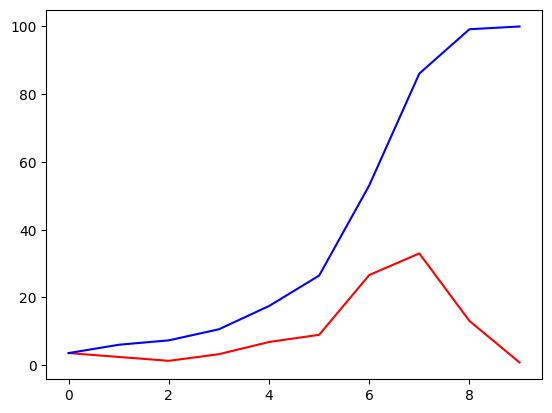

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.arange(10)

plt.plot(xpoints, y0, 'r-')
plt.plot(xpoints, y1, 'b-')
plt.show()

In [ ]:
print(acc, count)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_and_segmap(image, segmap, ours):
    """
    Plots a color image and its segmentation map side by side.

    Args:
    - image (numpy.ndarray): The color image.
    - segmap (numpy.ndarray): The segmentation map.
    """
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Plotting the image
    axes[0].imshow(image)
    axes[0].set_title('Color Image')
    axes[0].axis('off')

    # Plotting the segmentation map
    axes[1].imshow(segmap, cmap='viridis')  # 'viridis' is a commonly used colormap for segmaps.
    axes[1].set_title('Segmentation Map')
    axes[1].axis('off')

    axes[2].imshow(ours, cmap='viridis')
    axes[2].set_title('mask 0')
    axes[2].axis('off')

    plt.show()

# Example usage
# Assuming `your_image` and `your_segmap` are your numpy arrays for the image and segmentation map
# plot_image_and_segmap(your_image, your_segmap)


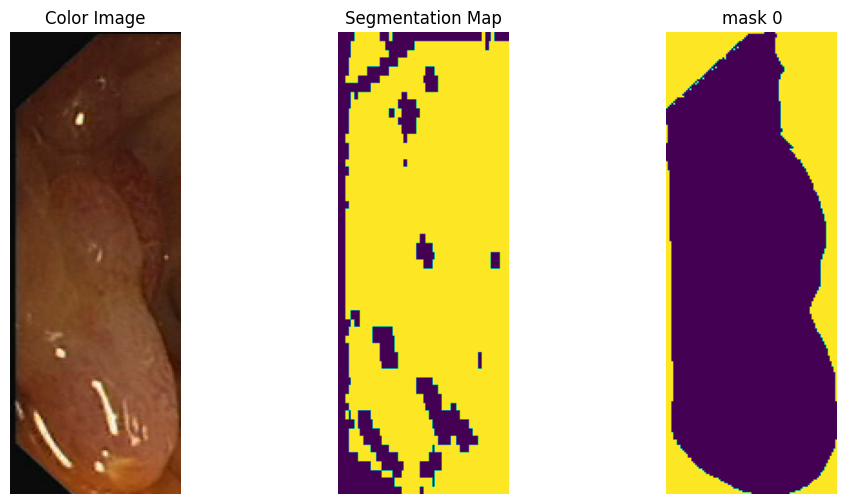

In [ ]:
plot_image_and_segmap(acc, count, t)

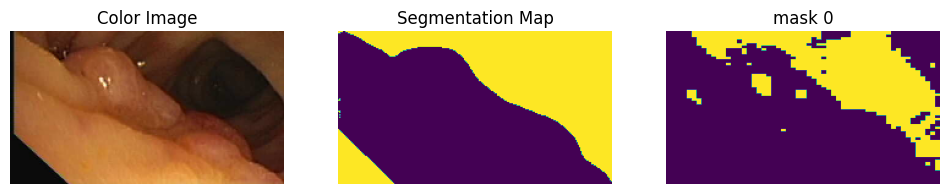

In [ ]:
plot_image_and_segmap(acc, count, ac2)

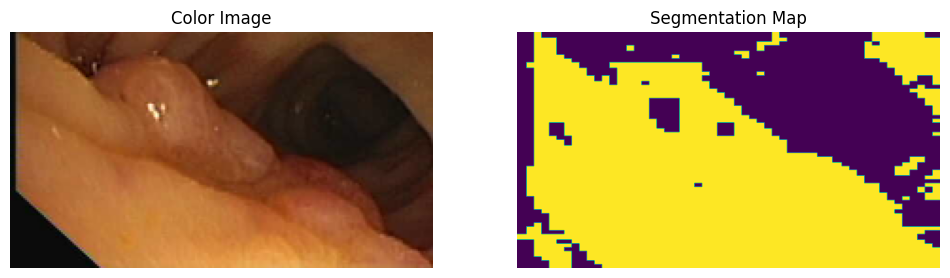

In [ ]:
plot_image_and_segmap(x,y)

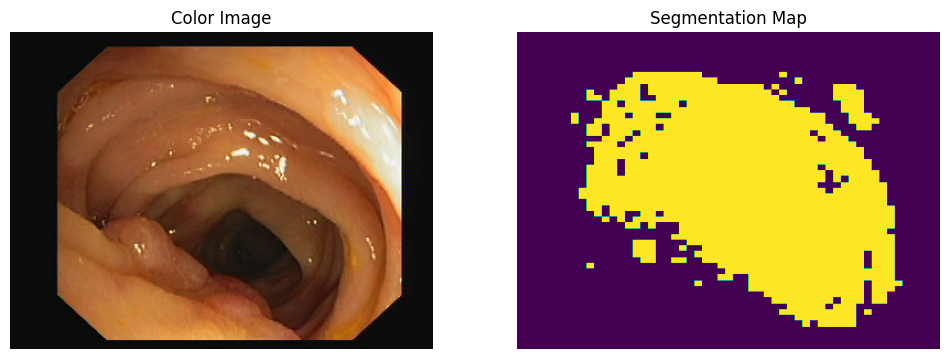

In [ ]:
plot_image_and_segmap(x,y)

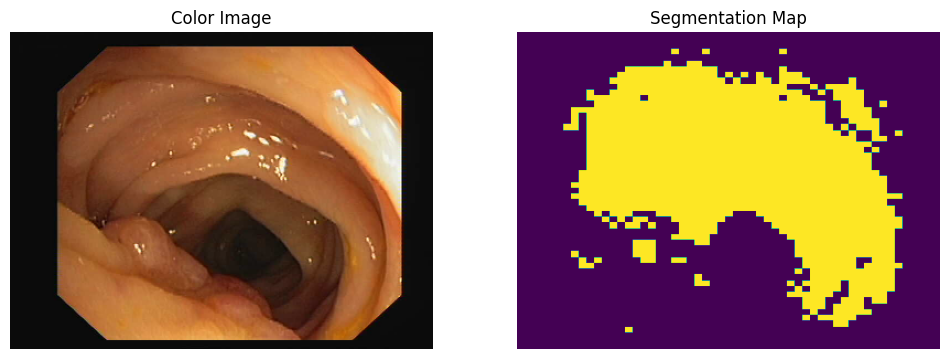

In [ ]:
plot_image_and_segmap(x,y)

# visualization

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt

In [ ]:

!pwd

/content/drive/MyDrive/Gopal


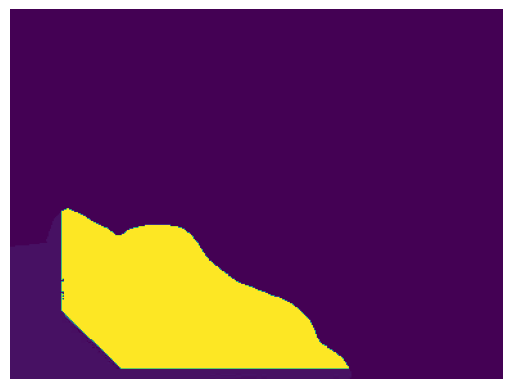

In [ ]:
image = tiff.imread('/content/drive/MyDrive/Gopal/CVC-ClinicDB/Ground Truth/1.tif')  # Load your TIFF image
plt.imshow(image)  # Display the image
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image.shape

(288, 384, 3)

In [ ]:
image = tiff.imread('/CVC-ClinicDB/Ground Truth/1.tif')  # Load your TIFF image
plt.imshow(image)  # Display the image
plt.axis('off')  # Turn off axis numbers
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/CVC-ClinicDB/Ground Truth/1.tif'

In [ ]:
np.unique(image)

array([  0,   8,   9,  10,  11,  12,  13,  14,  15, 255], dtype=uint8)